##Download


In [1]:
!mkdir -p ~/.kaggle

# Move kaggle.json to the correct folder
!mv kaggle.json ~/.kaggle/
!kaggle competitions download -c io-t-sleep-stage-classification-version-2
!mkdir -p /content/kaggle_competition

100% 2.08G/2.08G [01:34<00:00, 24.0MB/s]
100% 2.08G/2.08G [01:34<00:00, 23.6MB/s]


In [2]:
# Unzip the dataset into the directory
!unzip -q io-t-sleep-stage-classification-version-2.zip -d /content/kaggle_competition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Data XGBoost

###Test

In [ ]:
df = pd.read_csv('/content/kaggle_competition/train/train/train001.csv')

In [ ]:
df

BVP      ACC_X      ACC_Y      ACC_Z       TEMP       EDA  \
0        25.325870 -21.809247 -60.302750   4.940839  31.722653  0.064595   
1        20.021505 -19.437787 -60.565345   7.408788  31.722647  0.064523   
2        16.314478 -21.624667 -61.142561   4.105717  31.722735  0.064659   
3         9.324392 -21.761314 -61.985822   3.972967  31.722564  0.064440   
4        -1.014338 -19.055301 -59.934137   9.097628  31.722790  0.065397   
...            ...        ...        ...        ...        ...       ...   
356635   59.628219 -32.636398 -23.730186  49.433474  34.965154  0.140579   
356636  163.656085 -32.615814 -23.717156  49.391365  34.965010  0.140539   
356637  203.457671 -32.621808 -23.733782  49.468040  34.965266  0.140530   
356638  182.633893 -32.628004 -23.718944  49.363862  34.964999  0.140567   
356639  122.654620 -32.613969 -23.728070  49.549464  34.965198  0.140515   

               HR       IBI Sleep_Stage  
0       72.015570  1.050338           W  
1       72.015802  1.050338           W  
2       72.017417  1.050338           W  
3       72.013801  1.050338           W  
4       72.018920  1.050338           W  
...           ...       ...         ...  
356635  77.236003  1.034892           W  
356636  77.235527  1.034892           W  
356637  77.235586  1.034892           W  
356638  77.235842  1.034892           W  
356639  77.235431  1.034892           W  

[356640 rows x 9 columns]

In [ ]:
unique_values = df["Sleep_Stage"].unique()
print(unique_values)

['W' 'N' 'R']


In [ ]:
df_sampled = df.iloc[::4, :]
df_sampled = df_sampled.reset_index(drop=True)

In [ ]:
df_sampled

BVP      ACC_X      ACC_Y      ACC_Z       TEMP       EDA  \
0       25.325870 -21.809247 -60.302750   4.940839  31.722653  0.064595   
1       -1.014338 -19.055301 -59.934137   9.097628  31.722790  0.065397   
2        4.395135 -22.395005 -60.304511   5.642399  31.722536  0.064269   
3      -16.836211 -20.943419 -60.982644   4.915048  31.722269  0.064077   
4      -14.089593 -20.308649 -60.472383   5.877854  31.734695  0.064559   
...           ...        ...        ...        ...        ...       ...   
89155  -35.731485 -32.621228 -23.653831  49.635972  34.934939  0.141339   
89156  -66.166477 -32.597094 -23.677329  49.479043  34.953521  0.141069   
89157 -185.657072 -32.981711 -23.768552  49.347468  34.965184  0.139753   
89158  167.789168 -32.598614 -23.739699  49.462834  34.965430  0.140019   
89159  163.656085 -32.615814 -23.717156  49.391365  34.965010  0.140539   

              HR       IBI Sleep_Stage  
0      72.015570  1.050338           W  
1      72.018920  1.050338           W  
2      72.013656  1.050338           W  
3      72.005410  1.050338           W  
4      72.303844  1.050338           W  
...          ...       ...         ...  
89155  77.231707  1.034892           W  
89156  77.234733  1.034892           W  
89157  77.237150  1.034892           W  
89158  77.235155  1.034892           W  
89159  77.235527  1.034892           W  

[89160 rows x 9 columns]

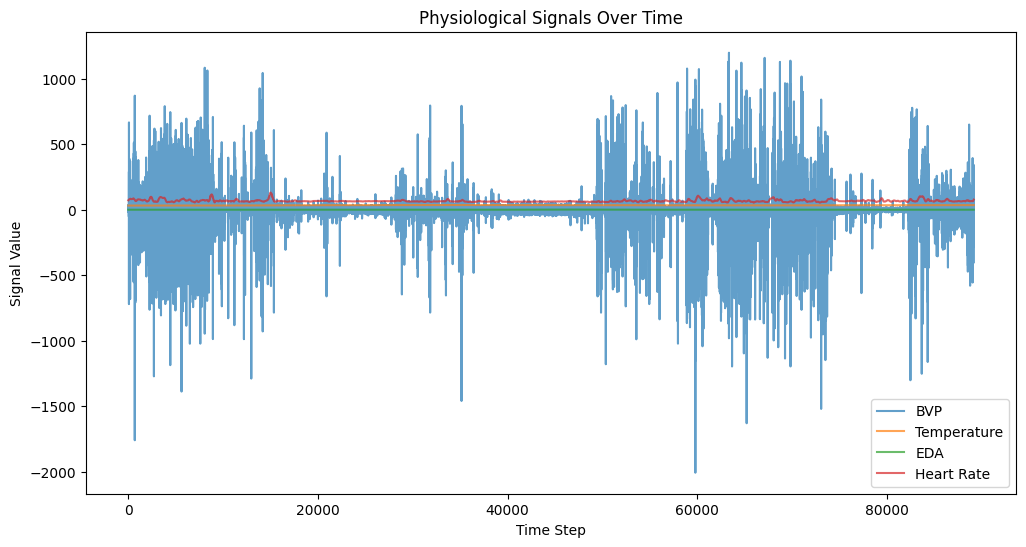

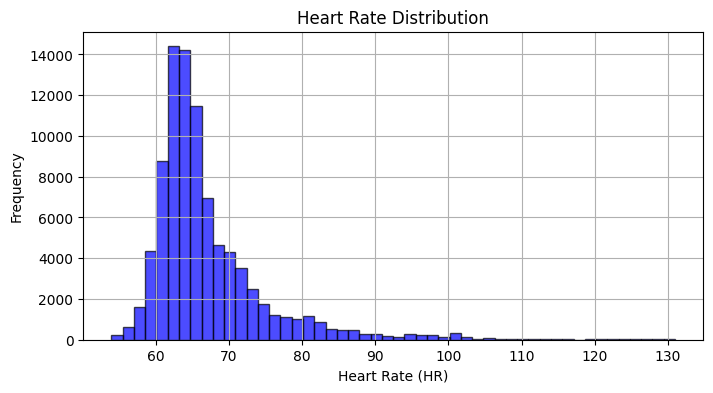

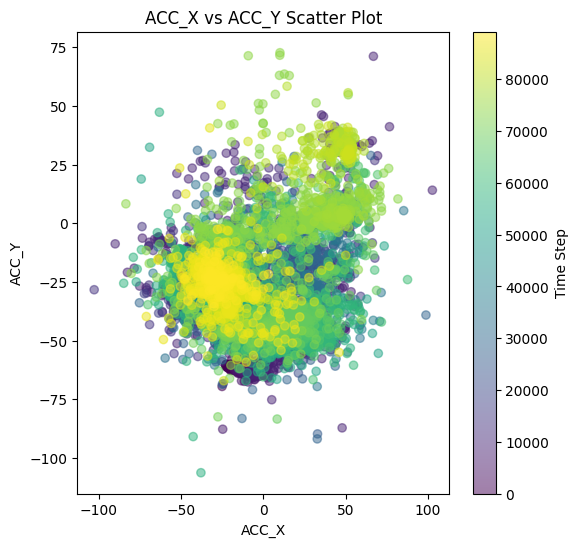

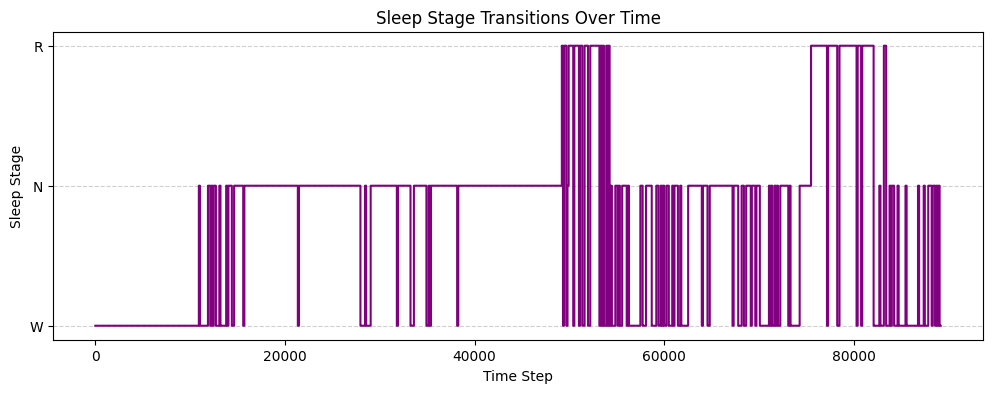

In [ ]:
# ---- 1. Time Series Plot of Physiological Signals ----
plt.figure(figsize=(12, 6))
plt.plot(df_sampled.index, df_sampled["BVP"], label="BVP", alpha=0.7)
plt.plot(df_sampled.index, df_sampled["TEMP"], label="Temperature", alpha=0.7)
plt.plot(df_sampled.index, df_sampled["EDA"], label="EDA", alpha=0.7)
plt.plot(df_sampled.index, df_sampled["HR"], label="Heart Rate", alpha=0.7)
plt.xlabel("Time Step")
plt.ylabel("Signal Value")
plt.title("Physiological Signals Over Time")
plt.legend()
plt.show()

# ---- 2. Histogram: Heart Rate (HR) Distribution ----
plt.figure(figsize=(8, 4))
df_sampled["HR"].hist(bins=50, alpha=0.7, color='b', edgecolor='black')
plt.xlabel("Heart Rate (HR)")
plt.ylabel("Frequency")
plt.title("Heart Rate Distribution")
plt.show()

# ---- 3. Scatter Plot: ACC_X vs ACC_Y ----
plt.figure(figsize=(6, 6))
plt.scatter(df_sampled["ACC_X"], df_sampled["ACC_Y"], alpha=0.5, c=df_sampled.index, cmap='viridis')
plt.xlabel("ACC_X")
plt.ylabel("ACC_Y")
plt.title("ACC_X vs ACC_Y Scatter Plot")
plt.colorbar(label="Time Step")
plt.show()

# ---- 4. Sleep Stage Transitions Over Time ----
# Convert Sleep Stages to numeric values
sleep_stage_mapping = {"W": 0, "N": 1, "R": 2}
df_sampled["Sleep_Stage_Num"] = df_sampled["Sleep_Stage"].map(sleep_stage_mapping)

plt.figure(figsize=(12, 4))
plt.step(df_sampled.index, df_sampled["Sleep_Stage_Num"], where="mid", color="purple")
plt.yticks(ticks=list(sleep_stage_mapping.values()), labels=list(sleep_stage_mapping.keys()))
plt.xlabel("Time Step")
plt.ylabel("Sleep Stage")
plt.title("Sleep Stage Transitions Over Time")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


In [ ]:
'''from sklearn.preprocessing import StandardScaler

features_to_scale = ["BVP", "ACC_X", "ACC_Y", "ACC_Z", "TEMP", "EDA", "HR", "IBI"]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df_sampled[features_to_scale] = scaler.fit_transform(df_sampled[features_to_scale])'''

'from sklearn.preprocessing import StandardScaler\n\nfeatures_to_scale = ["BVP", "ACC_X", "ACC_Y", "ACC_Z", "TEMP", "EDA", "HR", "IBI"]\n\n# Initialize StandardScaler\nscaler = StandardScaler()\n\n# Fit and transform the data\ndf_sampled[features_to_scale] = scaler.fit_transform(df_sampled[features_to_scale])'

###Grouping

In [ ]:
sleep_stage_map = {0: "W", 1: "N", 2: "R"}

# Create a dictionary to store extracted signals for each sleep stage
extracted_signals = {}

for stage in sleep_stage_map.keys():
    # Extract all rows belonging to this sleep stage
    stage_data = df_sampled[df_sampled["Sleep_Stage_Num"] == stage]

    # Store the extracted data in a dictionary
    extracted_signals[sleep_stage_map[stage]] = stage_data

    # Save the extracted signals as separate CSV files (optional)
    stage_data.to_csv(f"extracted_signals_{sleep_stage_map[stage]}.csv", index=False)

# Display the first few rows of each extracted sleep stage DataFrame
for stage, data in extracted_signals.items():
    print(f"Sleep Stage: {stage} ({len(data)} samples)")
    print(data.head(), "\n")

Sleep Stage: W (31800 samples)
         BVP      ACC_X      ACC_Y     ACC_Z       TEMP       EDA         HR  \
0  25.325870 -21.809247 -60.302750  4.940839  31.722653  0.064595  72.015570   
1  -1.014338 -19.055301 -59.934137  9.097628  31.722790  0.065397  72.018920   
2   4.395135 -22.395005 -60.304511  5.642399  31.722536  0.064269  72.013656   
3 -16.836211 -20.943419 -60.982644  4.915048  31.722269  0.064077  72.005410   
4 -14.089593 -20.308649 -60.472383  5.877854  31.734695  0.064559  72.303844   

        IBI Sleep_Stage  Sleep_Stage_Num  
0  1.050338           W                0  
1  1.050338           W                0  
2  1.050338           W                0  
3  1.050338           W                0  
4  1.050338           W                0   

Sleep Stage: N (47760 samples)
            BVP      ACC_X      ACC_Y      ACC_Z       TEMP       EDA  \
10920 -5.977103 -20.650414 -24.823677  55.483769  32.034763  0.076728   
10921 -7.728523 -21.713068 -24.744791  55.017245  3

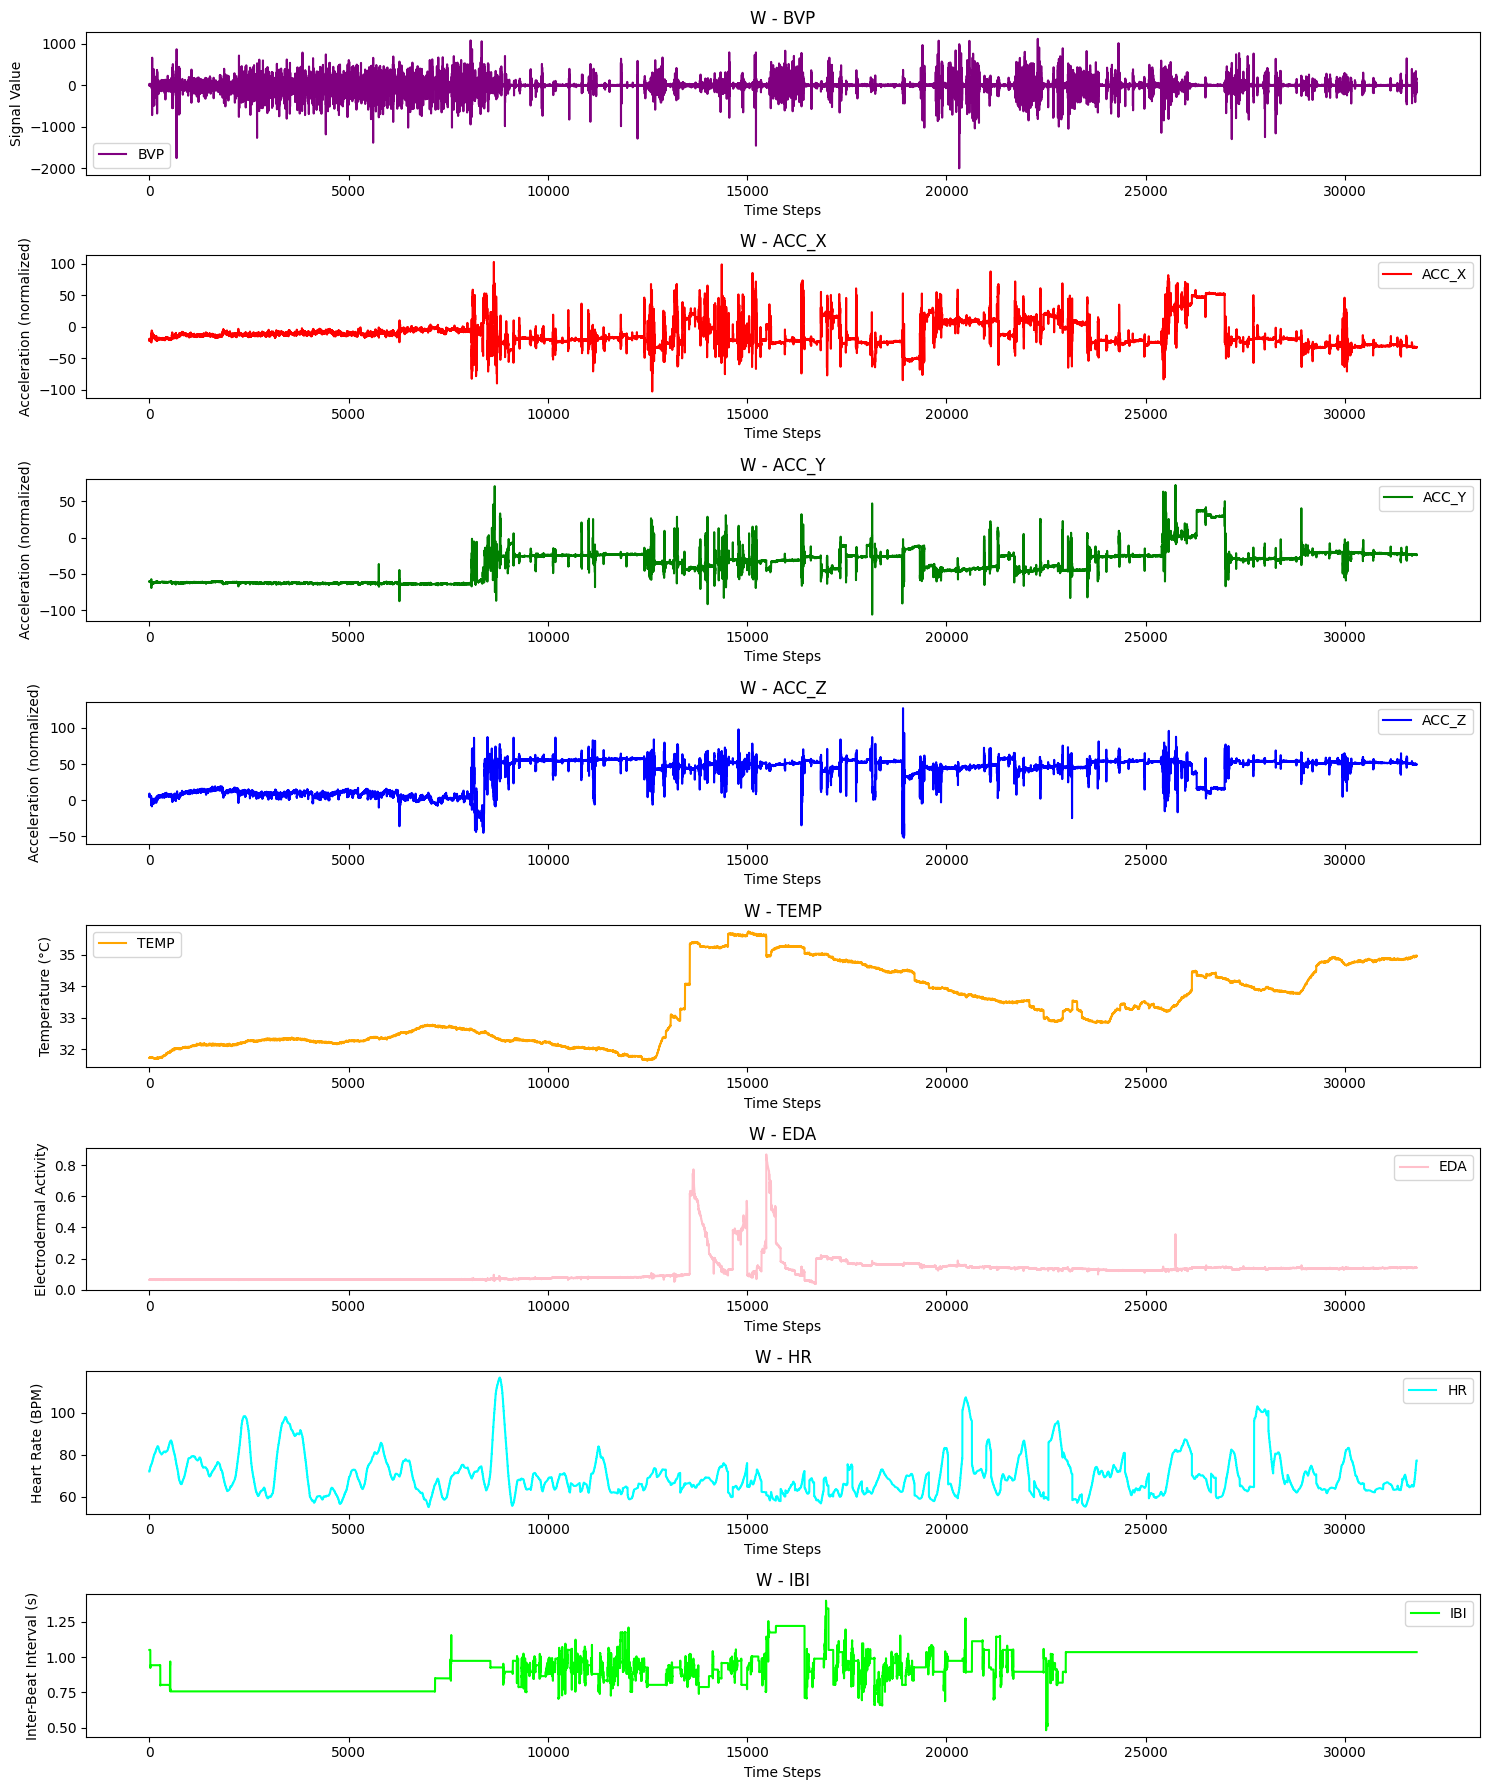

In [ ]:
plt.figure(figsize=(15, 18))  # Adjust figure size for better readability

# Loop through the extracted signals and plot the signals for the "W" stage only
for idx, (stage, data) in enumerate(extracted_signals.items()):
    if stage == "W":  # Only plot for the "W" stage
        # Reset index for the current sleep stage data
        data_reset = data.reset_index(drop=True)  # Reset the index for cleaner plotting

        # Get the relevant signals for the current sleep stage
        bvp = data_reset["BVP"]
        acc_x = data_reset["ACC_X"]
        acc_y = data_reset["ACC_Y"]
        acc_z = data_reset["ACC_Z"]
        temp = data_reset["TEMP"]
        eda = data_reset["EDA"]
        hr = data_reset["HR"]
        ibi = data_reset["IBI"]

        # Subplot for BVP, ACC_X, ACC_Y, ACC_Z, TEMP, EDA, HR, IBI
        plt.subplot(8, 1, 1)
        plt.plot(bvp, label='BVP', color='purple')
        plt.title(f"{stage} - BVP")
        plt.xlabel("Time Steps")
        plt.ylabel("Signal Value")
        plt.legend()

        plt.subplot(8, 1, 2)
        plt.plot(acc_x, label='ACC_X', color='r')
        plt.title(f"{stage} - ACC_X")
        plt.xlabel("Time Steps")
        plt.ylabel("Acceleration (normalized)")
        plt.legend()

        plt.subplot(8, 1, 3)
        plt.plot(acc_y, label='ACC_Y', color='g')
        plt.title(f"{stage} - ACC_Y")
        plt.xlabel("Time Steps")
        plt.ylabel("Acceleration (normalized)")
        plt.legend()

        plt.subplot(8, 1, 4)
        plt.plot(acc_z, label='ACC_Z', color='b')
        plt.title(f"{stage} - ACC_Z")
        plt.xlabel("Time Steps")
        plt.ylabel("Acceleration (normalized)")
        plt.legend()

        plt.subplot(8, 1, 5)
        plt.plot(temp, label='TEMP', color='orange')
        plt.title(f"{stage} - TEMP")
        plt.xlabel("Time Steps")
        plt.ylabel("Temperature (°C)")
        plt.legend()

        plt.subplot(8, 1, 6)
        plt.plot(eda, label='EDA', color='pink')
        plt.title(f"{stage} - EDA")
        plt.xlabel("Time Steps")
        plt.ylabel("Electrodermal Activity")
        plt.legend()

        plt.subplot(8, 1, 7)
        plt.plot(hr, label='HR', color='cyan')
        plt.title(f"{stage} - HR")
        plt.xlabel("Time Steps")
        plt.ylabel("Heart Rate (BPM)")
        plt.legend()

        plt.subplot(8, 1, 8)
        plt.plot(ibi, label='IBI', color='lime')
        plt.title(f"{stage} - IBI")
        plt.xlabel("Time Steps")
        plt.ylabel("Inter-Beat Interval (s)")
        plt.legend()

plt.tight_layout()
plt.show()


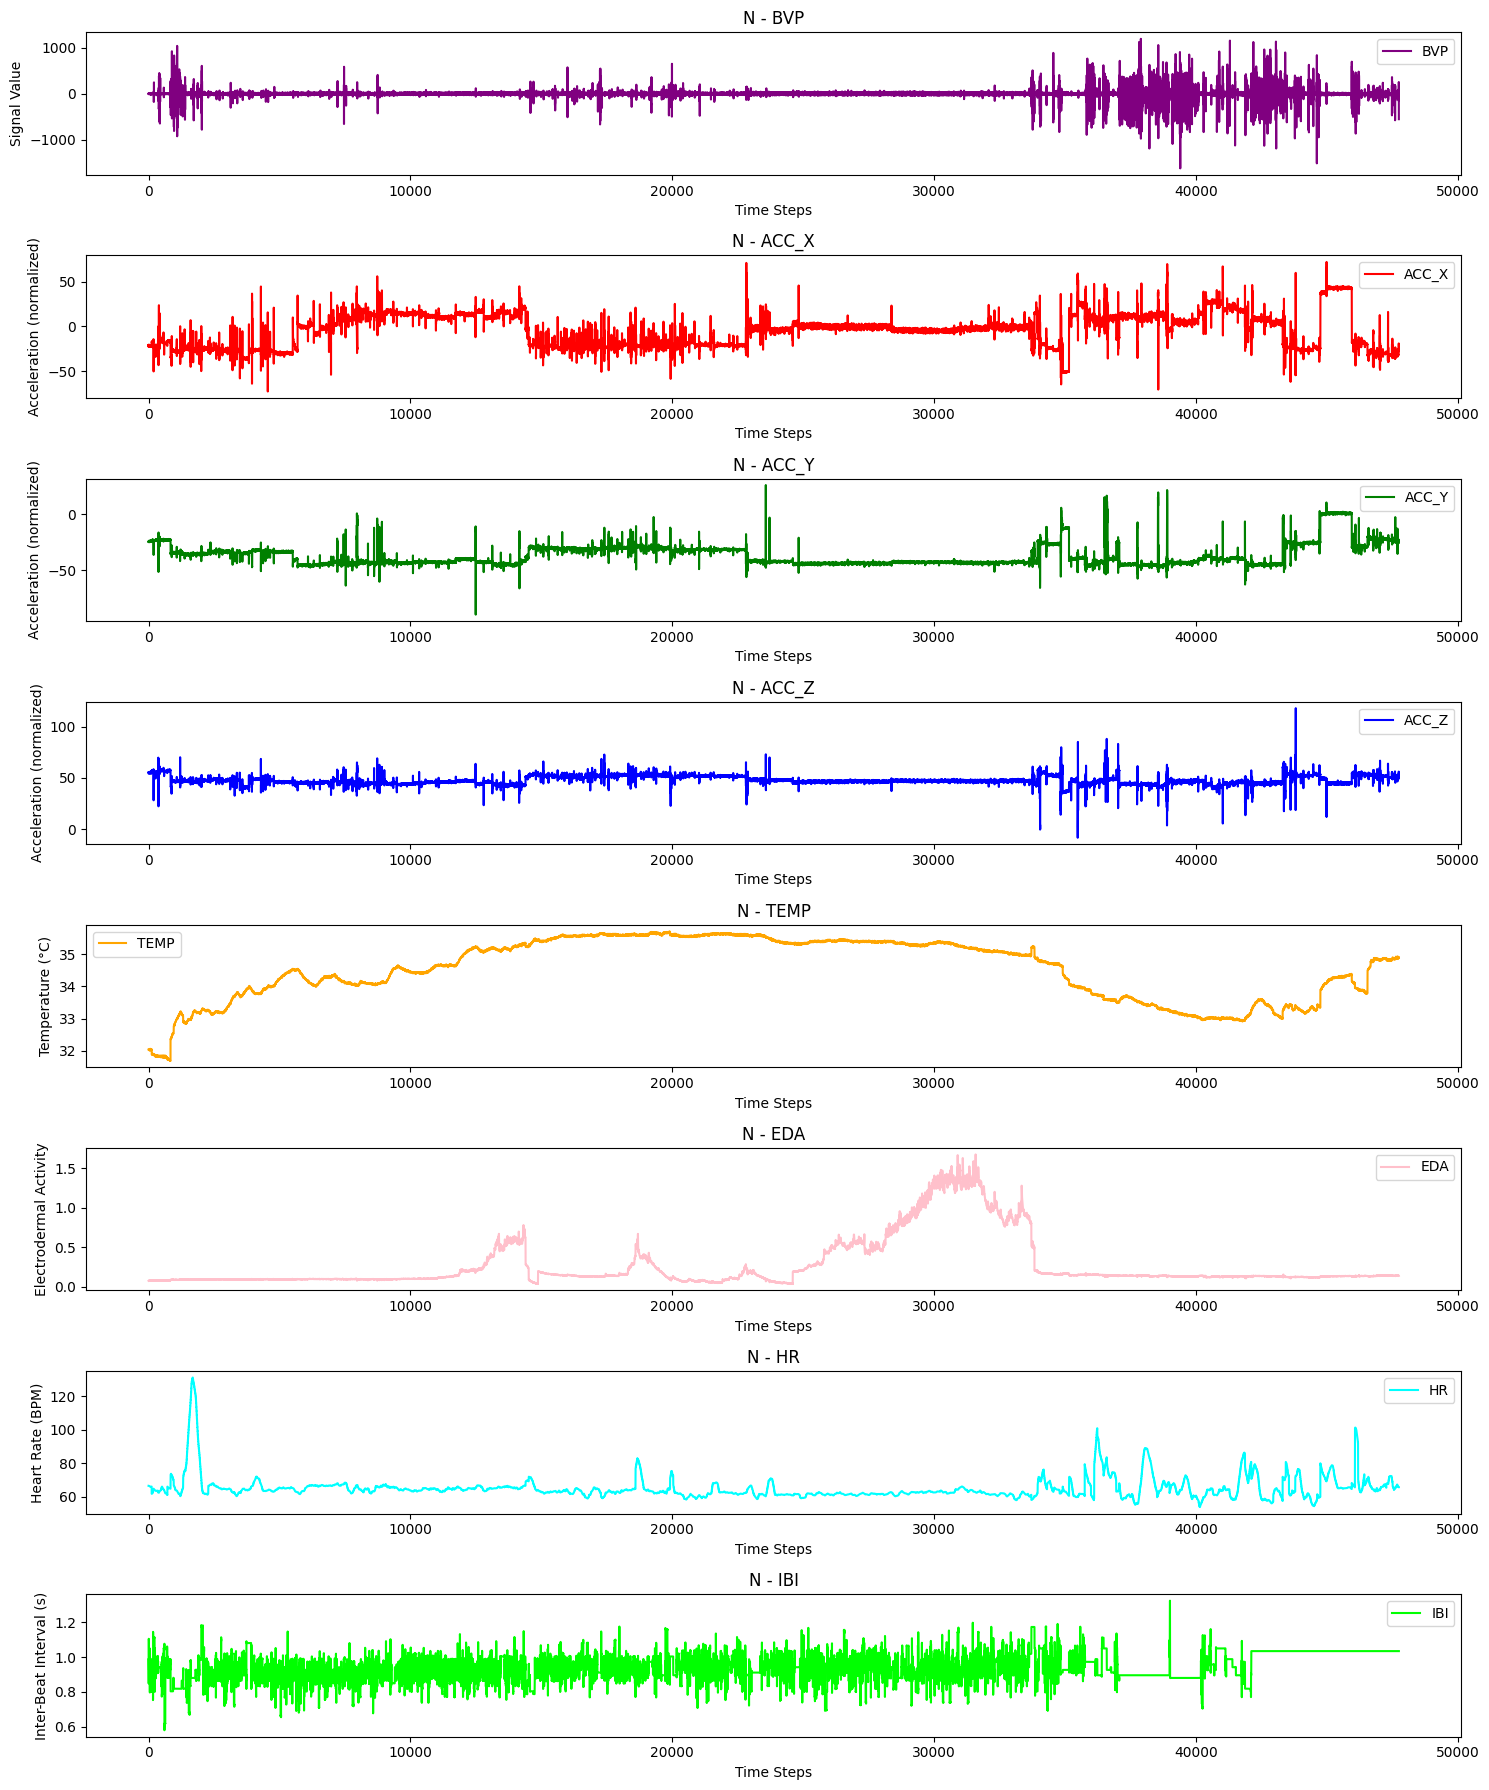

In [ ]:
plt.figure(figsize=(15, 18))  # Adjust figure size for better readability

# Loop through the extracted signals and plot the signals for the "W" stage only
for idx, (stage, data) in enumerate(extracted_signals.items()):
    if stage == "N":  # Only plot for the "W" stage
        # Reset index for the current sleep stage data
        data_reset = data.reset_index(drop=True)  # Reset the index for cleaner plotting

        # Get the relevant signals for the current sleep stage
        bvp = data_reset["BVP"]
        acc_x = data_reset["ACC_X"]
        acc_y = data_reset["ACC_Y"]
        acc_z = data_reset["ACC_Z"]
        temp = data_reset["TEMP"]
        eda = data_reset["EDA"]
        hr = data_reset["HR"]
        ibi = data_reset["IBI"]

        # Subplot for BVP, ACC_X, ACC_Y, ACC_Z, TEMP, EDA, HR, IBI
        plt.subplot(8, 1, 1)
        plt.plot(bvp, label='BVP', color='purple')
        plt.title(f"{stage} - BVP")
        plt.xlabel("Time Steps")
        plt.ylabel("Signal Value")
        plt.legend()

        plt.subplot(8, 1, 2)
        plt.plot(acc_x, label='ACC_X', color='r')
        plt.title(f"{stage} - ACC_X")
        plt.xlabel("Time Steps")
        plt.ylabel("Acceleration (normalized)")
        plt.legend()

        plt.subplot(8, 1, 3)
        plt.plot(acc_y, label='ACC_Y', color='g')
        plt.title(f"{stage} - ACC_Y")
        plt.xlabel("Time Steps")
        plt.ylabel("Acceleration (normalized)")
        plt.legend()

        plt.subplot(8, 1, 4)
        plt.plot(acc_z, label='ACC_Z', color='b')
        plt.title(f"{stage} - ACC_Z")
        plt.xlabel("Time Steps")
        plt.ylabel("Acceleration (normalized)")
        plt.legend()

        plt.subplot(8, 1, 5)
        plt.plot(temp, label='TEMP', color='orange')
        plt.title(f"{stage} - TEMP")
        plt.xlabel("Time Steps")
        plt.ylabel("Temperature (°C)")
        plt.legend()

        plt.subplot(8, 1, 6)
        plt.plot(eda, label='EDA', color='pink')
        plt.title(f"{stage} - EDA")
        plt.xlabel("Time Steps")
        plt.ylabel("Electrodermal Activity")
        plt.legend()

        plt.subplot(8, 1, 7)
        plt.plot(hr, label='HR', color='cyan')
        plt.title(f"{stage} - HR")
        plt.xlabel("Time Steps")
        plt.ylabel("Heart Rate (BPM)")
        plt.legend()

        plt.subplot(8, 1, 8)
        plt.plot(ibi, label='IBI', color='lime')
        plt.title(f"{stage} - IBI")
        plt.xlabel("Time Steps")
        plt.ylabel("Inter-Beat Interval (s)")
        plt.legend()

plt.tight_layout()
plt.show()


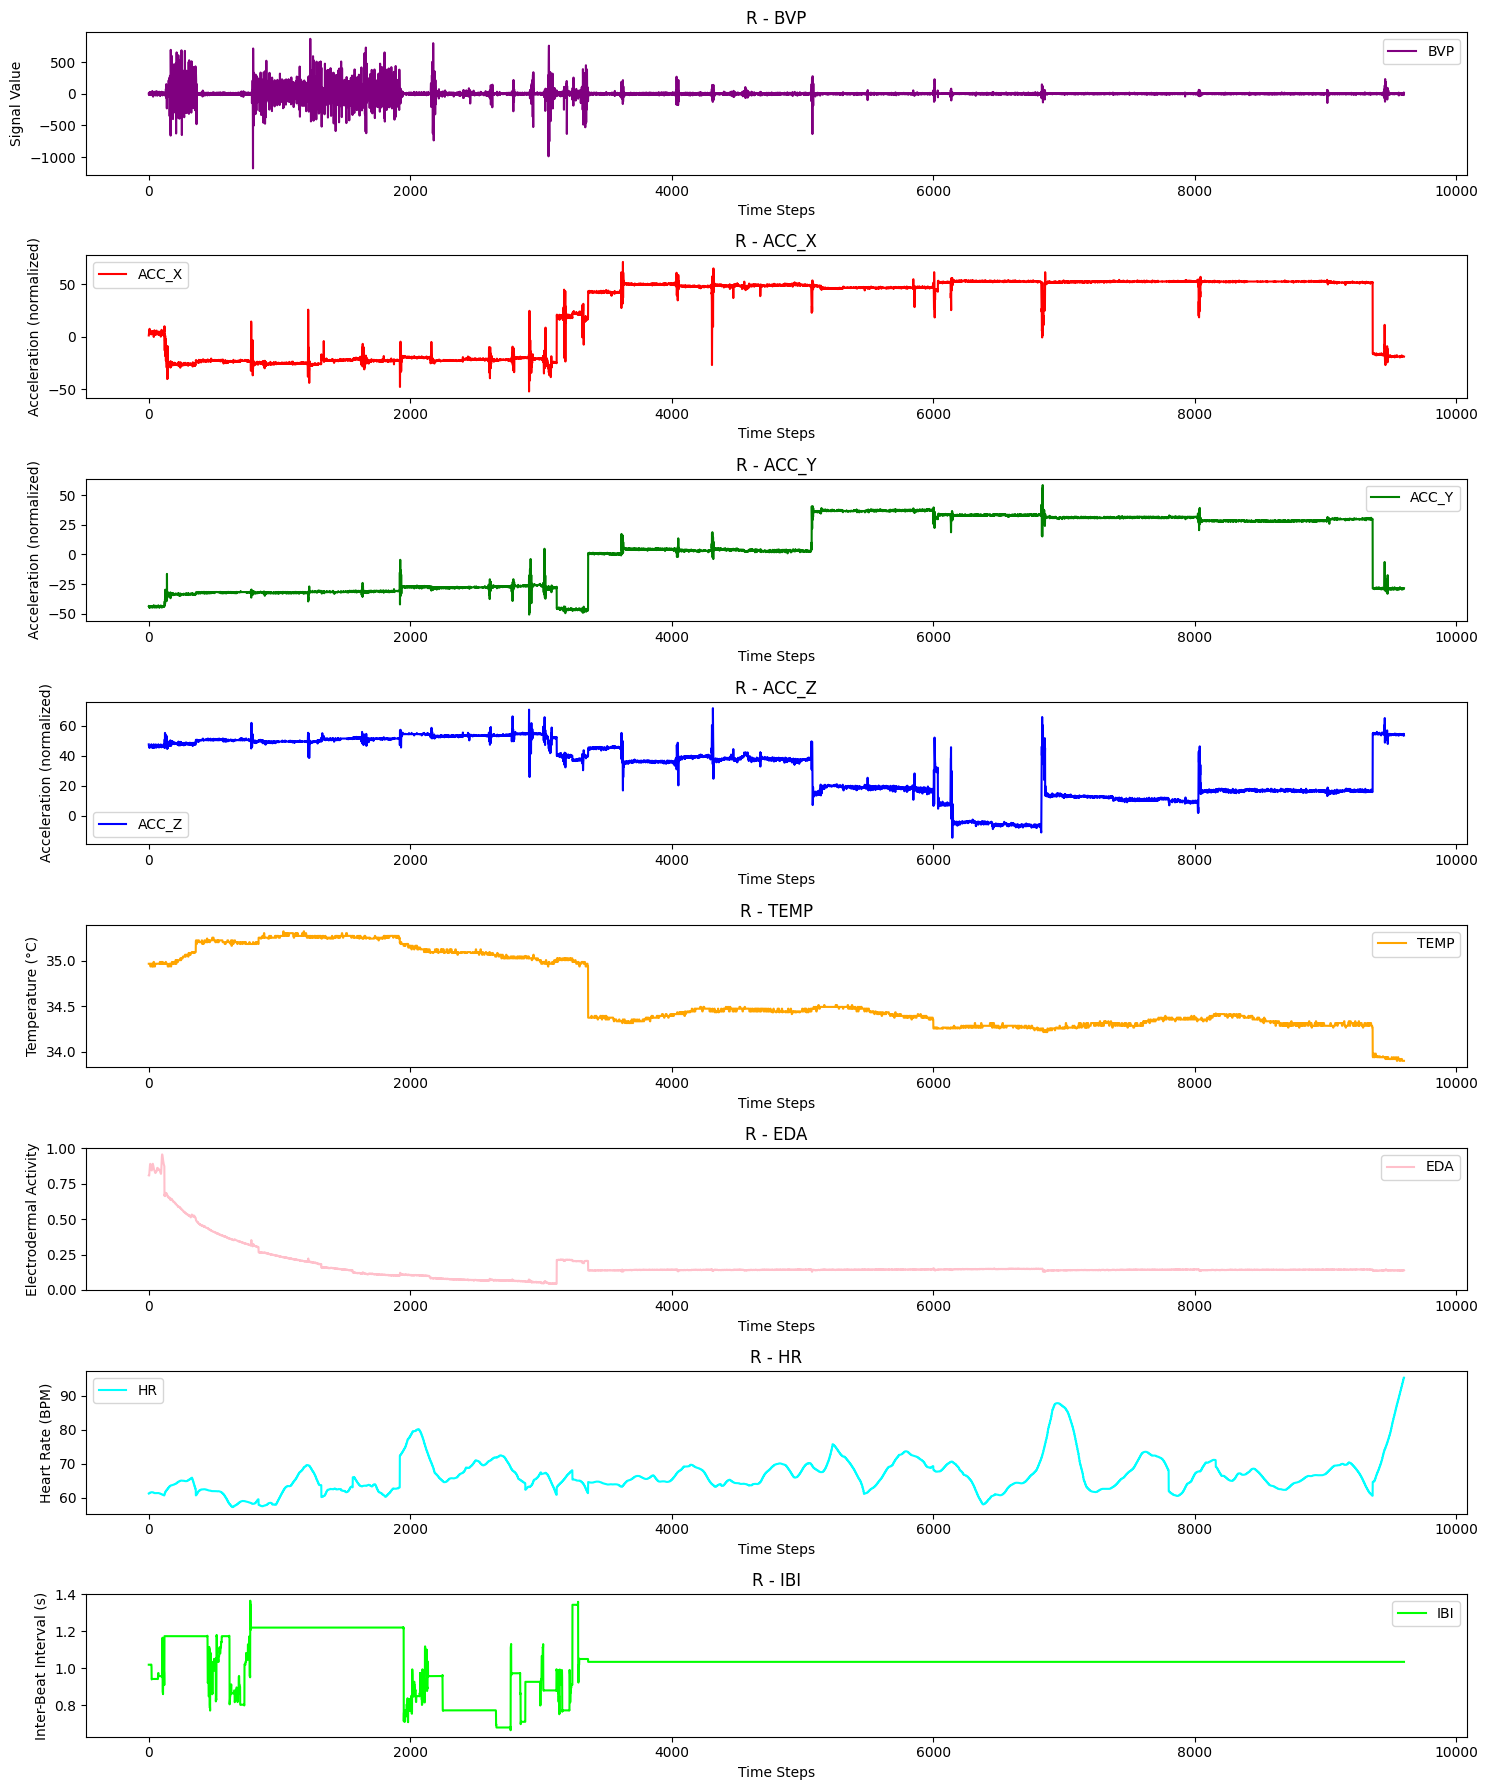

In [ ]:
plt.figure(figsize=(15, 18))  # Adjust figure size for better readability

# Loop through the extracted signals and plot the signals for the "W" stage only
for idx, (stage, data) in enumerate(extracted_signals.items()):
    if stage == "R":  # Only plot for the "W" stage
        # Reset index for the current sleep stage data
        data_reset = data.reset_index(drop=True)  # Reset the index for cleaner plotting

        # Get the relevant signals for the current sleep stage
        bvp = data_reset["BVP"]
        acc_x = data_reset["ACC_X"]
        acc_y = data_reset["ACC_Y"]
        acc_z = data_reset["ACC_Z"]
        temp = data_reset["TEMP"]
        eda = data_reset["EDA"]
        hr = data_reset["HR"]
        ibi = data_reset["IBI"]

        # Subplot for BVP, ACC_X, ACC_Y, ACC_Z, TEMP, EDA, HR, IBI
        plt.subplot(8, 1, 1)
        plt.plot(bvp, label='BVP', color='purple')
        plt.title(f"{stage} - BVP")
        plt.xlabel("Time Steps")
        plt.ylabel("Signal Value")
        plt.legend()

        plt.subplot(8, 1, 2)
        plt.plot(acc_x, label='ACC_X', color='r')
        plt.title(f"{stage} - ACC_X")
        plt.xlabel("Time Steps")
        plt.ylabel("Acceleration (normalized)")
        plt.legend()

        plt.subplot(8, 1, 3)
        plt.plot(acc_y, label='ACC_Y', color='g')
        plt.title(f"{stage} - ACC_Y")
        plt.xlabel("Time Steps")
        plt.ylabel("Acceleration (normalized)")
        plt.legend()

        plt.subplot(8, 1, 4)
        plt.plot(acc_z, label='ACC_Z', color='b')
        plt.title(f"{stage} - ACC_Z")
        plt.xlabel("Time Steps")
        plt.ylabel("Acceleration (normalized)")
        plt.legend()

        plt.subplot(8, 1, 5)
        plt.plot(temp, label='TEMP', color='orange')
        plt.title(f"{stage} - TEMP")
        plt.xlabel("Time Steps")
        plt.ylabel("Temperature (°C)")
        plt.legend()

        plt.subplot(8, 1, 6)
        plt.plot(eda, label='EDA', color='pink')
        plt.title(f"{stage} - EDA")
        plt.xlabel("Time Steps")
        plt.ylabel("Electrodermal Activity")
        plt.legend()

        plt.subplot(8, 1, 7)
        plt.plot(hr, label='HR', color='cyan')
        plt.title(f"{stage} - HR")
        plt.xlabel("Time Steps")
        plt.ylabel("Heart Rate (BPM)")
        plt.legend()

        plt.subplot(8, 1, 8)
        plt.plot(ibi, label='IBI', color='lime')
        plt.title(f"{stage} - IBI")
        plt.xlabel("Time Steps")
        plt.ylabel("Inter-Beat Interval (s)")
        plt.legend()

plt.tight_layout()
plt.show()


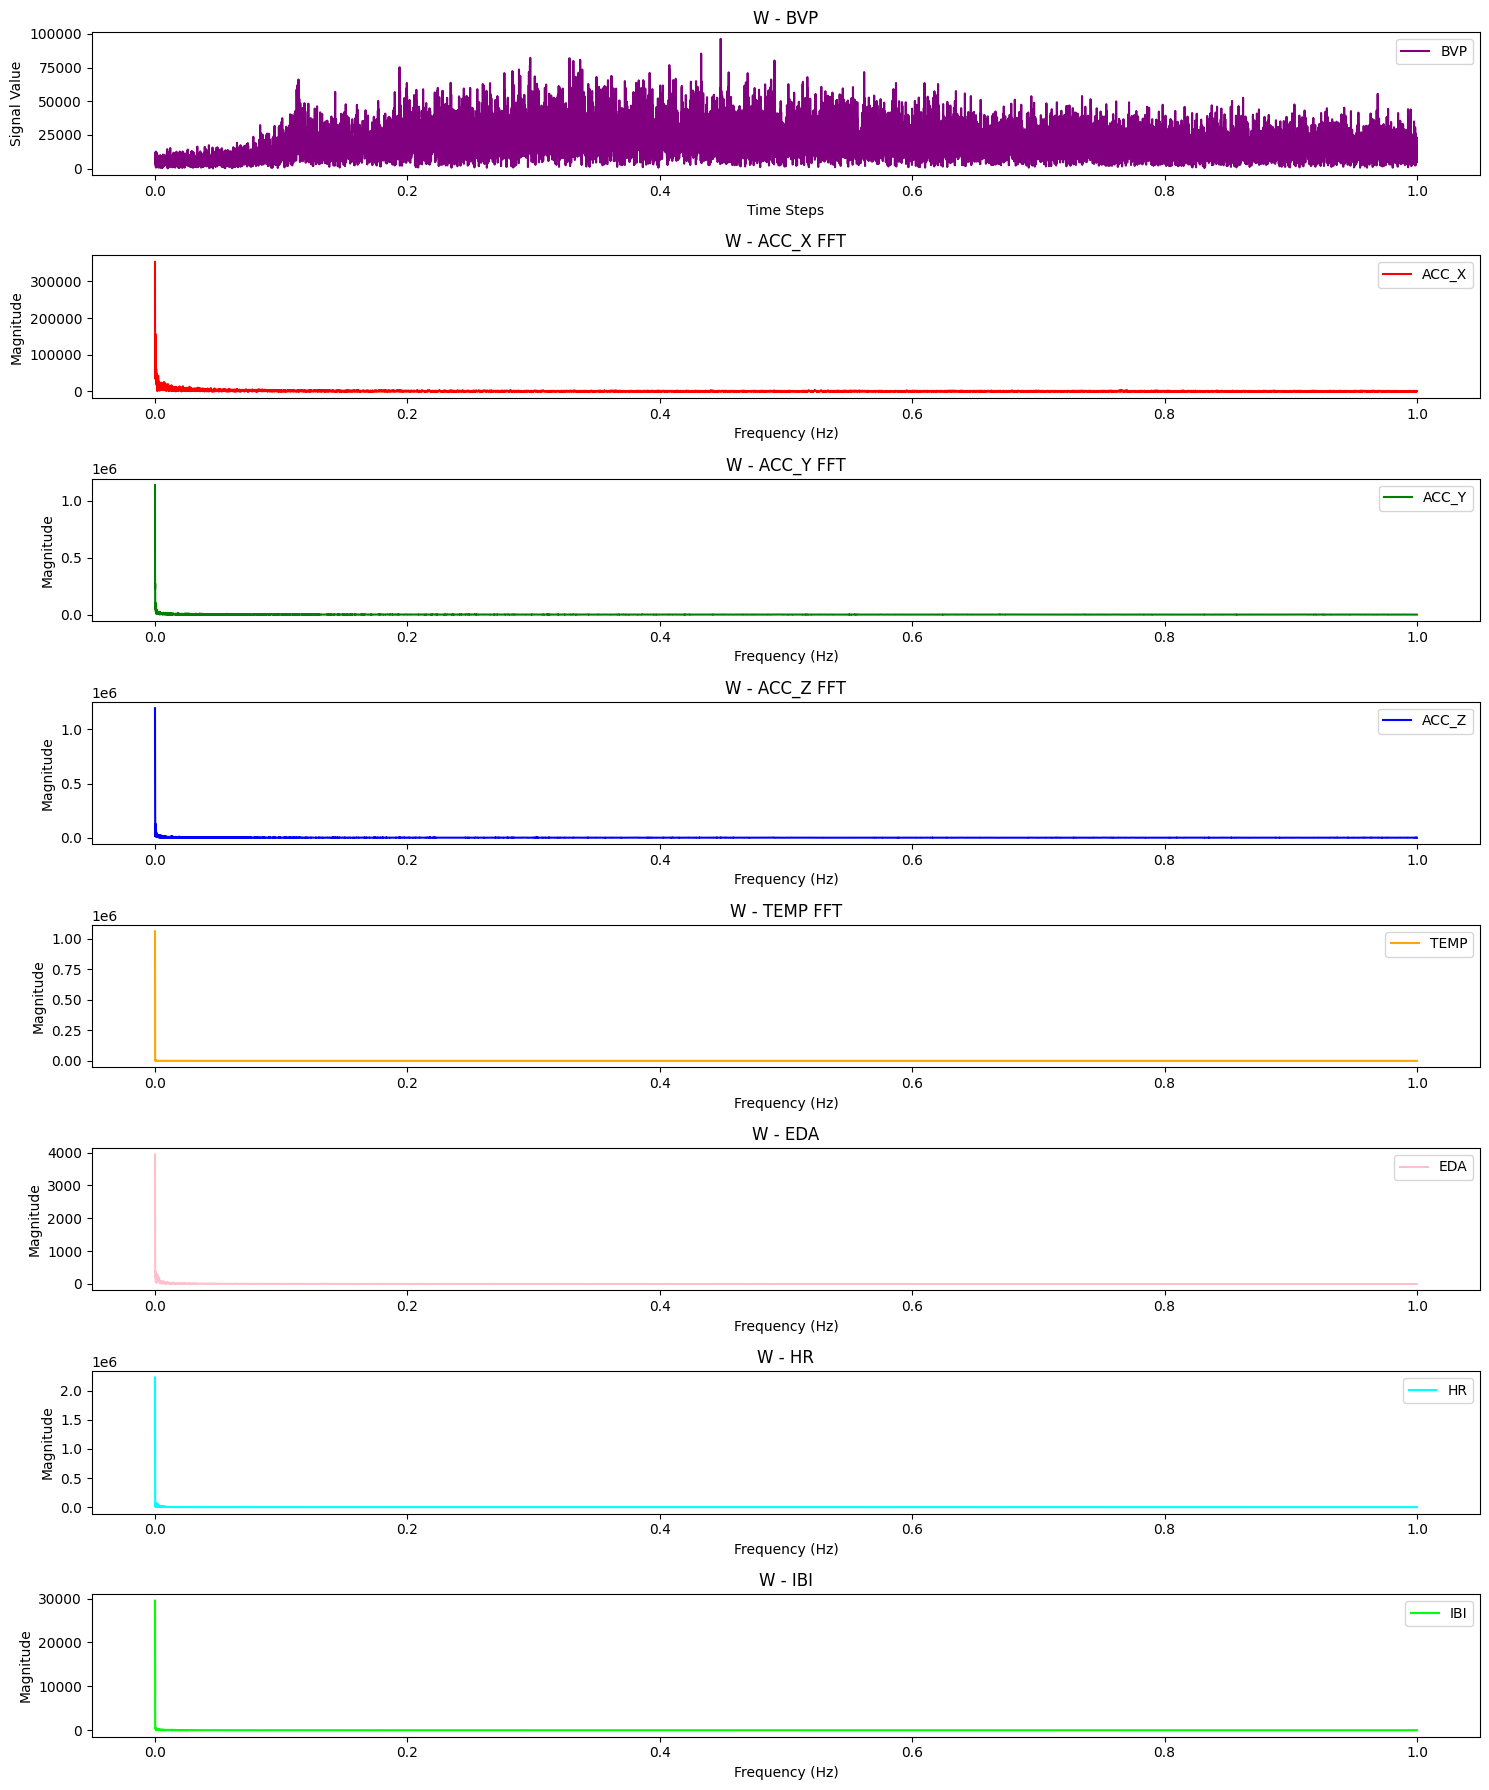

In [ ]:
sampling_rate = 2  # Hz (assumed based on your context)

# Function to apply FFT to a signal
def apply_fft(signal):
    n = len(signal)
    fft_signal = np.fft.fft(signal)
    fft_freq = np.fft.fftfreq(n, 1/sampling_rate)  # Frequency bins in Hz
    fft_mag = np.abs(fft_signal)  # Magnitude of FFT (absolute value)
    return fft_freq, fft_mag

# Assuming extracted_signals is a dictionary of stages
# We'll process and plot only for "W" stage
w_data = extracted_signals["W"]

# Get the relevant signals for the "W" stage
bvp = w_data["BVP"]
acc_x = w_data["ACC_X"]
acc_y = w_data["ACC_Y"]
acc_z = w_data["ACC_Z"]
temp = w_data["TEMP"]
eda = w_data["EDA"]
hr = w_data["HR"]
ibi = w_data["IBI"]

# Apply FFT to each signal
fft_bvp_freq, fft_bvp_mag = apply_fft(bvp)
fft_acc_x_freq, fft_acc_x_mag = apply_fft(acc_x)
fft_acc_y_freq, fft_acc_y_mag = apply_fft(acc_y)
fft_acc_z_freq, fft_acc_z_mag = apply_fft(acc_z)
fft_temp_freq, fft_temp_mag = apply_fft(temp)
fft_eda_freq, fft_eda_mag = apply_fft(eda)
fft_hr_freq, fft_hr_mag = apply_fft(hr)
fft_ibi_freq, fft_ibi_mag = apply_fft(ibi)

# Plot configuration
plt.figure(figsize=(15, 18))  # Adjust figure size for better readability

# Subplot for BVP, ACC_X, ACC_Y, ACC_Z, TEMP, EDA, HR, IBI
plt.subplot(8, 1, 1)
plt.plot(fft_bvp_freq[:len(fft_bvp_freq)//2], fft_bvp_mag[:len(fft_bvp_mag)//2], label='BVP', color='purple')
plt.title("W - BVP")
plt.xlabel("Time Steps")
plt.ylabel("Signal Value")
plt.legend()

plt.subplot(8, 1, 2)
plt.plot(fft_acc_x_freq[:len(fft_acc_x_freq)//2], fft_acc_x_mag[:len(fft_acc_x_mag)//2], label='ACC_X', color='r')
plt.title("W - ACC_X FFT")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()

plt.subplot(8, 1, 3)
plt.plot(fft_acc_y_freq[:len(fft_acc_y_freq)//2], fft_acc_y_mag[:len(fft_acc_y_mag)//2], label='ACC_Y', color='g')
plt.title("W - ACC_Y FFT")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()

plt.subplot(8, 1, 4)
plt.plot(fft_acc_z_freq[:len(fft_acc_z_freq)//2], fft_acc_z_mag[:len(fft_acc_z_mag)//2], label='ACC_Z', color='b')
plt.title("W - ACC_Z FFT")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()

plt.subplot(8, 1, 5)
plt.plot(fft_temp_freq[:len(fft_temp_freq)//2], fft_temp_mag[:len(fft_temp_mag)//2], label='TEMP', color='orange')
plt.title("W - TEMP FFT")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()

plt.subplot(8, 1, 6)
plt.plot(fft_eda_freq[:len(fft_eda_freq)//2], fft_eda_mag[:len(fft_eda_mag)//2], label='EDA', color='pink')
plt.title("W - EDA")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()

plt.subplot(8, 1, 7)
plt.plot(fft_hr_freq[:len(fft_hr_freq)//2], fft_hr_mag[:len(fft_hr_mag)//2], label='HR', color='cyan')
plt.title("W - HR")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()

plt.subplot(8, 1, 8)
plt.plot(fft_ibi_freq[:len(fft_ibi_freq)//2], fft_ibi_mag[:len(fft_ibi_mag)//2], label='IBI', color='lime')
plt.title("W - IBI")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()

plt.tight_layout()
plt.show()


###NEW DATA


In [14]:
import glob

In [15]:
folder_path = "/content/kaggle_competition/train/train/*.csv"

csv_files = glob.glob(folder_path)

df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

In [16]:
df_sampled = df.iloc[::4, :]
df_sampled = df_sampled.reset_index(drop=True)

In [17]:
df_sampled

BVP      ACC_X      ACC_Y      ACC_Z       TEMP       EDA  \
0         2.418650 -14.828296  30.645146  53.385008  33.264834  0.278546   
1         0.188797 -14.828296  30.645146  53.178063  33.264693  0.277723   
2        -6.186877 -14.828296  30.645146  53.302923  33.264913  0.278058   
3         2.519283 -14.828296  30.645146  53.324923  33.265262  0.279334   
4         0.138124 -14.828296  30.645146  53.379783  33.252813  0.278266   
...            ...        ...        ...        ...        ...       ...   
7976755   9.539100  -8.304844  37.565530  50.678855  35.163330  0.106669   
7976756 -21.981339  -7.866825  37.564763  50.455139  35.150848  0.106842   
7976757 -13.864248  -7.908983  37.565010  51.085215  35.142958  0.107204   
7976758  24.246395  -7.929640  37.565086  50.713636  35.142876  0.106865   
7976759  -0.556221  -7.814153  37.564986  51.253416  35.143145  0.106385   

                HR       IBI Sleep_Stage  
0        88.030792  0.787580           W  
1        88.029887  0.786861           W  
2        88.031323  0.815331           W  
3        88.033531  0.834778           W  
4        87.952710  0.836640           W  
...            ...       ...         ...  
7976755  56.541045  0.941908           W  
7976756  56.647194  0.942427           W  
7976757  56.714129  0.942199           W  
7976758  56.714882  0.942167           W  
7976759  56.712603  0.942242           W  

[7976760 rows x 9 columns]

In [18]:
df_sampled['group'] = df_sampled.index // 120

# Check if all values in each group are the same
grouped_check = df_sampled.groupby('group')['Sleep_Stage'].nunique()

# Find groups where Sleep_Stage is NOT consistent
inconsistent_groups = grouped_check[grouped_check > 1]

# Print results
if inconsistent_groups.empty:
    print("✅ All 120-row groups have the same Sleep_Stage.")
else:
    print("❌ Some groups have inconsistent Sleep_Stage values:")
    print(inconsistent_groups)

✅ All 120-row groups have the same Sleep_Stage.


In [19]:
from sklearn.preprocessing import LabelEncoder

# Encode Sleep_Stage into numerical values
le = LabelEncoder()
df_sampled['Sleep_Stage'] = le.fit_transform(df_sampled['Sleep_Stage'])  # Converts W, N1, N2, etc. into numbers

In [8]:
correlation_matrix = df_sampled.corr()

print(correlation_matrix)

                  BVP     ACC_X     ACC_Y     ACC_Z      TEMP       EDA  \
BVP          1.000000  0.000010  0.000085 -0.000069 -0.000049 -0.000075   
ACC_X        0.000010  1.000000 -0.027082 -0.116215 -0.019391  0.031281   
ACC_Y        0.000085 -0.027082  1.000000 -0.052109  0.148297  0.018605   
ACC_Z       -0.000069 -0.116215 -0.052109  1.000000 -0.019458  0.025556   
TEMP        -0.000049 -0.019391  0.148297 -0.019458  1.000000  0.098820   
EDA         -0.000075  0.031281  0.018605  0.025556  0.098820  1.000000   
HR          -0.000139  0.080409 -0.012975 -0.057219 -0.043309  0.014398   
IBI         -0.000132 -0.078253  0.071391  0.063530  0.029624 -0.036175   
Sleep_Stage  0.000088 -0.018582 -0.054051  0.006733 -0.095535 -0.073577   
group       -0.000028  0.097641 -0.111136  0.013178 -0.021938 -0.085397   

                   HR       IBI  Sleep_Stage     group  
BVP         -0.000139 -0.000132     0.000088 -0.000028  
ACC_X        0.080409 -0.078253    -0.018582  0.097641  
ACC

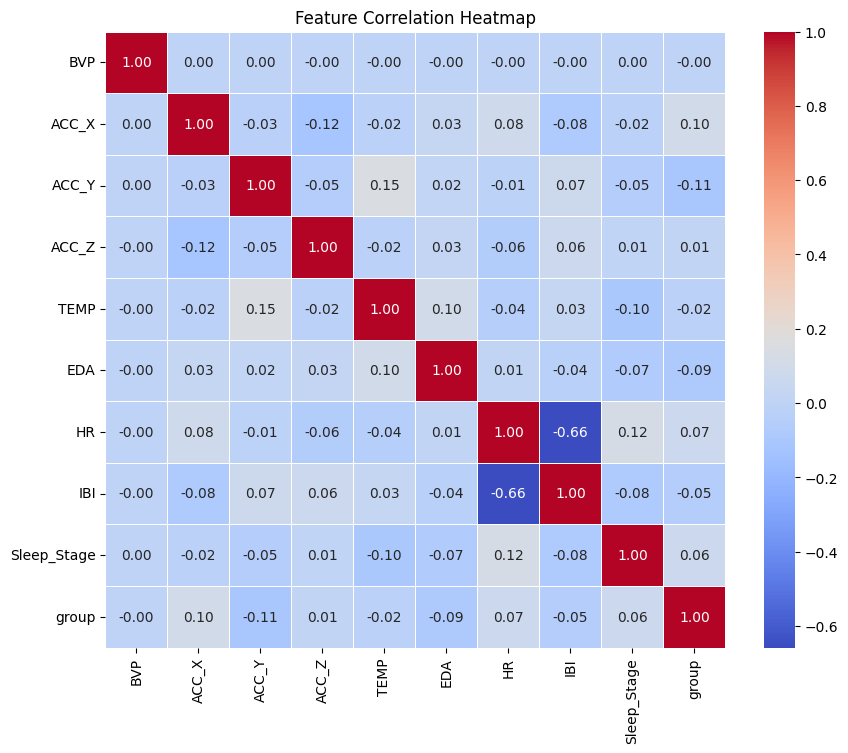

In [9]:
# Set figure size
plt.figure(figsize=(10, 8))

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Title
plt.title("Feature Correlation Heatmap")

# Show plot
plt.show()

###Testset

In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [20]:
def aggregate_features(df):
    feature_dict = {}
    for col in df.columns:
        if col != "Sleep_Stage":  # Don't aggregate the target variable
            feature_dict[f"{col}_mean"] = df[col].mean()
            feature_dict[f"{col}_std"] = df[col].std()
            feature_dict[f"{col}_min"] = df[col].min()
            feature_dict[f"{col}_max"] = df[col].max()

    # Assign the first Sleep_Stage value (all rows in 480-row block should be the same)
    feature_dict["Sleep_Stage"] = df["Sleep_Stage"].iloc[0]

    return feature_dict

In [12]:
df_sampled

BVP      ACC_X      ACC_Y      ACC_Z       TEMP       EDA  \
0         2.418650 -14.828296  30.645146  53.385008  33.264834  0.278546   
1         0.188797 -14.828296  30.645146  53.178063  33.264693  0.277723   
2        -6.186877 -14.828296  30.645146  53.302923  33.264913  0.278058   
3         2.519283 -14.828296  30.645146  53.324923  33.265262  0.279334   
4         0.138124 -14.828296  30.645146  53.379783  33.252813  0.278266   
...            ...        ...        ...        ...        ...       ...   
7976755   9.539100  -8.304844  37.565530  50.678855  35.163330  0.106669   
7976756 -21.981339  -7.866825  37.564763  50.455139  35.150848  0.106842   
7976757 -13.864248  -7.908983  37.565010  51.085215  35.142958  0.107204   
7976758  24.246395  -7.929640  37.565086  50.713636  35.142876  0.106865   
7976759  -0.556221  -7.814153  37.564986  51.253416  35.143145  0.106385   

                HR       IBI  Sleep_Stage  group  
0        88.030792  0.787580            2      0  
1        88.029887  0.786861            2      0  
2        88.031323  0.815331            2      0  
3        88.033531  0.834778            2      0  
4        87.952710  0.836640            2      0  
...            ...       ...          ...    ...  
7976755  56.541045  0.941908            2  66472  
7976756  56.647194  0.942427            2  66472  
7976757  56.714129  0.942199            2  66472  
7976758  56.714882  0.942167            2  66472  
7976759  56.712603  0.942242            2  66472  

[7976760 rows x 10 columns]

In [21]:
num_rows_per_group = 120
grouped_data = [aggregate_features(df_sampled.iloc[i:i+num_rows_per_group]) for i in range(0, len(df_sampled), num_rows_per_group)]

In [22]:
df_aggregated = pd.DataFrame(grouped_data)

In [95]:
df_aggregated

ACC_X_mean  ACC_X_std  ACC_X_min  ACC_X_max  ACC_Y_mean     ACC_Y_std  \
0     -18.635969   0.290893 -19.018293 -17.371166  -10.889437  8.075878e-02   
1     -18.754724   0.122151 -18.954673 -17.849747  -10.874084  8.169109e-14   
2     -18.765003   0.094313 -18.921305 -17.968267  -10.874084  8.494436e-14   
3     -18.783537   0.020396 -19.191961 -18.707373  -10.874084  8.494436e-14   
4     -18.782509   0.000004 -18.782559 -18.782476  -10.874084  2.617652e-13   
...          ...        ...        ...        ...         ...           ...   
4168  -15.562399   4.164342 -33.977096  -1.143365  -42.472379  1.773422e+00   
4169  -12.401492   0.334162 -13.188116 -11.558648  -41.678776  3.242890e-01   
4170   -9.727780   0.272565 -10.645728  -8.979133  -44.484889  2.125593e-06   
4171   -4.936411   2.972233 -14.736517   1.381365  -45.608083  8.496896e-01   
4172   -6.787847   0.362492  -8.959931  -5.603794  -48.886254  4.314693e-01   

      ACC_Y_min  ACC_Y_max  ACC_Z_mean  ACC_Z_std  ...   EDA_max    HR_mean  \
0    -11.614416 -10.714043   60.218323   0.195847  ...  0.115652  82.558539   
1    -10.874084 -10.874084   60.230566   0.163139  ...  0.128265  77.470070   
2    -10.874084 -10.874084   60.233763   0.162011  ...  0.129541  76.119578   
3    -10.874084 -10.874084   60.116335   0.242370  ...  0.132129  77.174156   
4    -10.874084 -10.874084   60.252304   0.135199  ...  0.135870  77.998935   
...         ...        ...         ...        ...  ...       ...        ...   
4168 -49.604202 -38.960193   41.720810   3.097394  ...  0.345367  67.440988   
4169 -42.679169 -41.292380   43.664163   0.294839  ...  0.162332  64.554872   
4170 -44.484914 -44.484865   41.484225   0.134939  ...  0.158514  63.630232   
4171 -47.644434 -43.074089   40.639643   1.013837  ...  0.163712  66.047038   
4172 -49.860339 -48.221891   36.196592   0.443245  ...  0.161027  64.291300   

        HR_std     HR_min     HR_max  Group_Label_mean  Group_Label_std  \
0     1.374061  80.861835  84.676879             192.0              0.0   
1     0.496962  76.582115  78.381791             216.0              0.0   
2     0.819146  75.106344  77.627573             220.0              0.0   
3     0.204088  76.885988  77.733734             231.0              0.0   
4     0.371081  77.480544  78.661875             240.0              0.0   
...        ...        ...        ...               ...              ...   
4168  0.326721  66.991468  68.093368           66262.0              0.0   
4169  0.336292  63.928170  65.119658           66273.0              0.0   
4170  0.559176  62.526330  64.563481           66290.0              0.0   
4171  1.641415  64.053657  69.028920           66390.0              0.0   
4172  0.304210  63.421729  64.710026           66450.0              0.0   

      Group_Label_min  Group_Label_max  Sleep_Stage  
0                 192              192            1  
1                 216              216            1  
2                 220              220            1  
3                 231              231            1  
4                 240              240            1  
...               ...              ...          ...  
4168            66262            66262            2  
4169            66273            66273            0  
4170            66290            66290            2  
4171            66390            66390            2  
4172            66450            66450            2  

[4173 rows x 29 columns]

In [23]:
# Drop unnecessary columns
df_aggregated = df_aggregated.drop(columns=['group_mean', 'group_std', 'group_min', 'group_max', 'Group_Label_mean',	'Group_Label_std',	'Group_Label_min',	'Group_Label_max'], errors='ignore')

In [24]:
print(df_aggregated["Sleep_Stage"].value_counts())

Sleep_Stage
0    43450
2    16027
1     6996
Name: count, dtype: int64


In [25]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_aggregated[df_aggregated["Sleep_Stage"] == 0]  # 43,450 samples
df_minority_2 = df_aggregated[df_aggregated["Sleep_Stage"] == 2]  # 16,027 samples
df_minority_1 = df_aggregated[df_aggregated["Sleep_Stage"] == 1]  # 6,996 samples

# Downsample majority class to match the minority class with the fewest samples (6,996)
df_majority_downsampled = resample(df_majority,
                                   replace=False,  # No replacement, just selecting a subset
                                   n_samples=6996,  # Match the smallest class
                                   random_state=42)

# Downsample the second largest class (Class 2) to 6,996 as well
df_minority_2_downsampled = resample(df_minority_2,
                                     replace=False,
                                     n_samples=6996,
                                     random_state=42)

# Combine all classes into a new balanced dataset
df_balanced = pd.concat([df_majority_downsampled, df_minority_2_downsampled, df_minority_1])

# Shuffle dataset to remove ordering bias
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
print(df_balanced["Sleep_Stage"].value_counts())

Sleep_Stage
1    6996
0    6996
2    6996
Name: count, dtype: int64


In [26]:
import os

In [27]:
main_test_folder = "/content/kaggle_competition/test_segment/test_segment"

# List all 10 sample folders inside the test directory
sample_folders = sorted([f.path for f in os.scandir(main_test_folder) if f.is_dir()])

# Dictionary to store merged DataFrames per sample
test_samples = {}

# Process each sample folder
for sample_idx, sample_folder in enumerate(sample_folders):
    print(f"Processing Sample {sample_idx + 1}...")

    # Get all CSV files inside this sample folder
    csv_files = sorted(glob.glob(os.path.join(sample_folder, "*.csv")))

    # Read and concatenate all 700 CSVs for this sample
    df_sample = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

    # Store in dictionary with sample index as key
    test_samples[sample_idx] = df_sample

    print(f"Sample {sample_idx + 1} merged with {df_sample.shape[0]} rows and {df_sample.shape[1]} columns.")

# Print summary of all merged samples
print(f"Total samples merged: {len(test_samples)}")

Processing Sample 1...
Sample 1 merged with 336480 rows and 8 columns.
Processing Sample 2...
Sample 2 merged with 336480 rows and 8 columns.
Processing Sample 3...
Sample 3 merged with 336480 rows and 8 columns.
Processing Sample 4...
Sample 4 merged with 336480 rows and 8 columns.
Processing Sample 5...
Sample 5 merged with 336480 rows and 8 columns.
Processing Sample 6...
Sample 6 merged with 336480 rows and 8 columns.
Processing Sample 7...
Sample 7 merged with 336480 rows and 8 columns.
Processing Sample 8...
Sample 8 merged with 336480 rows and 8 columns.
Processing Sample 9...
Sample 9 merged with 336480 rows and 8 columns.
Processing Sample 10...
Sample 10 merged with 336480 rows and 8 columns.
Total samples merged: 10


In [53]:
test_samples

{0:               BVP      ACC_X      ACC_Y      ACC_Z       TEMP       EDA  \
 0       15.336636 -32.612291 -38.552702  38.565604  31.999461  0.144345   
 1        9.070772 -31.468620 -39.610831  36.847039  31.999468  0.144389   
 2        4.852648 -32.882972 -39.485750  37.130310  31.999458  0.144247   
 3        2.176983 -33.718378 -39.601711  37.591057  31.999469  0.144565   
 4        1.112170 -32.182452 -39.517051  36.225780  31.999461  0.142745   
 ...           ...        ...        ...        ...        ...       ...   
 336475  16.733443  33.590803  39.503143  35.577634  32.958183  0.135717   
 336476  16.748447  33.669275  39.583505  35.621844  32.958595  0.133911   
 336477  17.924725  33.495010  39.508106  35.509135  32.958248  0.132723   
 336478  16.519923  33.881235  39.560886  35.829113  32.958347  0.133076   
 336479  12.928820  34.365169  39.564074  35.946037  32.958898  0.132815   
 
                HR       IBI  
 0       51.137785  1.251138  
 1       51.137865  1

In [46]:
df_test = pd.concat([df.assign(Sample_ID=sample_id) for sample_id, df in test_samples.items()], ignore_index=True)
'''df_test = df_test.drop(columns=["BVP"])
df_test = df_test.drop(columns=["IBI"])'''

# Display the shape of the combined DataFrame
print(df_test.shape)  # Should be (3364800, 9) → 10 samples * 336480 rows each

# Check the first few rows
print(df_test.head())

(3364800, 9)
         BVP      ACC_X      ACC_Y      ACC_Z       TEMP       EDA         HR  \
0  15.336636 -32.612291 -38.552702  38.565604  31.999461  0.144345  51.137785   
1   9.070772 -31.468620 -39.610831  36.847039  31.999468  0.144389  51.137865   
2   4.852648 -32.882972 -39.485750  37.130310  31.999458  0.144247  51.137918   
3   2.176983 -33.718378 -39.601711  37.591057  31.999469  0.144565  51.137699   
4   1.112170 -32.182452 -39.517051  36.225780  31.999461  0.142745  51.138069   

        IBI  Sample_ID  
0  1.251138          0  
1  1.251138          0  
2  1.251138          0  
3  1.251138          0  
4  1.251138          0  


In [47]:
df_test = df_test.iloc[::4, :]
df_test = df_test.reset_index(drop=True)

In [ ]:
df_test

BVP      ACC_X      ACC_Y      ACC_Z       TEMP       EDA  \
0       15.336636 -32.612291 -38.552702  38.565604  31.999461  0.144345   
1        1.112170 -32.182452 -39.517051  36.225780  31.999461  0.142745   
2      -22.433606 -32.515919 -39.527679  37.396522  31.999479  0.142595   
3      -16.954816 -32.648661 -39.181490  37.389354  31.999443  0.143851   
4       23.405755 -33.589866 -39.312604  37.217479  31.999442  0.142800   
...           ...        ...        ...        ...        ...       ...   
841195 -11.441856 -25.702378   9.886503  58.129551  33.344245  1.397536   
841196 -27.106823 -25.702382   9.884615  58.015445  33.331860  1.397247   
841197  13.666224 -25.702381   9.885724  58.390890  33.324083  1.398642   
841198  16.371035 -25.702380   9.885673  57.914032  33.323933  1.396752   
841199  -0.534704 -25.702381   9.885413  57.951482  33.324175  1.396787   

               HR       IBI  Sample_ID  
0       51.137785  1.251138          0  
1       51.138069  1.251138          0  
2       51.137772  1.251138          0  
3       51.136797  1.251138          0  
4       51.161660  1.251138          0  
...           ...       ...        ...  
841195  56.476746  1.142954          9  
841196  56.458097  1.143068          9  
841197  56.445869  1.142941          9  
841198  56.446419  1.142974          9  
841199  56.448078  1.143412          9  

[841200 rows x 9 columns]

In [48]:
import pandas as pd

# Function to aggregate every 120-row block
def aggregate_blocks(df):
    num_rows_per_group = 120  # Group size
    groups = []

    for i in range(0, len(df), num_rows_per_group):
        df_block = df.iloc[i:i+num_rows_per_group]  # Extract 120-row block
        feature_dict = {}

        for col in df.columns:
            if col != "Sample_ID":  # Exclude Sample_ID from aggregation
                feature_dict[f"{col}_mean"] = df_block[col].mean()
                feature_dict[f"{col}_std"] = df_block[col].std()
                feature_dict[f"{col}_min"] = df_block[col].min()
                feature_dict[f"{col}_max"] = df_block[col].max()

        # Keep track of which sample this block belongs to
        feature_dict["Sample_ID"] = df_block["Sample_ID"].iloc[0]

        groups.append(feature_dict)

    return pd.DataFrame(groups)

# Apply function to each sample
df_test_aggregated = df_test.groupby("Sample_ID", group_keys=False).apply(aggregate_blocks)

# Reset index
df_test_aggregated.reset_index(drop=True, inplace=True)

# Display the shape of the new DataFrame
print(df_test_aggregated.shape)  # Should be ~ (700 per sample * 10 samples, features)
print(df_test_aggregated.head())

(7010, 33)
   BVP_mean     BVP_std     BVP_min     BVP_max  ACC_X_mean  ACC_X_std  \
0 -0.037187   27.435698  -95.997566   65.381936  -34.357319   0.784302   
1  1.183214   65.226618 -286.713482  217.577746  -28.409708  15.403416   
2 -2.975736  142.632897 -715.759291  392.709903  -12.396921   4.407926   
3  0.075123  134.623264 -746.268784  464.039834   -8.011826   1.743582   
4  2.544640  168.234143 -555.248502  628.356065   -7.677436   3.372178   

   ACC_X_min  ACC_X_max  ACC_Y_mean  ACC_Y_std  ...   EDA_max    HR_mean  \
0 -35.819416 -32.106608  -38.522558   0.660855  ...  0.148196  53.004131   
1 -71.279043  22.452856  -36.652622  12.559156  ...  0.276701  55.596823   
2 -23.626095  -1.087191  -38.116646   1.034863  ...  0.140570  63.468394   
3 -10.792190  -0.466935  -41.644185   0.935923  ...  0.118589  67.340389   
4 -11.025171   7.008995  -39.731839   0.680512  ...  0.113021  63.974212   

     HR_std     HR_min     HR_max  IBI_mean       IBI_std   IBI_min   IBI_max  \
0  0.9

<ipython-input-48-168c4661a16d>:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_test_aggregated = df_test.groupby("Sample_ID", group_keys=False).apply(aggregate_blocks)


In [49]:
df_test_aggregated

BVP_mean     BVP_std     BVP_min     BVP_max  ACC_X_mean  ACC_X_std  \
0    -0.037187   27.435698  -95.997566   65.381936  -34.357319   0.784302   
1     1.183214   65.226618 -286.713482  217.577746  -28.409708  15.403416   
2    -2.975736  142.632897 -715.759291  392.709903  -12.396921   4.407926   
3     0.075123  134.623264 -746.268784  464.039834   -8.011826   1.743582   
4     2.544640  168.234143 -555.248502  628.356065   -7.677436   3.372178   
...        ...         ...         ...         ...         ...        ...   
7005  0.023126   23.830060  -47.956244   34.180431  -30.612110   0.108043   
7006  0.222059   46.774016 -205.233937  325.663876  -30.553200   0.359154   
7007  1.053803   25.844148  -43.294246  112.415543  -29.706714   0.190182   
7008  1.349796   91.776685 -467.614571  307.452396  -26.877924   9.783922   
7009 -1.233438   43.509378 -337.561004  121.696355  -25.868726   0.958414   

      ACC_X_min  ACC_X_max  ACC_Y_mean  ACC_Y_std  ...   EDA_max    HR_mean  \
0    -35.819416 -32.106608  -38.522558   0.660855  ...  0.148196  53.004131   
1    -71.279043  22.452856  -36.652622  12.559156  ...  0.276701  55.596823   
2    -23.626095  -1.087191  -38.116646   1.034863  ...  0.140570  63.468394   
3    -10.792190  -0.466935  -41.644185   0.935923  ...  0.118589  67.340389   
4    -11.025171   7.008995  -39.731839   0.680512  ...  0.113021  63.974212   
...         ...        ...         ...        ...  ...       ...        ...   
7005 -30.771939 -30.235692    9.847443   0.129716  ...  1.398337  50.801285   
7006 -31.621831 -28.532105    9.812112   0.198903  ...  1.402585  49.965426   
7007 -30.667741 -29.633302    9.686088   0.296083  ...  1.404864  51.567140   
7008 -54.765791 -14.264357    7.495237   3.759138  ...  1.419355  53.437896   
7009 -31.190978 -21.264325    9.770048   0.406988  ...  1.402517  56.103401   

        HR_std     HR_min     HR_max  IBI_mean       IBI_std   IBI_min  \
0     0.987546  51.136797  54.005906  1.226066  6.230792e-02  1.151363   
1     0.821634  53.584476  57.113889  1.287205  5.465120e-02  1.203990   
2     3.160810  57.395856  68.637988  1.297476  2.006781e-15  1.297476   
3     0.891396  65.904195  68.944600  1.297476  2.006781e-15  1.297476   
4     1.934013  60.794448  67.164628  1.297476  2.006781e-15  1.297476   
...        ...        ...        ...       ...           ...       ...   
7005  0.518962  50.099699  51.864940  1.178302  1.463033e-02  1.142631   
7006  0.292851  49.624970  50.683604  1.168550  2.159983e-02  1.140566   
7007  0.465231  50.701078  52.067764  1.162458  2.202054e-02  1.096092   
7008  0.826980  52.114951  55.083916  1.077729  5.936108e-02  0.873122   
7009  0.369188  55.177952  56.545667  1.104259  1.041068e-01  0.818960   

       IBI_max  Sample_ID  
0     1.444228          0  
1     1.405986          0  
2     1.297476          0  
3     1.297476          0  
4     1.297476          0  
...        ...        ...  
7005  1.205420          9  
7006  1.206670          9  
7007  1.206322          9  
7008  1.113302          9  
7009  1.225019          9  

[7010 rows x 33 columns]

In [33]:
df_aggregated

BVP_mean    BVP_std    BVP_min    BVP_max  ACC_X_mean     ACC_X_std  \
0     -0.083347   3.318109  -8.140795   5.600106  -14.359571  2.244695e+00   
1     -0.105220   3.549910 -14.032210   6.454855   -7.923054  1.013528e-01   
2     -0.075903   3.102917  -6.612507   4.665980   -7.908425  8.501224e-10   
3     -0.011496   2.952331  -6.069565   7.930728   -7.976529  3.135386e-01   
4     -0.018621   3.273556  -7.073167   8.382470   -9.394800  5.117265e-01   
...         ...        ...        ...        ...         ...           ...   
66468 -0.033313  22.540517 -42.427387  37.809672   -9.847967  1.348186e-01   
66469  0.068880  21.917121 -45.574713  41.565208   -9.623411  4.525573e-01   
66470 -0.044556  22.792183 -42.873873  39.113952   -9.797206  2.431902e-01   
66471  0.025976  22.566419 -40.524106  36.789306   -7.982525  4.016391e-01   
66472 -0.043293  21.799869 -41.577980  37.692507   -7.923330  1.004950e-01   

       ACC_X_min  ACC_X_max  ACC_Y_mean     ACC_Y_std  ...   EDA_max  \
0     -16.734272  -2.984952   30.464810  3.756785e-01  ...  0.280655   
1      -8.656661  -7.691100   30.639129  5.784558e-02  ...  0.280665   
2      -7.908425  -7.908425   30.645146  1.282357e-09  ...  0.279883   
3      -9.157902  -6.830426   30.659140  1.530191e-01  ...  0.281915   
4     -10.063131  -5.900315   30.630680  2.589055e-01  ...  0.281924   
...          ...        ...         ...           ...  ...       ...   
66468  -9.995425  -9.103868   37.434177  2.208713e-01  ...  0.111510   
66469 -10.262402  -7.864547   37.399466  2.787157e-01  ...  0.112285   
66470  -9.944028  -8.785267   37.129304  4.029501e-01  ...  0.108982   
66471  -9.907349  -6.848551   37.561016  2.283798e-01  ...  0.108950   
66472  -8.666455  -7.794473   37.569058  3.051832e-02  ...  0.108974   

         HR_mean    HR_std     HR_min     HR_max  IBI_mean   IBI_std  \
0      87.772805  0.308599  87.307129  88.231555  0.694911  0.060883   
1      85.349833  0.679066  84.698334  87.207334  0.662703  0.024400   
2      86.351454  0.623935  85.488745  87.370045  0.690348  0.042244   
3      86.279960  0.283226  85.816483  86.746264  0.673944  0.032493   
4      87.166854  0.834899  85.973770  88.101253  0.651564  0.045863   
...          ...       ...        ...        ...       ...       ...   
66468  64.137597  1.785314  61.486339  67.410424  1.033181  0.029428   
66469  59.624107  0.778013  58.838472  61.398229  0.914638  0.065213   
66470  61.561188  0.739650  59.680102  62.150777  0.991721  0.090775   
66471  60.757145  1.166074  58.203532  61.891211  1.059328  0.017311   
66472  56.427986  0.656714  55.773905  58.068283  0.988670  0.080995   

        IBI_min   IBI_max  Sleep_Stage  
0      0.585243  0.836640            2  
1      0.601994  0.711837            2  
2      0.571033  0.760100            2  
3      0.568656  0.775215            2  
4      0.571515  0.773379            2  
...         ...       ...          ...  
66468  1.003051  1.274133            2  
66469  0.818278  1.036750            2  
66470  0.864820  1.223211            2  
66471  1.033125  1.099154            2  
66472  0.818009  1.081619            2  

[66473 rows x 33 columns]

###Model

In [34]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

# Split into features (X) and target (y)
X_train = df_aggregated.drop(columns=["Sleep_Stage"])  # Features
y_train = df_aggregated["Sleep_Stage"]  # Target

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [73]:
from collections import Counter
import numpy as np

# Get class distribution
class_counts = Counter(y_train)
total_samples = sum(class_counts.values())

# Compute class weights (inverse frequency)
class_weights = {cls: total_samples / count for cls, count in class_counts.items()}

In [92]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Train-test split for validation
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print(f"✅ Training Size: {X_train_split.shape}, Validation Size: {X_val.shape}")
weights = np.array([class_weights[label] for label in y_train])

# Train the model with sample weights
xgb_model = xgb.XGBClassifier(
    subsample=0.8,
    reg_lambda=10,
    reg_alpha=0.1,
    n_estimators=200,
    min_child_weight=3,
    max_depth=8,
    learning_rate=0.1,
    gamma=0.2,
    colsample_bytree=0.9,
    objective="multi:softmax",
    num_class=len(le.classes_),
    eval_metric="mlogloss",
    use_label_encoder=False
)
# Train model
xgb_model.fit(X_train_split, y_train_split)

✅ Training Size: (53178, 32), Validation Size: (13295, 32)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:05:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0.2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [95]:
# Predict on validation set
y_val_pred = xgb_model.predict(X_val)

# Compute evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
f1_macro = f1_score(y_val, y_val_pred, average="macro")
f1_weighted = f1_score(y_val, y_val_pred, average="weighted")

print(f"✅ Validation Accuracy: {accuracy:.4f}")
print(f"✅ Validation Macro F1-Score: {f1_macro:.4f}")
print(f"✅ Validation Weighted F1-Score: {f1_weighted:.4f}")

# Display classification report
print("\n✅ Classification Report:")
print(classification_report(y_val, y_val_pred))


✅ Validation Accuracy: 0.8622
✅ Validation Macro F1-Score: 0.8240
✅ Validation Weighted F1-Score: 0.8591

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      8690
           1       0.90      0.73      0.81      1399
           2       0.82      0.71      0.76      3206

    accuracy                           0.86     13295
   macro avg       0.86      0.80      0.82     13295
weighted avg       0.86      0.86      0.86     13295



In [94]:
from sklearn.model_selection import RandomizedSearchCV

# Train-test split for validation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Define the hyperparameter grid
param_grid = {
    "max_depth": [4, 6, 8, 10],  # Control complexity
    "learning_rate": [0.01, 0.05, 0.1],  # Step size for updates
    "n_estimators": [100, 200, 300],  # Number of boosting rounds
    "gamma": [0, 0.1, 0.2, 0.3],  # Min loss reduction for split
    "subsample": [0.7, 0.8, 0.9],  # % of samples used in each boosting round
    "colsample_bytree": [0.7, 0.8, 0.9],  # % of features used in each split
    "min_child_weight": [1, 3, 5],  # Minimum sum of weights for leaf nodes
    "reg_lambda": [0.01, 0.1, 1, 10],  # L2 Regularization
    "reg_alpha": [0.01, 0.1, 1, 10],  # L1 Regularization
}

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=len(le.classes_),
    eval_metric="mlogloss",
    use_label_encoder=False
)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_clf,
    param_distributions=param_grid,
    n_iter=30,  # Number of random combinations to try
    scoring="f1_weighted",  # Optimize for F1-score
    cv=3,  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available CPUs
    random_state=42
)

# Fit search model
random_search.fit(X_train_split, y_train_split)

# Retrieve best hyperparameters
best_params = random_search.best_params_
print("✅ Best Hyperparameters:", best_params)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


KeyboardInterrupt: 

###Predict

In [96]:
# Ensure df_test_aggregated does not have Sleep_Stage column
X_test = df_test_aggregated.drop(columns=["Sample_ID"], errors='ignore')

# Apply the same scaler trained on X_train
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Add back Sample_ID for reference
X_test_scaled["Sample_ID"] = df_test_aggregated["Sample_ID"]

print(f"Test Data Shape After Scaling: {X_test_scaled.shape}")


Test Data Shape After Scaling: (7010, 33)


In [97]:
y_pred_test = xgb_model.predict(X_test_scaled.drop(columns=["Sample_ID"]))

# Convert predictions back to original Sleep_Stage labels
y_pred_labels = le.inverse_transform(y_pred_test)

In [98]:
y_pred_labels

array(['N', 'W', 'W', ..., 'N', 'W', 'N'], dtype=object)

In [99]:
sample_submissions = pd.read_csv("/content/kaggle_competition/sample_submission.csv")

In [100]:
# Assign predictions to the correct column (assuming it's called 'Sleep_Stage')
sample_submissions["labels"] = y_pred_labels

# Save the final submission file
sample_submissions.to_csv("final_submission.csv", index=False)

In [101]:
print(sample_submissions["labels"].value_counts())

labels
N    6084
W     918
R       8
Name: count, dtype: int64


##Time-Series

###Data

In [1412]:
df = pd.read_csv('/content/kaggle_competition/train/train/train001.csv')

In [1413]:
df

BVP      ACC_X      ACC_Y      ACC_Z       TEMP       EDA  \
0        25.325870 -21.809247 -60.302750   4.940839  31.722653  0.064595   
1        20.021505 -19.437787 -60.565345   7.408788  31.722647  0.064523   
2        16.314478 -21.624667 -61.142561   4.105717  31.722735  0.064659   
3         9.324392 -21.761314 -61.985822   3.972967  31.722564  0.064440   
4        -1.014338 -19.055301 -59.934137   9.097628  31.722790  0.065397   
...            ...        ...        ...        ...        ...       ...   
356635   59.628219 -32.636398 -23.730186  49.433474  34.965154  0.140579   
356636  163.656085 -32.615814 -23.717156  49.391365  34.965010  0.140539   
356637  203.457671 -32.621808 -23.733782  49.468040  34.965266  0.140530   
356638  182.633893 -32.628004 -23.718944  49.363862  34.964999  0.140567   
356639  122.654620 -32.613969 -23.728070  49.549464  34.965198  0.140515   

               HR       IBI Sleep_Stage  
0       72.015570  1.050338           W  
1       72.015802  1.050338           W  
2       72.017417  1.050338           W  
3       72.013801  1.050338           W  
4       72.018920  1.050338           W  
...           ...       ...         ...  
356635  77.236003  1.034892           W  
356636  77.235527  1.034892           W  
356637  77.235586  1.034892           W  
356638  77.235842  1.034892           W  
356639  77.235431  1.034892           W  

[356640 rows x 9 columns]

In [1414]:
"""df_sampled = df.iloc[::4, :]
df_sampled = df_sampled.reset_index(drop=True)"""
df_sampled = df.copy()

In [1415]:
df_sampled

BVP      ACC_X      ACC_Y      ACC_Z       TEMP       EDA  \
0        25.325870 -21.809247 -60.302750   4.940839  31.722653  0.064595   
1        20.021505 -19.437787 -60.565345   7.408788  31.722647  0.064523   
2        16.314478 -21.624667 -61.142561   4.105717  31.722735  0.064659   
3         9.324392 -21.761314 -61.985822   3.972967  31.722564  0.064440   
4        -1.014338 -19.055301 -59.934137   9.097628  31.722790  0.065397   
...            ...        ...        ...        ...        ...       ...   
356635   59.628219 -32.636398 -23.730186  49.433474  34.965154  0.140579   
356636  163.656085 -32.615814 -23.717156  49.391365  34.965010  0.140539   
356637  203.457671 -32.621808 -23.733782  49.468040  34.965266  0.140530   
356638  182.633893 -32.628004 -23.718944  49.363862  34.964999  0.140567   
356639  122.654620 -32.613969 -23.728070  49.549464  34.965198  0.140515   

               HR       IBI Sleep_Stage  
0       72.015570  1.050338           W  
1       72.015802  1.050338           W  
2       72.017417  1.050338           W  
3       72.013801  1.050338           W  
4       72.018920  1.050338           W  
...           ...       ...         ...  
356635  77.236003  1.034892           W  
356636  77.235527  1.034892           W  
356637  77.235586  1.034892           W  
356638  77.235842  1.034892           W  
356639  77.235431  1.034892           W  

[356640 rows x 9 columns]

In [1416]:
df_sampled["Group_Label"] = df_sampled.index // 480

In [1417]:
df_sampled = df_sampled.drop(columns=["BVP"])
df_sampled = df_sampled.drop(columns=["IBI"])

In [1418]:
df_sampled

ACC_X      ACC_Y      ACC_Z       TEMP       EDA         HR  \
0      -21.809247 -60.302750   4.940839  31.722653  0.064595  72.015570   
1      -19.437787 -60.565345   7.408788  31.722647  0.064523  72.015802   
2      -21.624667 -61.142561   4.105717  31.722735  0.064659  72.017417   
3      -21.761314 -61.985822   3.972967  31.722564  0.064440  72.013801   
4      -19.055301 -59.934137   9.097628  31.722790  0.065397  72.018920   
...           ...        ...        ...        ...       ...        ...   
356635 -32.636398 -23.730186  49.433474  34.965154  0.140579  77.236003   
356636 -32.615814 -23.717156  49.391365  34.965010  0.140539  77.235527   
356637 -32.621808 -23.733782  49.468040  34.965266  0.140530  77.235586   
356638 -32.628004 -23.718944  49.363862  34.964999  0.140567  77.235842   
356639 -32.613969 -23.728070  49.549464  34.965198  0.140515  77.235431   

       Sleep_Stage  Group_Label  
0                W            0  
1                W            0  
2                W            0  
3                W            0  
4                W            0  
...            ...          ...  
356635           W          742  
356636           W          742  
356637           W          742  
356638           W          742  
356639           W          742  

[356640 rows x 8 columns]

In [1419]:
df_wakestage = df_sampled[df_sampled["Sleep_Stage"] == "W"].reset_index(drop=True)
df_nonstage = df_sampled[df_sampled["Sleep_Stage"] == "N"].reset_index(drop=True)
df_remstage = df_sampled[df_sampled["Sleep_Stage"] == "R"].reset_index(drop=True)

In [1420]:
df_remstage

ACC_X      ACC_Y      ACC_Z       TEMP       EDA         HR  \
0       1.236553 -43.533703  47.530215  34.965123  0.809901  61.274993   
1       1.150005 -43.532668  47.384151  34.965123  0.809233  61.318292   
2       3.653524 -42.858261  47.556956  34.965123  0.809519  61.307117   
3       3.835384 -43.004713  46.828413  34.965122  0.809274  61.311063   
4       2.997573 -43.621289  46.378670  34.965124  0.809488  61.311043   
...          ...        ...        ...        ...       ...        ...   
38395 -18.785746 -28.771953  54.042250  33.897484  0.136655  95.288245   
38396 -18.792281 -28.481532  53.517597  33.897488  0.137543  95.260868   
38397 -18.769111 -29.414707  53.631416  33.897484  0.138103  95.285254   
38398 -18.801533 -29.555497  54.241723  33.897486  0.137971  95.276370   
38399 -18.756093 -28.057958  54.487783  33.897487  0.138089  95.244953   

      Sleep_Stage  Group_Label  
0               R          410  
1               R          410  
2               R          410  
3               R          410  
4               R          410  
...           ...          ...  
38395           R          694  
38396           R          694  
38397           R          694  
38398           R          694  
38399           R          694  

[38400 rows x 8 columns]

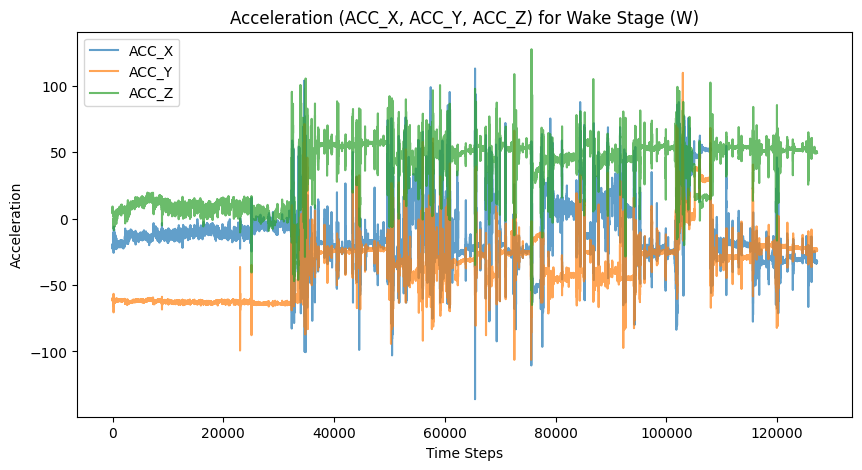

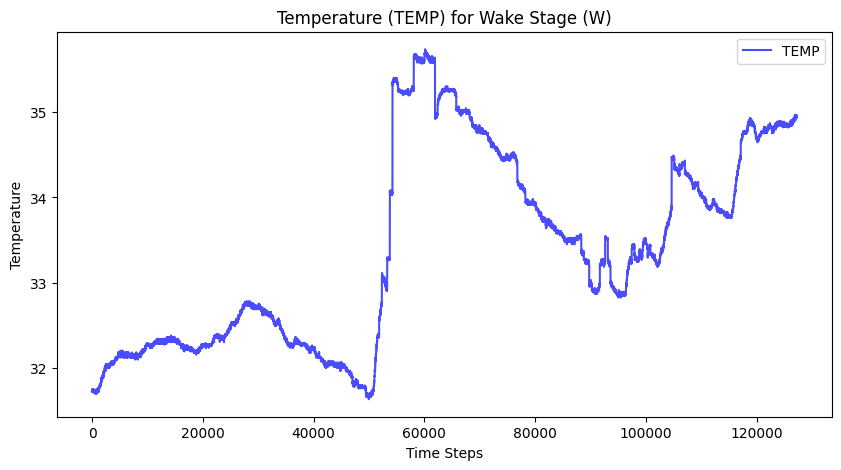

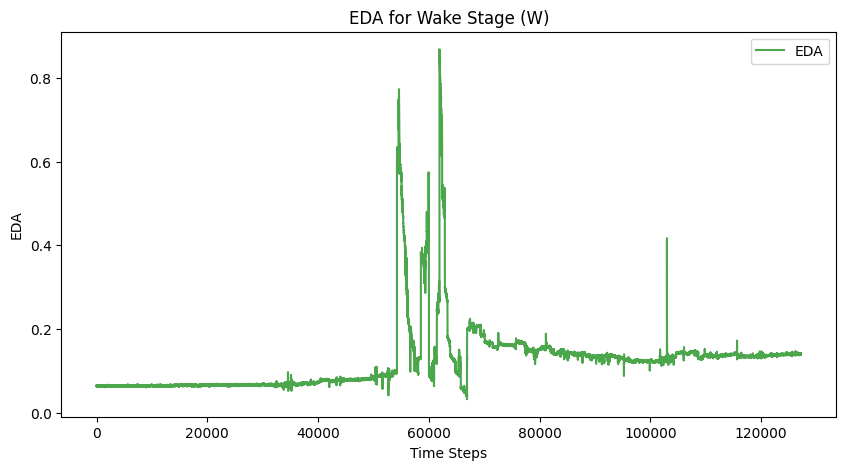

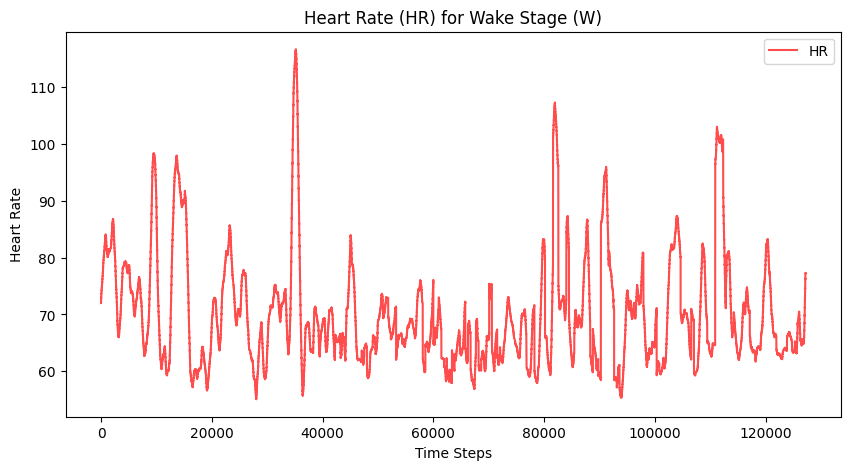

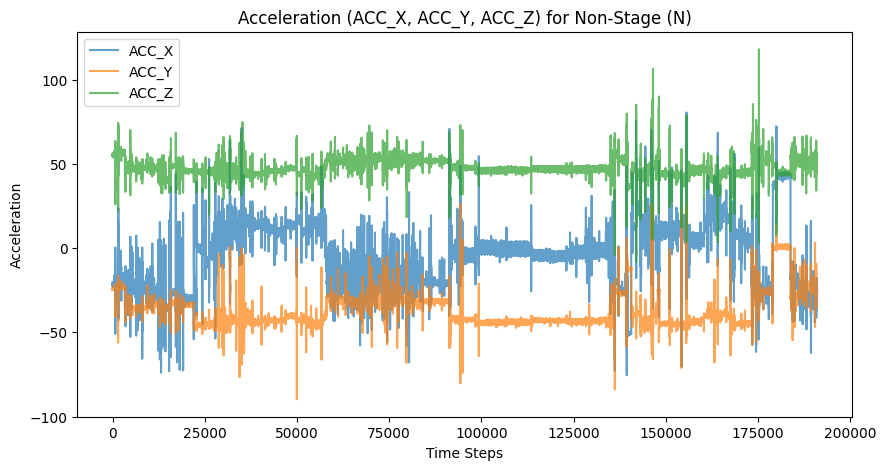

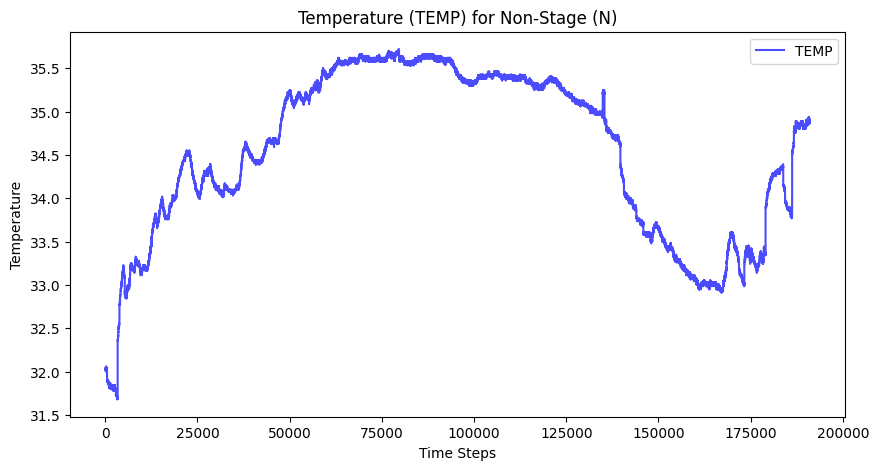

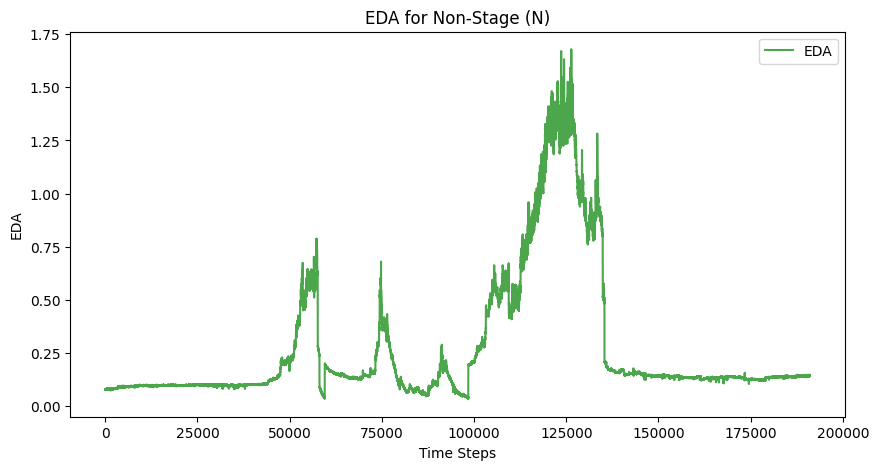

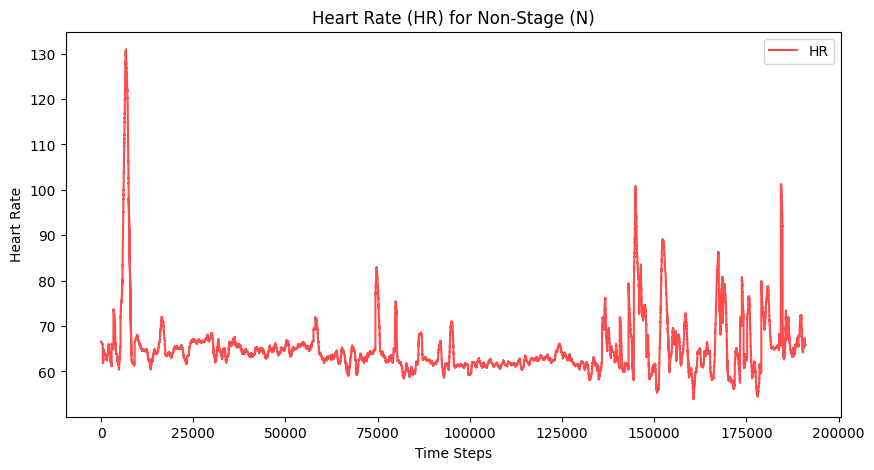

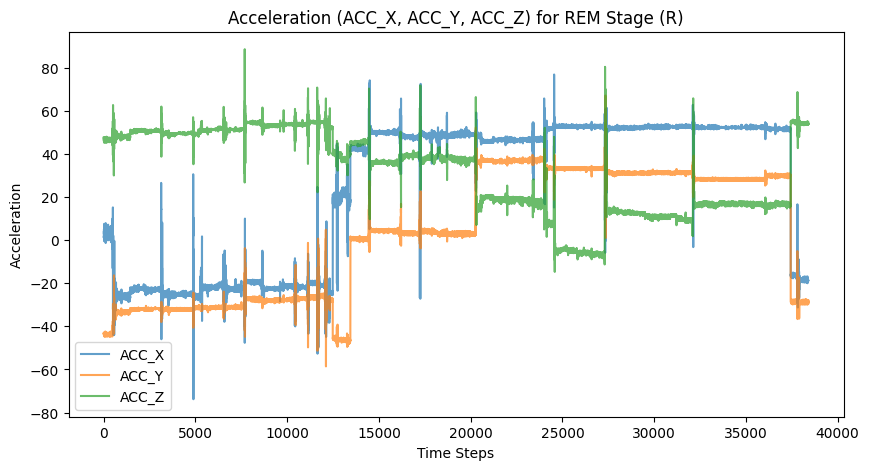

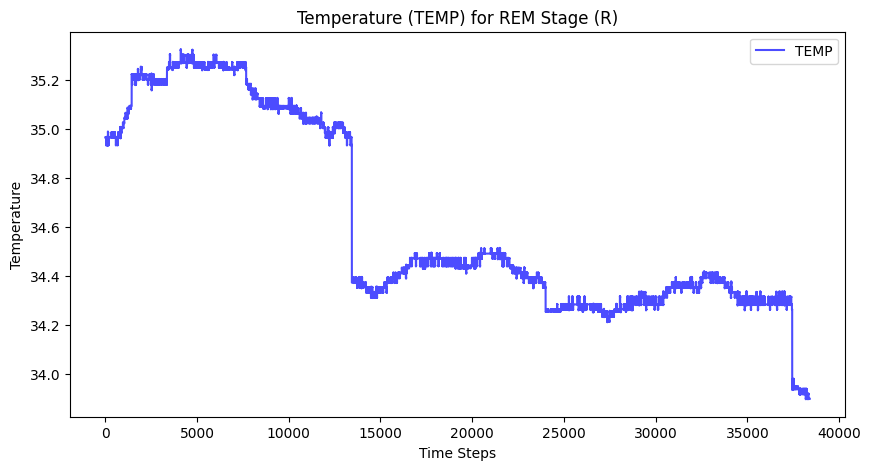

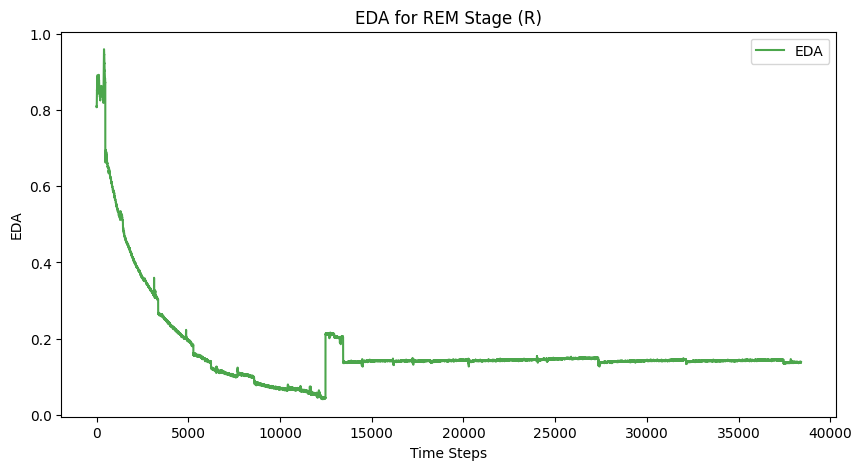

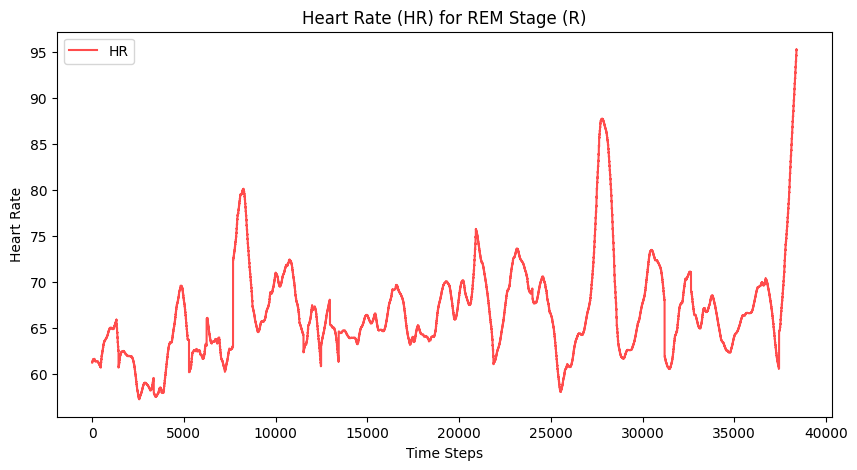

In [1421]:
sleep_stage_dfs = {
    "Wake Stage (W)": df_wakestage,
    "Non-Stage (N)": df_nonstage,
    "REM Stage (R)": df_remstage
}

# Loop through each sleep stage DataFrame
for stage, df_stage in sleep_stage_dfs.items():

    # Plot ACC_X, ACC_Y, ACC_Z together
    plt.figure(figsize=(10, 5))
    plt.plot(df_stage["ACC_X"], label="ACC_X", alpha=0.7)
    plt.plot(df_stage["ACC_Y"], label="ACC_Y", alpha=0.7)
    plt.plot(df_stage["ACC_Z"], label="ACC_Z", alpha=0.7)
    plt.xlabel("Time Steps")
    plt.ylabel("Acceleration")
    plt.title(f"Acceleration (ACC_X, ACC_Y, ACC_Z) for {stage}")
    plt.legend()
    plt.show()

    # Plot TEMP separately
    plt.figure(figsize=(10, 5))
    plt.plot(df_stage["TEMP"], label="TEMP", color='blue', alpha=0.7)
    plt.xlabel("Time Steps")
    plt.ylabel("Temperature")
    plt.title(f"Temperature (TEMP) for {stage}")
    plt.legend()
    plt.show()

    # Plot EDA separately
    plt.figure(figsize=(10, 5))
    plt.plot(df_stage["EDA"], label="EDA", color='green', alpha=0.7)
    plt.xlabel("Time Steps")
    plt.ylabel("EDA")
    plt.title(f"EDA for {stage}")
    plt.legend()
    plt.show()

    # Plot HR separately
    plt.figure(figsize=(10, 5))
    plt.plot(df_stage["HR"], label="HR", color='red', alpha=0.7)
    plt.xlabel("Time Steps")
    plt.ylabel("Heart Rate")
    plt.title(f"Heart Rate (HR) for {stage}")
    plt.legend()
    plt.show()

In [1422]:
import numpy as np

def random_group_label(df_wakestage, df_nonstage, df_remstage):
    """
    Randomly selects three sequential Group_Label values from each dataframe and returns them as arrays.
    """
    def get_sequential_labels(labels, num=2):
        """
        Helper function to select `num` sequential Group_Label values from a list of unique labels.
        """
        unique_labels = np.sort(labels.unique())  # Sort the unique labels
        if len(unique_labels) < num:
            raise ValueError(f"Not enough unique labels to select {num} sequential values.")

        # Randomly select a starting index for the sequence
        start_index = np.random.randint(0, len(unique_labels) - num + 1)
        return unique_labels[start_index:start_index + num]

    selected_labels = {
        "wake": get_sequential_labels(df_wakestage["Group_Label"]),
        "non_rem": get_sequential_labels(df_nonstage["Group_Label"]),
        "rem": get_sequential_labels(df_remstage["Group_Label"])
    }

    return selected_labels

# Example usage
selected_groups = random_group_label(df_wakestage, df_nonstage, df_remstage)
print(selected_groups)

{'wake': array([481, 482]), 'non_rem': array([339, 340]), 'rem': array([440, 441])}


In [1423]:
import numpy as np

def get_filtered_arrays(df_wakestage, df_nonstage, df_remstage, selected_groups, num_points=512):
    """
    Filters each dataframe based on the selected Group_Label values (which can be arrays),
    selects the first `num_points` rows, and returns three NumPy arrays.

    Parameters:
        df_wakestage (pd.DataFrame): DataFrame for wake stage data.
        df_nonstage (pd.DataFrame): DataFrame for non-REM stage data.
        df_remstage (pd.DataFrame): DataFrame for REM stage data.
        selected_groups (dict): Dictionary containing selected Group_Label values for each stage.
                               Values can be single integers or arrays of integers.
        num_points (int): Number of data points to include in each array (default: 256).

    Returns:
        wake_array (np.ndarray): Filtered and sliced wake stage data.
        non_rem_array (np.ndarray): Filtered and sliced non-REM stage data.
        rem_array (np.ndarray): Filtered and sliced REM stage data.
    """
    # Function to filter dataframe based on Group_Label values
    def filter_dataframe(df, group_labels):
        if isinstance(group_labels, (list, np.ndarray)):
            # If group_labels is an array, use isin to filter
            return df[df["Group_Label"].isin(group_labels)].to_numpy()
        else:
            # If group_labels is a single value, use equality to filter
            return df[df["Group_Label"] == group_labels].to_numpy()

    # Filter dataframes based on selected Group_Label values
    wake_array = filter_dataframe(df_wakestage, selected_groups["wake"])
    non_rem_array = filter_dataframe(df_nonstage, selected_groups["non_rem"])
    rem_array = filter_dataframe(df_remstage, selected_groups["rem"])

    # Slice each array to the first `num_points` rows
    wake_array = wake_array[:num_points, :]
    non_rem_array = non_rem_array[:num_points, :]
    rem_array = rem_array[:num_points, :]

    return wake_array, non_rem_array, rem_array

wake_array, non_rem_array, rem_array = get_filtered_arrays(df_wakestage, df_nonstage, df_remstage, selected_groups)

print(wake_array.shape, non_rem_array.shape, rem_array.shape)

(512, 8) (512, 8) (512, 8)


In [1424]:
wake_array

array([[-50.42808491875703, -12.14963350665191, 37.58049044351198, ...,
        60.62203191730312, 'W', 481],
       [-50.411928100592505, -12.158684386978962, 37.569884942206826,
        ..., 60.61720367034344, 'W', 481],
       [-50.411297685751, -11.86829145320288, 37.531165449965854, ...,
        60.618266283240025, 'W', 481],
       ...,
       [-48.88235935524695, -11.76455707641957, 39.75826751802912, ...,
        59.03634308601168, 'W', 482],
       [-49.0639429938371, -12.01816757902568, 38.83554871711556, ...,
        59.036425770808336, 'W', 482],
       [-49.99884110075651, -11.522644507448923, 39.02785136788256, ...,
        59.036375005568814, 'W', 482]], dtype=object)

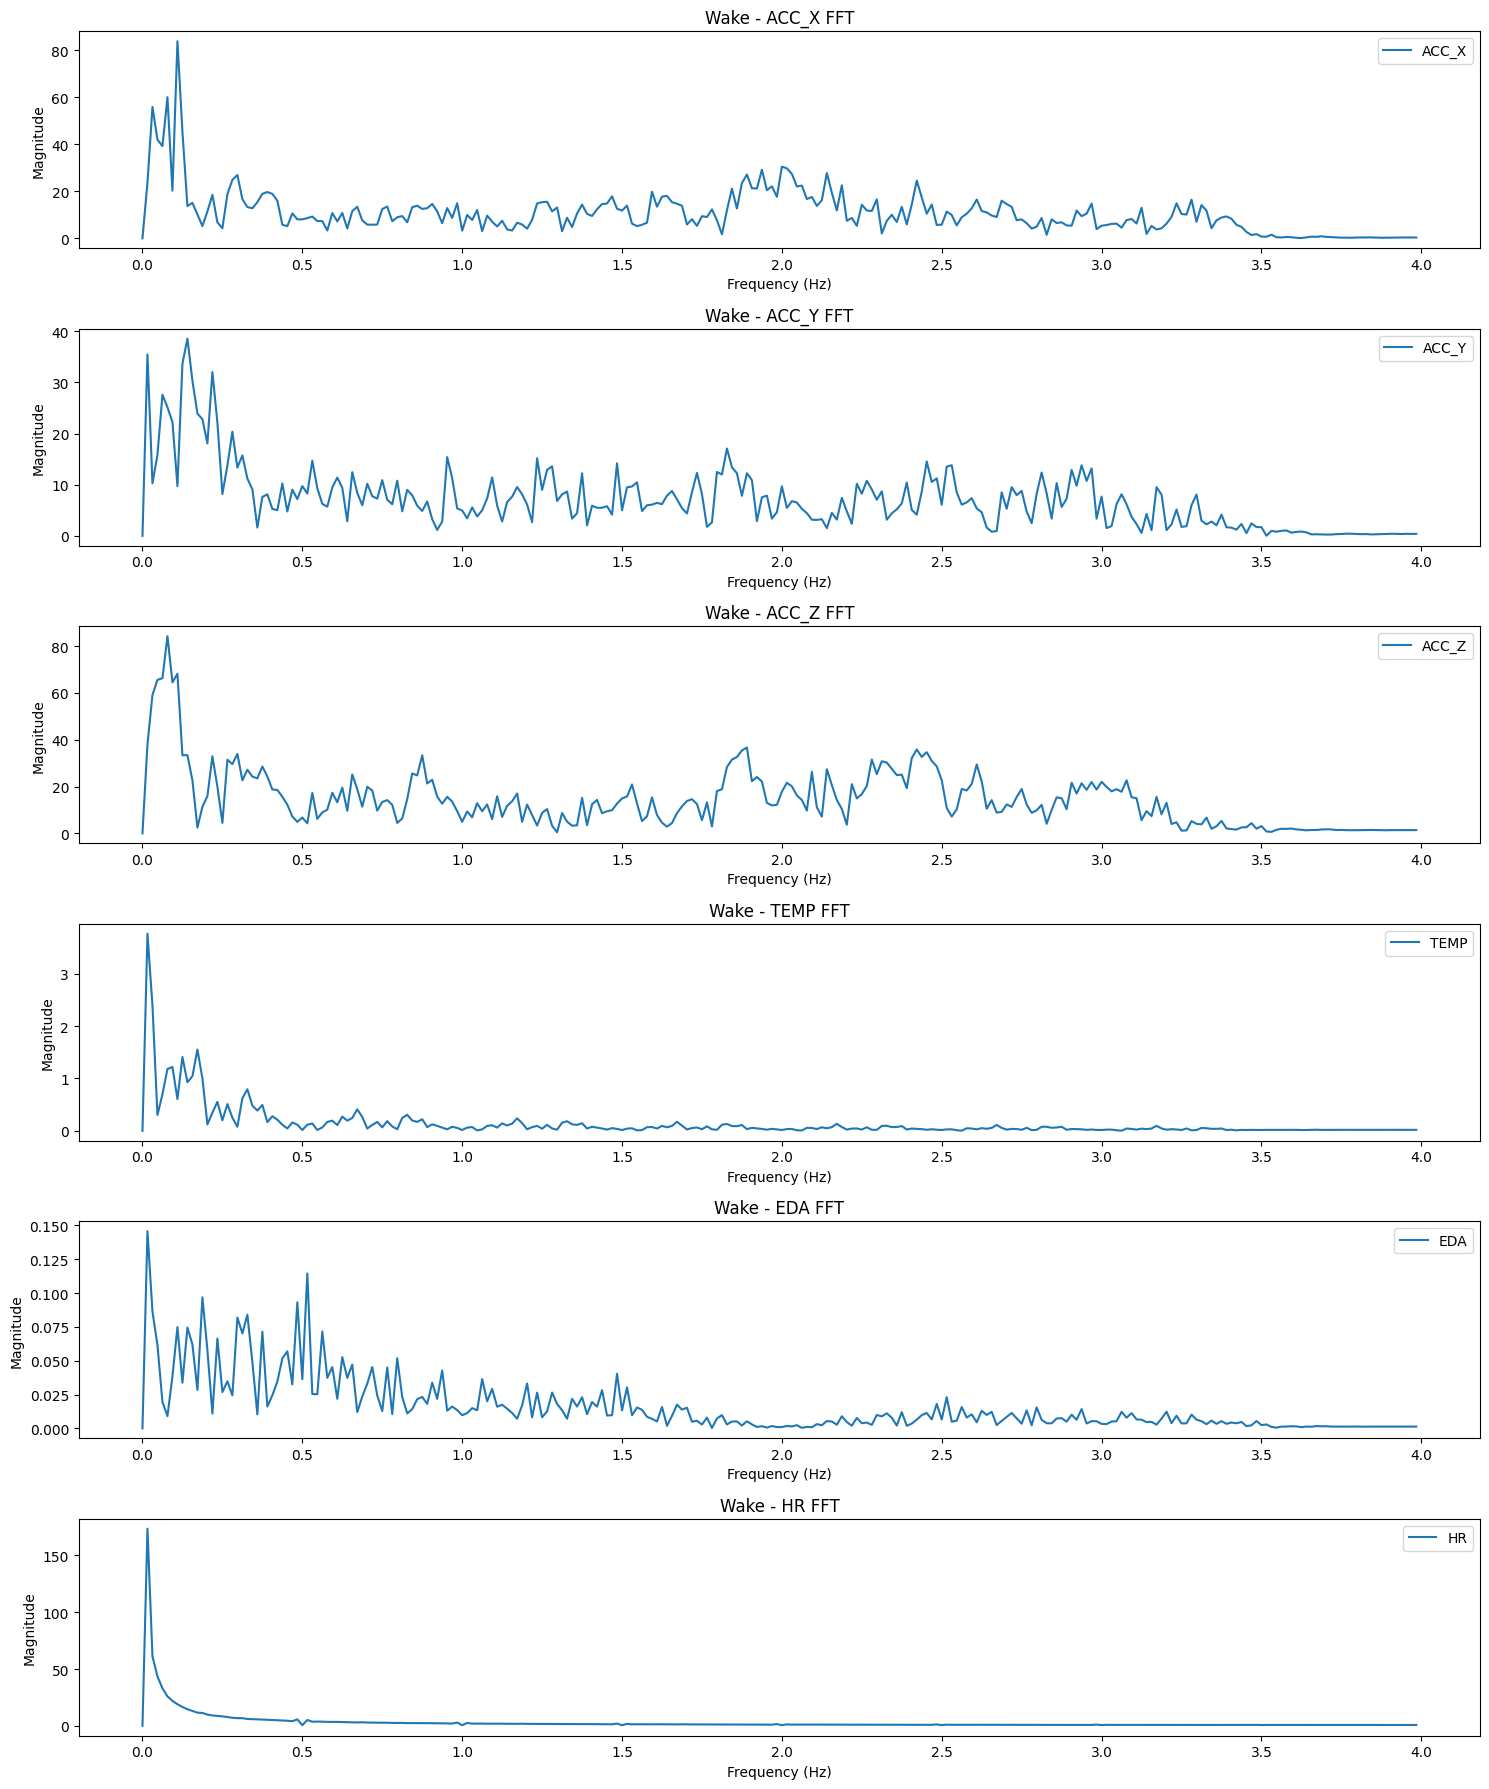

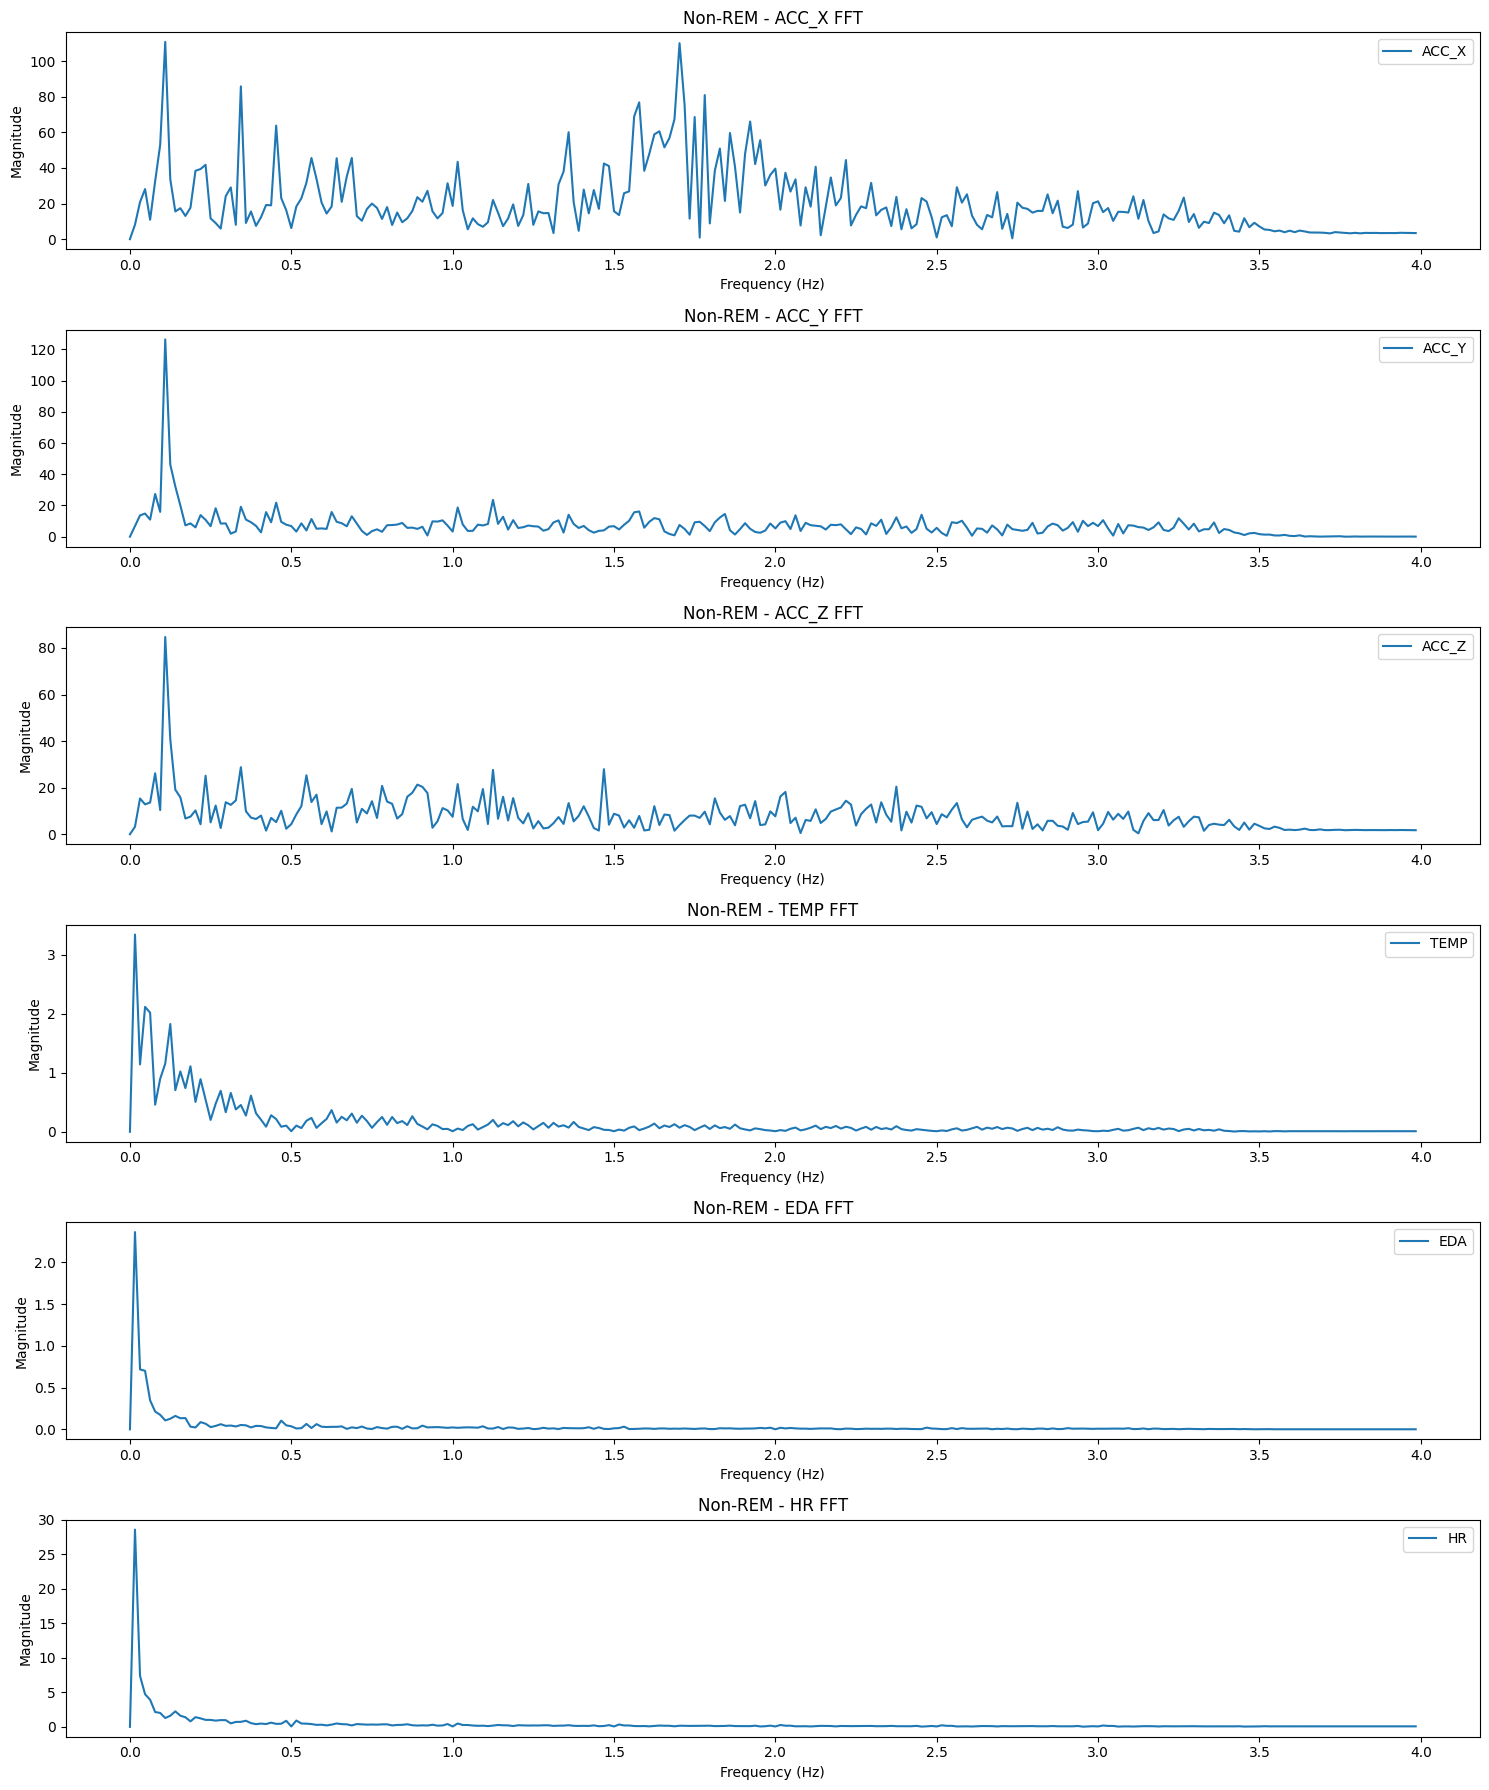

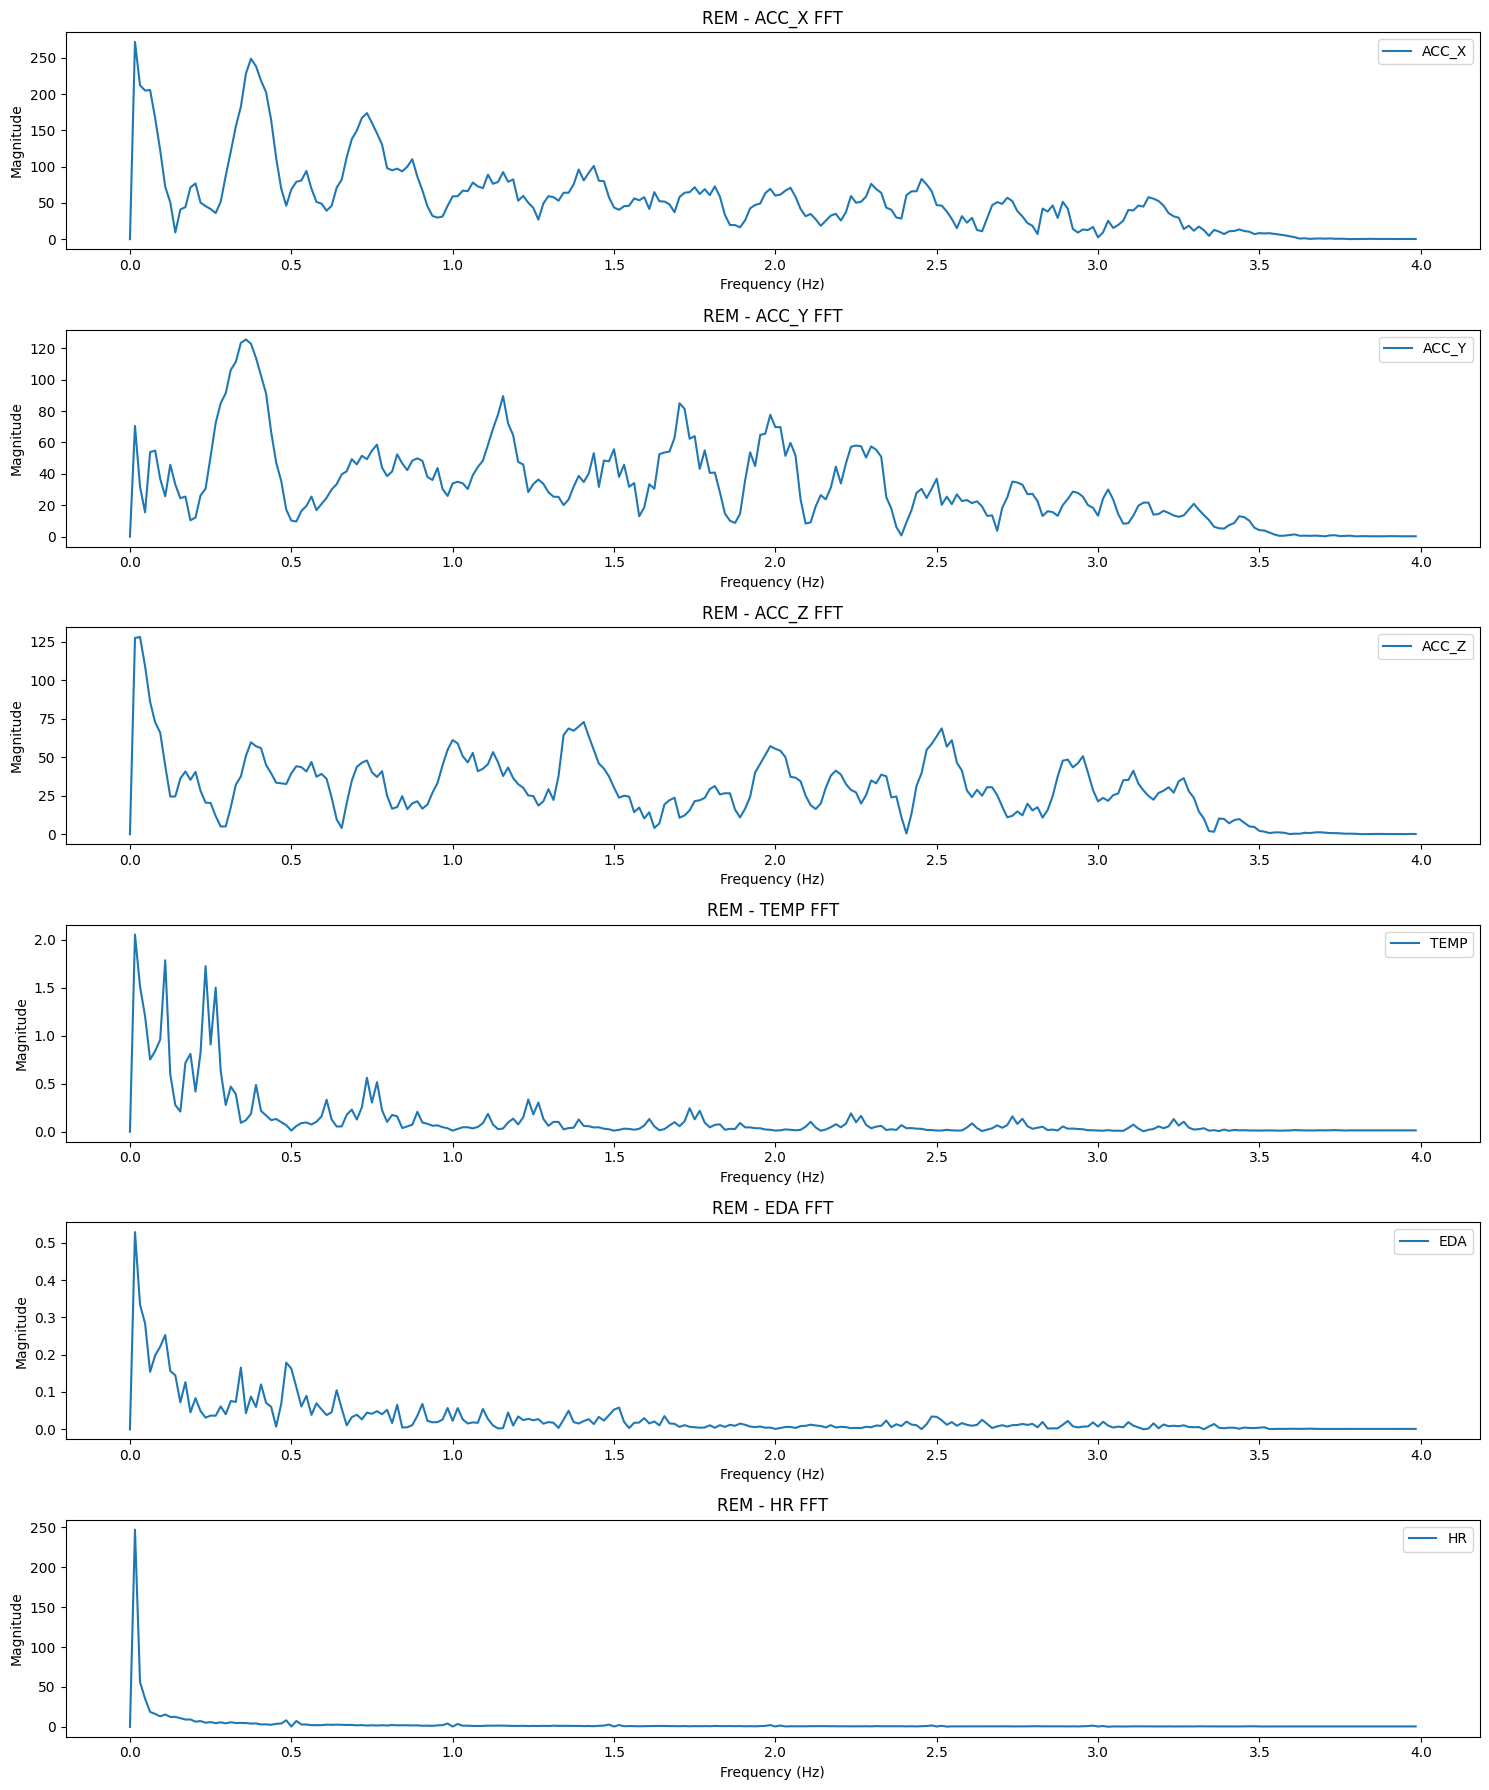

In [1425]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling rate (adjust as per your data)
sampling_rate = 8  # Hz (assuming your data is sampled at 8Hz)

# Function to apply FFT
def apply_fft(signal):
    n = len(signal)
    fft_signal = np.fft.fft(signal)
    fft_freq = np.fft.fftfreq(n, 1/sampling_rate)  # Frequency bins in Hz
    fft_mag = np.abs(fft_signal)  # Magnitude of FFT (absolute value)
    return fft_freq, fft_mag

# Function to pad data to the next power of two
def pad_to_power_of_two(signal):
    n = len(signal)
    next_power = 2 ** int(np.ceil(np.log2(n)))
    padded_signal = np.pad(signal, (0, next_power - n), mode='constant')
    return padded_signal

# Function to remove DC offset
def remove_dc_offset(signal):
    return signal - np.mean(signal)

# Convert each stage array (wake, non-rem, rem) to a dictionary
def stage_to_dict(stage_array):
    stage_dict = {
        'ACC_X': np.nan_to_num(stage_array[:, 0].astype(float)),
        'ACC_Y': np.nan_to_num(stage_array[:, 1].astype(float)),
        'ACC_Z': np.nan_to_num(stage_array[:, 2].astype(float)),
        'TEMP': np.nan_to_num(stage_array[:, 3].astype(float)),
        'EDA': np.nan_to_num(stage_array[:, 4].astype(float)),
        'HR': np.nan_to_num(stage_array[:, 5].astype(float)),
        'Sleep_Stage': stage_array[:, 6],  # Not used for FFT
        'Group_Label': stage_array[:, 7]   # Not used for FFT
    }
    return stage_dict

# Function to plot FFT for a given stage's data
def plot_fft_for_stage(data, stage_name):
    plt.figure(figsize=(15, 18))  # Adjust figure size for better readability

    # List of signals to plot (ACC_X, ACC_Y, etc.)
    signals = ['ACC_X', 'ACC_Y', 'ACC_Z', 'TEMP', 'EDA', 'HR']

    for i, signal in enumerate(signals):
        # Preprocess the signal
        signal_data = remove_dc_offset(data[signal])
        signal_data = pad_to_power_of_two(signal_data)

        # Apply FFT to the signal
        fft_freq, fft_mag = apply_fft(signal_data)

        # Subplot for each signal FFT
        plt.subplot(6, 1, i + 1)
        plt.plot(fft_freq[:len(fft_freq)//2], fft_mag[:len(fft_mag)//2], label=f'{signal}')
        plt.title(f'{stage_name} - {signal} FFT')
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Magnitude")
        plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage for each sleep stage data (wake, non-rem, rem)
wake_data = stage_to_dict(wake_array)
non_rem_data = stage_to_dict(non_rem_array)
rem_data = stage_to_dict(rem_array)

# Plot FFT for each stage (Wake, Non-REM, REM)
plot_fft_for_stage(wake_data, 'Wake')
plot_fft_for_stage(non_rem_data, 'Non-REM')
plot_fft_for_stage(rem_data, 'REM')

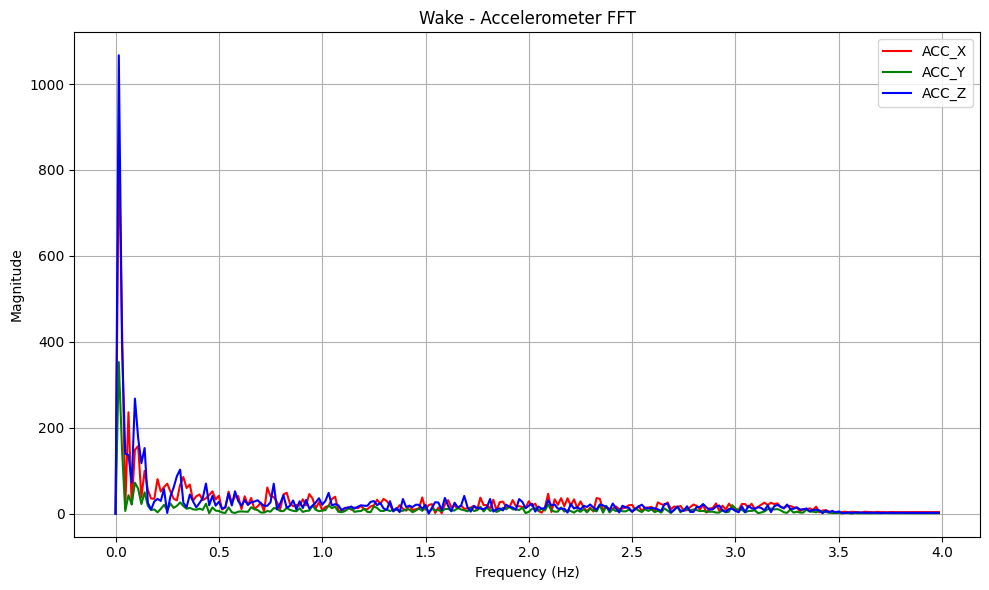

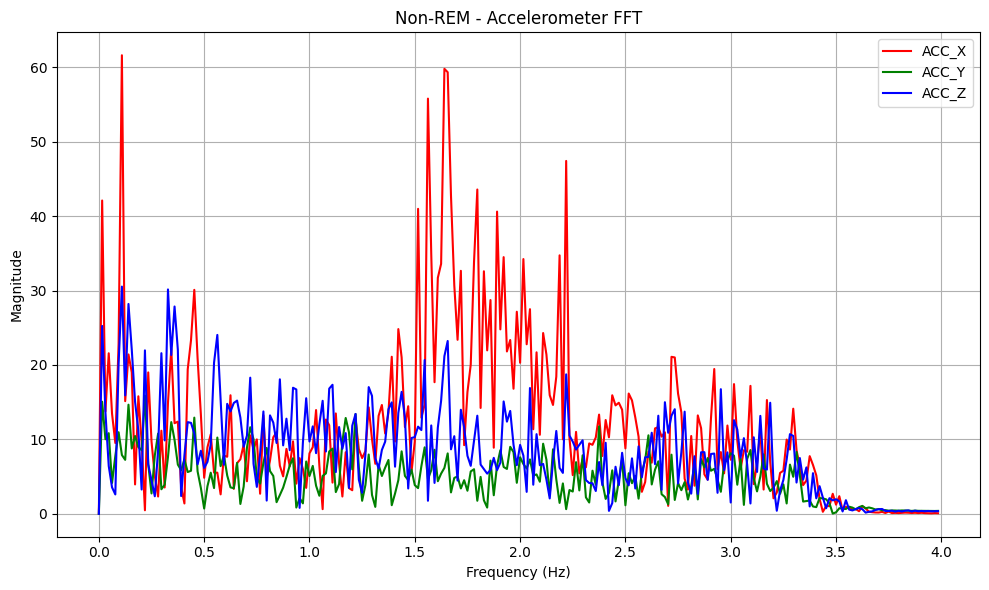

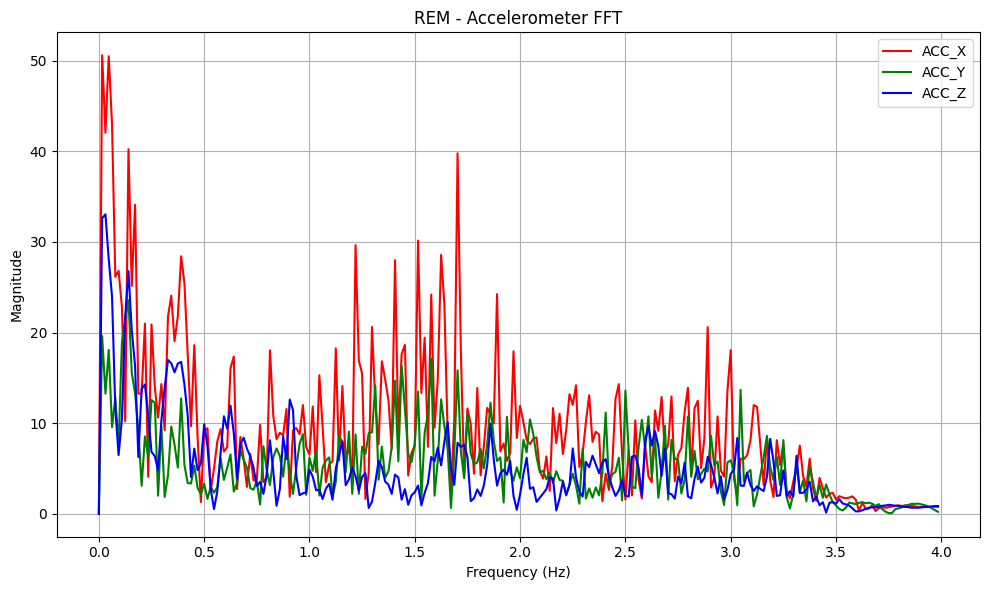

In [1426]:
selected_groups = random_group_label(df_wakestage, df_nonstage, df_remstage)
wake_array, non_rem_array, rem_array = get_filtered_arrays(df_wakestage, df_nonstage, df_remstage, selected_groups)

# Function to plot FFT for a given stage's data (ACC_X, ACC_Y, ACC_Z on the same graph)
def plot_fft_for_stage(data, stage_name):
    plt.figure(figsize=(10, 6))  # Adjust figure size for better readability

    # List of signals to plot (ACC_X, ACC_Y, ACC_Z)
    signals = ['ACC_X', 'ACC_Y', 'ACC_Z']
    colors = ['r', 'g', 'b']  # Colors for each signal

    for i, signal in enumerate(signals):
        # Preprocess the signal
        signal_data = remove_dc_offset(data[signal])
        signal_data = pad_to_power_of_two(signal_data)

        # Apply FFT to the signal
        fft_freq, fft_mag = apply_fft(signal_data)

        # Plot the FFT magnitude on the same graph
        plt.plot(fft_freq[:len(fft_freq)//2], fft_mag[:len(fft_mag)//2], label=f'{signal}', color=colors[i])

    # Add title, labels, and legend
    plt.title(f'{stage_name} - Accelerometer FFT')
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Example usage for each sleep stage data (wake, non-rem, rem)
wake_data = stage_to_dict(wake_array)
non_rem_data = stage_to_dict(non_rem_array)
rem_data = stage_to_dict(rem_array)

# Plot FFT for each stage (Wake, Non-REM, REM)
plot_fft_for_stage(wake_data, 'Wake')
plot_fft_for_stage(non_rem_data, 'Non-REM')
plot_fft_for_stage(rem_data, 'REM')

In [1427]:
sleep_stage_counts = df_sampled['Sleep_Stage'].value_counts()/480
print(sleep_stage_counts)

Sleep_Stage
N    398.0
W    265.0
R     80.0
Name: count, dtype: float64


In [1428]:
from sklearn.preprocessing import LabelEncoder
# Encode labels
label_encoder = LabelEncoder()
df_sampled['Sleep_Stage'] = label_encoder.fit_transform(df_sampled['Sleep_Stage'])

In [1429]:
group_label_to_sleep_stage = df_sampled.drop_duplicates('Group_Label').set_index('Group_Label')['Sleep_Stage'].to_dict()

# Print the mapping
print(group_label_to_sleep_stage)

{0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2, 27: 2, 28: 2, 29: 2, 30: 2, 31: 2, 32: 2, 33: 2, 34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 39: 2, 40: 2, 41: 2, 42: 2, 43: 2, 44: 2, 45: 2, 46: 2, 47: 2, 48: 2, 49: 2, 50: 2, 51: 2, 52: 2, 53: 2, 54: 2, 55: 2, 56: 2, 57: 2, 58: 2, 59: 2, 60: 2, 61: 2, 62: 2, 63: 2, 64: 2, 65: 2, 66: 2, 67: 2, 68: 2, 69: 2, 70: 2, 71: 2, 72: 2, 73: 2, 74: 2, 75: 2, 76: 2, 77: 2, 78: 2, 79: 2, 80: 2, 81: 2, 82: 2, 83: 2, 84: 2, 85: 2, 86: 2, 87: 2, 88: 2, 89: 2, 90: 2, 91: 0, 92: 2, 93: 2, 94: 2, 95: 2, 96: 2, 97: 2, 98: 2, 99: 0, 100: 0, 101: 2, 102: 0, 103: 2, 104: 0, 105: 0, 106: 2, 107: 2, 108: 2, 109: 0, 110: 2, 111: 2, 112: 2, 113: 2, 114: 2, 115: 0, 116: 2, 117: 0, 118: 0, 119: 0, 120: 2, 121: 2, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 2, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 0, 138: 

In [1430]:
import random
import pandas as pd

def downsample_by_group(df, group_label_to_sleep_stage, random_state=None):
    """
    Downsample the dataframe by randomly removing entire groups (Group_Label) so that
    the number of groups for all sleep stages does not exceed 1.5 times the number
    of groups in the smallest sleep stage.

    Parameters:
      df : pandas.DataFrame
          DataFrame containing at least the columns 'Group_Label' and 'Sleep_Stage'.
      group_label_to_sleep_stage : dict
          Mapping from each Group_Label to its corresponding Sleep_Stage.
      random_state : int or None, optional
          Seed for reproducibility.

    Returns:
      downsampled_df : pandas.DataFrame
          The downsampled DataFrame (order is preserved).
    """
    # Set the random seed once if provided
    if random_state is not None:
        random.seed(random_state)

    # Build a dictionary mapping each sleep stage to the list of group labels that have that stage.
    groups_by_stage = {}
    for group_label, stage in group_label_to_sleep_stage.items():
        groups_by_stage.setdefault(stage, []).append(group_label)

    # Determine the sleep stage with the smallest number of groups
    min_stage = min(groups_by_stage, key=lambda k: len(groups_by_stage[k]))
    smallest_count = len(groups_by_stage[min_stage])
    target_count = int(1.4 * smallest_count)

    # For each stage, randomly select target_count groups if necessary.
    selected_group_labels = []
    for stage, group_list in groups_by_stage.items():
        if len(group_list) > target_count:
            sampled_groups = random.sample(group_list, target_count)
        else:
            sampled_groups = group_list
        selected_group_labels.extend(sampled_groups)

    # Filter the original DataFrame by the selected groups.
    downsampled_df = df[df['Group_Label'].isin(selected_group_labels)]

    return downsampled_df


In [1431]:
df_downsampled = downsample_by_group(df_sampled, group_label_to_sleep_stage, random_state=42)

In [1432]:
df_downsampled

ACC_X      ACC_Y      ACC_Z       TEMP       EDA         HR  \
480    -16.349582 -62.274697  -0.981968  31.702878  0.064591  79.963371   
481    -16.860196 -62.276989  -1.000542  31.702879  0.064573  80.074026   
482    -17.700210 -62.285147  -0.921670  31.702963  0.064549  80.045505   
483    -16.930484 -62.269176  -1.614266  31.702792  0.064653  80.055680   
484    -17.346121 -62.289882  -1.988261  31.703021  0.063804  80.055335   
...           ...        ...        ...        ...       ...        ...   
356155 -26.760089 -23.703053  53.176618  34.905815  0.139186  65.736164   
356156 -27.407532 -23.856171  53.614847  34.905789  0.140019  65.742065   
356157 -26.708629 -23.388022  53.144204  34.905845  0.140656  65.737474   
356158 -24.340943 -23.506110  54.617634  34.905766  0.140510  65.738170   
356159 -25.364197 -23.533054  53.934836  34.905850  0.140475  65.747175   

        Sleep_Stage  Group_Label  
480               2            1  
481               2            1  
482               2            1  
483               2            1  
484               2            1  
...             ...          ...  
356155            0          741  
356156            0          741  
356157            0          741  
356158            0          741  
356159            0          741  

[145920 rows x 8 columns]

In [1433]:
sleep_stage_counts = df_downsampled['Sleep_Stage'].value_counts()/480
print(sleep_stage_counts)

Sleep_Stage
2    112.0
0    112.0
1     80.0
Name: count, dtype: float64


In [1434]:
group_label_to_sleep_stage = df_downsampled.drop_duplicates('Group_Label').set_index('Group_Label')['Sleep_Stage'].to_dict()

# Print the mapping
print(group_label_to_sleep_stage)

{1: 2, 6: 2, 7: 2, 8: 2, 11: 2, 12: 2, 14: 2, 16: 2, 17: 2, 18: 2, 20: 2, 23: 2, 24: 2, 25: 2, 26: 2, 31: 2, 39: 2, 40: 2, 41: 2, 43: 2, 44: 2, 49: 2, 50: 2, 52: 2, 53: 2, 54: 2, 55: 2, 56: 2, 57: 2, 58: 2, 59: 2, 62: 2, 67: 2, 68: 2, 69: 2, 71: 2, 74: 2, 75: 2, 80: 2, 83: 2, 86: 2, 87: 2, 88: 2, 90: 2, 91: 0, 92: 2, 93: 2, 94: 2, 95: 2, 97: 2, 98: 2, 99: 0, 105: 0, 108: 2, 114: 2, 116: 2, 118: 0, 119: 0, 136: 0, 141: 0, 144: 0, 147: 0, 152: 0, 155: 0, 158: 0, 166: 0, 168: 0, 169: 0, 170: 0, 173: 0, 176: 0, 177: 0, 183: 0, 184: 0, 186: 0, 191: 0, 193: 0, 194: 0, 195: 0, 197: 0, 204: 0, 214: 0, 215: 0, 221: 0, 225: 0, 228: 0, 234: 2, 236: 2, 238: 2, 239: 2, 243: 0, 244: 0, 247: 0, 249: 0, 255: 0, 256: 0, 257: 0, 272: 0, 274: 0, 282: 0, 284: 0, 290: 0, 291: 2, 301: 0, 302: 0, 313: 0, 320: 0, 324: 0, 326: 0, 331: 0, 333: 0, 345: 0, 348: 0, 351: 0, 353: 0, 360: 0, 361: 0, 363: 0, 368: 0, 372: 0, 377: 0, 379: 0, 381: 0, 384: 0, 385: 0, 388: 0, 389: 0, 393: 0, 399: 0, 400: 0, 401: 0, 403: 0,

###Model

####Eval

In [1435]:
# Reshape the data into sequences
def reshape_data(df, timesteps=480):
    num_samples = len(df) // timesteps
    X = df[['ACC_X', 'ACC_Y', 'ACC_Z', 'TEMP', 'EDA', 'HR']].values
    X = X.reshape((num_samples, timesteps, -1))  # Shape: (samples, timesteps, features)
    y = df['Sleep_Stage'].iloc[::timesteps].values  # Labels for each sequence
    return X, y

In [1436]:
df_eval1 = pd.read_csv('/content/kaggle_competition/train/train/train033.csv')
df_eval1["Group_Label"] = df_eval1.index // 480
df_eval1 = df_eval1.drop(columns=["BVP"])
df_eval1 = df_eval1.drop(columns=["IBI"])

df_eval1['Sleep_Stage'] = label_encoder.transform(df_eval1['Sleep_Stage'])
group_label_to_sleep_stage = df_eval1.drop_duplicates('Group_Label').set_index('Group_Label')['Sleep_Stage'].to_dict()
df_eval1 = downsample_by_group(df_eval1, group_label_to_sleep_stage, random_state=42)

In [1437]:
X_val, y_val = reshape_data(df_eval1)

In [1438]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_val = scaler.fit_transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)

In [1439]:
df_eval1

ACC_X      ACC_Y      ACC_Z       TEMP       EDA         HR  \
0       26.688167 -15.816850 -55.358973  30.734113  0.078754  64.008600   
1       27.713142 -15.816850 -55.358973  30.734120  0.078780  64.008683   
2       27.689084 -15.816850 -55.358973  30.734110  0.078768  64.009374   
3       27.662765 -15.816850 -55.358973  30.734121  0.078708  64.007850   
4       27.711912 -15.816850 -55.358973  30.734113  0.079518  64.009994   
...           ...        ...        ...        ...       ...        ...   
375835  12.338367 -43.491759  45.477297  34.283515  0.306779  54.272897   
375836  12.245748 -43.501872  45.473828  34.282451  0.305859  54.269726   
375837  11.668348 -43.490634  45.470527  34.283179  0.305345  54.272548   
375838  12.615418 -43.500895  45.476782  34.283234  0.305433  54.271522   
375839  12.650805 -43.493866  45.471395  34.281281  0.305353  54.267862   

        Sleep_Stage  Group_Label  
0                 2            0  
1                 2            0  
2                 2            0  
3                 2            0  
4                 2            0  
...             ...          ...  
375835            0          782  
375836            0          782  
375837            0          782  
375838            0          782  
375839            0          782  

[138240 rows x 8 columns]

####ALL data

In [28]:
import glob

In [29]:
folder_path = "/content/kaggle_competition/train/train/*.csv"

csv_files = glob.glob(folder_path)

df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

In [30]:
df["Group_Label"] = df.index // 480
df = df.drop(columns=["BVP"])
df = df.drop(columns=["IBI"])

df['Sleep_Stage'] = label_encoder.fit_transform(df['Sleep_Stage'])
group_label_to_sleep_stage = df.drop_duplicates('Group_Label').set_index('Group_Label')['Sleep_Stage'].to_dict()
df_downsampled = downsample_by_group(df, group_label_to_sleep_stage, random_state=42)

####Build Model อย่าจับ

In [1440]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming reshape_data is defined and eval_set is your DataFrame
X_train, y_train = reshape_data(df_downsampled)
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)"""

# Initialize scaler
scaler = StandardScaler()

# Fit only on training data, then transform both train and test sets
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)

In [ ]:
# Reshape the data
X_train, y_train = reshape_data(df_downsampled)

X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
timesteps = X_train.shape[1]
n_features = X_train.shape[2]
num_classes = len(set(y))  # assuming y contains integer labels for classes

# Define the LSTM model architecture with an intermediate feature layer
inputs = Input(shape=(timesteps, n_features))
x = LSTM(64, return_sequences=False)(inputs)
x = Dropout(0.2)(x)
# This dense layer will serve as our feature extractor.
feature_output = Dense(32, activation='relu', name='feature_layer')(x)
# Final classification layer
predictions = Dense(num_classes, activation='softmax')(feature_output)

lstm_model = Model(inputs=inputs, outputs=predictions)
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.summary()

# Train the LSTM model
early_stop = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
history = lstm_model.fit(X_train, y_train,
                         epochs=150,
                         batch_size=32,
                         validation_split=0.2,
                         callbacks=[early_stop])


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 480, 6)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ feature_layer (Dense)                │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,355 (79.51 KB)

 Trainable params: 20,355 (79.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.3883 - loss: 1.0925 - val_accuracy: 0.4252 - val_loss: 1.0646
Epoch 2/150
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4249 - loss: 1.0565 - val_accuracy: 0.4489 - val_loss: 1.0438
Epoch 3/150
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.4648 - loss: 1.0315 - val_accuracy: 0.4548 - val_loss: 1.0302
Epoch 4/150
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4703 - loss: 1.0110 - val_accuracy: 0.4770 - val_loss: 1.0034
Epoch 5/150
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5144 - loss: 0.9769 - val_accuracy: 0.4770 - val_loss: 1.0200
Epoch 6/150
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5054 - loss: 0.9874 - val_accuracy: 0.5096 - val_loss: 0.9968
Epoch 7/150
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.5195 - loss: 0.9729 - val_accuracy: 0.4548 - val_loss: 1.0365
Epoch 8/150
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5200 - loss: 0.9777 - val_accuracy: 0.

In [49]:
# Create a feature extractor model that outputs the feature layer
feature_extractor = Model(inputs=lstm_model.input, outputs=lstm_model.get_layer('feature_layer').output)

# Extract features from the training and testing data
train_features = feature_extractor.predict(X_train)
test_features = feature_extractor.predict(X_test)
print("Train features shape:", train_features.shape)
print("Test features shape:", test_features.shape)

106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Train features shape: (3373, 32)
Test features shape: (844, 32)


In [50]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize and train the XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='multi:softmax',
                              num_class=num_classes,
                              eval_metric='mlogloss',
                              use_label_encoder=False,
                              random_state=42)
xgb_model.fit(train_features, y_train)

# Make predictions on the test features
y_pred = xgb_model.predict(test_features)
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy on LSTM features: {:.3f}".format(accuracy))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:12:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy on LSTM features: 0.654


In [52]:
from sklearn.metrics import f1_score

# Compute the weighted F1 score for multi-class classification
f1 = f1_score(y_test, y_pred, average='weighted')
print("Weighted F1 Score on LSTM features: {:.3f}".format(f1))

Weighted F1 Score on LSTM features: 0.652


In [1441]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dropout, Dense, Flatten

model = Sequential([
    # Input Layer (shape: timesteps x features)
    Input(shape=(X_train.shape[1], X_train.shape[2])),

    # 1D CNN Layers for feature extraction (increased filters)
    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    # LSTM layers for sequence learning (increased units and layers)
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32, return_sequences=False),
    Dropout(0.3),

    # Fully Connected Layers (extra dense layer added)
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dropout(0.3),

    # Final classification layer: 6 classes
    Dense(3, activation="softmax")
])

# Model summary to review architecture
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)                   │ (None, 480, 128)            │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ (None, 240, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 240, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 240, 256)            │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_11 (MaxPooling1D)      │ (None, 120, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 120, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 120, 128)            │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 120, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 120, 64)             │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 120, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 364,227 (1.39 MB)

 Trainable params: 364,227 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

In [1442]:
# Compile the model
model.compile(
    optimizer='adam',  # Optimizer
    loss='sparse_categorical_crossentropy',  # Loss function for integer labels
    metrics=['accuracy']  # Evaluation metric
)

In [1443]:
from tensorflow.keras.callbacks import EarlyStopping

# Create an EarlyStopping callback that monitors the training loss
early_stop = EarlyStopping(
    monitor='loss',      # Monitor the training loss
    patience=20,         # Stop after 10 epochs of no improvement in training loss
    restore_best_weights=True
)

# Train the model with early stopping based on training loss
history = model.fit(
    X_train, y_train,
    epochs=100,            # Number of epochs
    batch_size=32,         # Batch size
    validation_data=(X_val, y_val),  # Validation data (still useful for monitoring performance)
    callbacks=[early_stop],            # EarlyStopping callback
    verbose=1              # Show progress
)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.3776 - loss: 1.0867 - val_accuracy: 0.4861 - val_loss: 0.9457
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5545 - loss: 0.9587 - val_accuracy: 0.6076 - val_loss: 0.8449
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6338 - loss: 0.8220 - val_accuracy: 0.6458 - val_loss: 0.8225
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7427 - loss: 0.7597 - val_accuracy: 0.4792 - val_loss: 1.0393
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7138 - loss: 0.7520 - val_accuracy: 0.4792 - val_loss: 1.0574
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7070 - loss: 0.7432 - val_accuracy: 0.4653 - val_loss: 1.0832
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7201 - loss: 0.7600 - val_accuracy: 0.5069 - val_loss: 1.0144
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7424 - loss: 0.6274 - val_accuracy: 0

In [1444]:
from sklearn.metrics import f1_score

# Make predictions on the test data
y_pred = model.predict(X_val)
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate the F1 score
f1 = f1_score(y_val, y_pred_labels, average='weighted')
print(f"F1 Score: {f1}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
F1 Score: 0.3423613458793479


In [1445]:
# Save the model
model.save('my_model.h5')

####Continue train

count:  33, 4, 6 , 7, 8, 9, 10, 11, 12, 13, 14 , 15, 16, 17 good, 18 , 19 good, 20, 21, 22, 23 , 24 good, 26 good, 27 very good, 28, 29, 30, 31, 32, 33, 34, 35, 36 | ห้ามใช้ 2, 3, 5, 25

In [1657]:
df_continue_train = pd.read_csv('/content/kaggle_competition/train/train/train022.csv')
df_continue_train["Group_Label"] = df_continue_train.index // 480
df_continue_train = df_continue_train.drop(columns=["BVP"])
df_continue_train = df_continue_train.drop(columns=["IBI"])

df_continue_train['Sleep_Stage'] = label_encoder.transform(df_continue_train['Sleep_Stage'])
group_label_to_sleep_stage = df_continue_train.drop_duplicates('Group_Label').set_index('Group_Label')['Sleep_Stage'].to_dict()
df_downsampled = downsample_by_group(df_continue_train, group_label_to_sleep_stage, random_state=42)


In [1658]:
df_downsampled

ACC_X      ACC_Y      ACC_Z       TEMP       EDA         HR  \
0      -32.622072   9.898024  54.366164  32.118090  0.040471  77.976991   
1      -32.622304  10.241471  54.162981  32.118090  0.040479  77.977027   
2      -32.622399  10.652130  54.006154  32.118090  0.040462  77.977259   
3      -32.621877  10.328835  54.418367  32.118090  0.040485  77.976736   
4      -32.622818   9.750291  54.384194  32.118090  0.040461  77.977479   
...           ...        ...        ...        ...       ...        ...   
396475  36.507644  42.700285  27.272586  32.829867  0.144429  73.123192   
396476  36.830750  42.190412  27.560619  32.829841  0.144453  73.123472   
396477  34.240097  43.678219  27.921937  32.829846  0.144449  73.123039   
396478  38.059924  42.812460  27.478667  32.829857  0.144438  73.123465   
396479  42.908939  39.332185  27.460932  32.829837  0.144457  73.123166   

        Sleep_Stage  Group_Label  
0                 2            0  
1                 2            0  
2                 2            0  
3                 2            0  
4                 2            0  
...             ...          ...  
396475            2          825  
396476            2          825  
396477            2          825  
396478            2          825  
396479            2          825  

[228000 rows x 8 columns]

In [1659]:
sleep_stage_counts = df_downsampled['Sleep_Stage'].value_counts()/480
print(sleep_stage_counts)

Sleep_Stage
2    175.0
0    175.0
1    125.0
Name: count, dtype: float64


In [1660]:
group_label_to_sleep_stage = df_downsampled.drop_duplicates('Group_Label').set_index('Group_Label')['Sleep_Stage'].to_dict()

# Print the mapping
print(group_label_to_sleep_stage)

{0: 2, 1: 2, 4: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 14: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2, 27: 2, 28: 2, 29: 2, 31: 2, 32: 2, 33: 2, 34: 2, 35: 2, 37: 2, 38: 2, 39: 2, 40: 2, 41: 2, 43: 2, 46: 2, 48: 2, 49: 2, 50: 2, 51: 2, 53: 2, 54: 2, 55: 2, 56: 2, 57: 2, 58: 2, 59: 2, 60: 2, 61: 2, 62: 2, 63: 2, 65: 2, 67: 2, 68: 2, 69: 2, 70: 2, 71: 2, 72: 2, 74: 2, 75: 2, 76: 2, 77: 2, 78: 2, 80: 2, 81: 2, 82: 2, 83: 2, 85: 2, 86: 2, 87: 2, 88: 2, 90: 2, 91: 2, 92: 2, 93: 2, 94: 2, 95: 2, 96: 2, 97: 2, 98: 2, 99: 2, 100: 2, 101: 2, 102: 2, 103: 2, 104: 2, 105: 2, 107: 2, 108: 2, 110: 2, 111: 2, 112: 2, 113: 2, 114: 2, 116: 2, 117: 2, 118: 2, 119: 2, 120: 2, 121: 2, 122: 2, 125: 2, 127: 2, 128: 2, 129: 2, 130: 2, 131: 2, 133: 2, 135: 2, 136: 2, 137: 2, 138: 2, 139: 2, 140: 2, 141: 2, 142: 2, 143: 2, 144: 2, 145: 2, 146: 2, 147: 0, 149: 0, 151: 2, 152: 2, 153: 2, 154: 2, 155: 2, 159: 0, 161: 2, 162: 2, 163: 2, 166: 2, 167: 2, 168: 2, 169: 2, 170: 2,

In [1661]:
# Reshape the data
X_train, y_train = reshape_data(df_downsampled)

X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)

In [1662]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('my_model.h5')

In [1663]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-4),  # Lower learning rate
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [1664]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=18,          # Stop after 5 epochs without improvement
    restore_best_weights=True  # Restore the best model weights
)

from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath='my_model.h5',
    monitor='val_loss',  # Monitor validation loss
    save_best_only=True,  # Save only the best model
    verbose=1
)

history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[checkpoint, early_stopping],  # Add checkpoint and early stopping
    verbose=1
)

Epoch 1/150
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3790 - loss: 1.1527
Epoch 1: val_loss improved from inf to 0.74133, saving model to my_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.3910 - loss: 1.1427 - val_accuracy: 0.7118 - val_loss: 0.7413
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5189 - loss: 1.0444
Epoch 2: val_loss improved from 0.74133 to 0.73132, saving model to my_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5190 - loss: 1.0424 - val_accuracy: 0.7396 - val_loss: 0.7313
Epoch 3/150
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6042 - loss: 0.9064
Epoch 3: val_loss improved from 0.73132 to 0.71720, saving model to my_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6068 - loss: 0.9060 - val_accuracy: 0.7292 - val_loss: 0.7172
Epoch 4/150
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6274 - loss: 0.9438
Epoch 4: val_loss improved from 0.71720 to 0.70000, saving model to my_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6358 - loss: 0.9300 - val_accuracy: 0.7222 - val_loss: 0.7000
Epoch 5/150
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7093 - loss: 0.8215
Epoch 5: val_loss improved from 0.70000 to 0.68942, saving model to my_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7110 - loss: 0.8190 - val_accuracy: 0.7153 - val_loss: 0.6894
Epoch 6/150
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7811 - loss: 0.7491
Epoch 6: val_loss did not improve from 0.68942
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7810 - loss: 0.7460 - val_accuracy: 0.6944 - val_loss: 0.7263
Epoch 7/150
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7952 - loss: 0.6604
Epoch 7: val_loss did not improve from 0.68942
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7970 - loss: 0.6607 - val_accuracy: 0.7014 - val_loss: 0.7363
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7768 - loss: 0.6558
Epoch 8: val_loss did not improve from 0.68942
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7790 - loss: 0.6531 - val_accuracy: 0.7153 - val_loss: 0.7391
Epoch 9/150
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8351 - loss: 0.5855
Epoch 9: val_loss did not improve from 0.68942
15/1

In [1665]:
from sklearn.metrics import f1_score

# Make predictions on the test data
y_pred = model.predict(X_val)
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate the F1 score
f1 = f1_score(y_val, y_pred_labels, average='weighted')
print(f"F1 Score: {f1}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
F1 Score: 0.7101606341189675


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


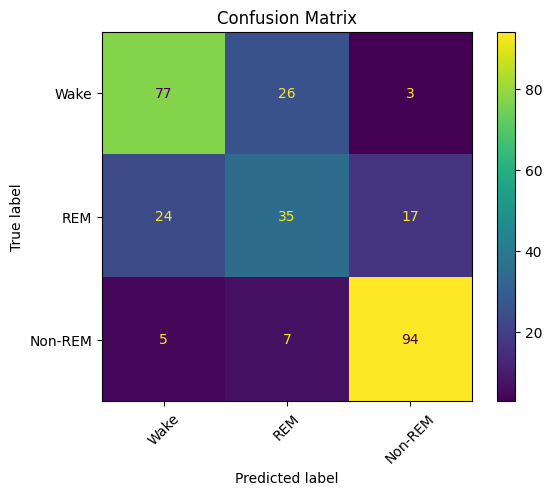

In [1666]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define the activity_map for sleep stages
activity_map = {
    0: "Wake",
    1: "REM",
    2: "Non-REM"
}

# Predict the test set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted class indices

# Generate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_classes)

# Display the confusion matrix
ConfusionMatrixDisplay(conf_matrix, display_labels=list(activity_map.values())).plot(cmap='viridis', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

###Predict


In [695]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

def preprocess_csv(file_path, scaler, timesteps):
    """
    Load and preprocess a single CSV file.
    """
    # Load the CSV file
    df = pd.read_csv(file_path)
    df = df.drop(columns=["BVP"])
    df = df.drop(columns=["IBI"])

    # Extract features
    X = df[['ACC_X', 'ACC_Y', 'ACC_Z', 'TEMP', 'EDA', 'HR']].values

    # Calculate the number of samples
    num_samples = X.shape[0] // timesteps  # Number of samples is total rows divided by timesteps

    # Reshape the data into (num_samples, timesteps, num_features)
    X = X[:num_samples * timesteps]  # Trim excess rows
    X = X.reshape((num_samples, timesteps, -1))

    # Standardize the data
    X = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)

    return X

def preprocess_test_sample(folder_path, scaler, timesteps):
    """
    Preprocess all CSV files in a single test sample folder.
    """
    # Initialize an empty list to store preprocessed data
    X_test_sample = []

    # Iterate through all CSV files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)

            # Preprocess the CSV file
            X = preprocess_csv(file_path, scaler, timesteps)

            # Append the preprocessed data to the list
            X_test_sample.append(X)

    # Combine all preprocessed data into a single array
    X_test_sample = np.vstack(X_test_sample)

    return X_test_sample

def preprocess_test_data(test_folder_path, scaler, timesteps):
    """
    Preprocess all test sample folders.
    """
    # Initialize an empty list to store preprocessed test samples
    X_test_samples = []

    # Iterate through all test sample folders
    for folder_name in os.listdir(test_folder_path):
        folder_path = os.path.join(test_folder_path, folder_name)

        if os.path.isdir(folder_path):
            # Preprocess the test sample folder
            X_test_sample = preprocess_test_sample(folder_path, scaler, timesteps)

            # Append the preprocessed test sample to the list
            X_test_samples.append(X_test_sample)

    return X_test_samples

# Define the number of timesteps (e.g., 480 for 30-second windows at 16 Hz)
timesteps = 480

# Path to the test folder containing 10 test sample folders
test_folder_path = '/content/kaggle_competition/test_segment/test_segment'

# Preprocess the test data
X_test_samples = preprocess_test_data(test_folder_path, scaler, timesteps)

In [1667]:
# Initialize a list to store predictions
all_predictions = []

# Iterate through each test sample
for X_test_sample in X_test_samples:
    # Make predictions
    y_pred = model.predict(X_test_sample)
    y_pred_labels = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

    # Append the predictions to the list
    all_predictions.append(y_pred_labels)

# all_predictions is a list of 10 arrays, each with shape (700,)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [54]:
#USE FOR XGBOOST COMBINE MODEL
# Initialize a list to store predictions
all_predictions = []

# Iterate through each preprocessed test sample
for X_test_sample in X_test_samples:
    # First extract features from the test sample using the LSTM feature extractor
    test_features = feature_extractor.predict(X_test_sample)

    # Then use the XGBoost classifier to predict class labels
    y_pred_labels = xgb_model.predict(test_features)

    # Append the predictions to the list
    all_predictions.append(y_pred_labels)

# Optionally, combine all predictions into a single array
all_predictions_combined = np.concatenate(all_predictions)
print("Combined predictions shape:", all_predictions_combined.shape)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Combined predictions shape: (7010,)


In [1668]:
all_predictions

[array([2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2,
        1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
        1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1,
        1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 2,
        2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 2, 2, 1, 2,
        2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 2, 2, 1, 1, 2, 2, 1,
        2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 1, 2,
        2, 2, 2, 1, 2, 1, 2, 2, 1, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1,
        0, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2,
        2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2,
        2, 2, 1, 1, 2, 2, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2,
        1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
        1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2,
        2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 

In [1164]:
sample_submission = pd.read_csv('/content/kaggle_competition/sample_submission.csv')

In [1669]:
all_predictions_combined = np.concatenate(all_predictions)

# Check the shape of the combined array
print(all_predictions_combined.shape)  # Should be (7010,)

(7010,)


In [1670]:
sample_submission['labels'] = all_predictions_combined

In [1671]:
sample_submission

id  labels
0     test001_00000       2
1     test001_00001       2
2     test001_00002       2
3     test001_00003       2
4     test001_00004       1
...             ...     ...
7005  test010_00696       0
7006  test010_00697       2
7007  test010_00698       2
7008  test010_00699       2
7009  test010_00700       2

[7010 rows x 2 columns]

In [1672]:
sample_submission['labels'] = label_encoder.inverse_transform(sample_submission['labels'])

In [1673]:
sample_submission

id labels
0     test001_00000      W
1     test001_00001      W
2     test001_00002      W
3     test001_00003      W
4     test001_00004      R
...             ...    ...
7005  test010_00696      N
7006  test010_00697      W
7007  test010_00698      W
7008  test010_00699      W
7009  test010_00700      W

[7010 rows x 2 columns]

In [1674]:
label_counts = sample_submission['labels'].value_counts()

# Display the result
print(label_counts)

labels
W    4046
R    2538
N     426
Name: count, dtype: int64


In [1675]:
sample_submission.to_csv("final_submission.csv", index=False)

##Fine_eval set

In [32]:
import os
import glob

main_test_folder = "/content/kaggle_competition/test_segment/test_segment"

# List all 10 sample folders inside the test directory
sample_folders = sorted([f.path for f in os.scandir(main_test_folder) if f.is_dir()])

# Dictionary to store merged DataFrames per sample
test_samples = {}

# Process each sample folder
for sample_idx, sample_folder in enumerate(sample_folders):
    print(f"Processing Sample {sample_idx + 1}...")

    # Get all CSV files inside this sample folder
    csv_files = sorted(glob.glob(os.path.join(sample_folder, "*.csv")))

    # Read and concatenate all 700 CSVs for this sample
    df_sample = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

    # Store in dictionary with sample index as key
    test_samples[sample_idx] = df_sample

    print(f"Sample {sample_idx + 1} merged with {df_sample.shape[0]} rows and {df_sample.shape[1]} columns.")

# Print summary of all merged samples
print(f"Total samples merged: {len(test_samples)}")

Processing Sample 1...
Sample 1 merged with 336480 rows and 8 columns.
Processing Sample 2...
Sample 2 merged with 336480 rows and 8 columns.
Processing Sample 3...
Sample 3 merged with 336480 rows and 8 columns.
Processing Sample 4...
Sample 4 merged with 336480 rows and 8 columns.
Processing Sample 5...
Sample 5 merged with 336480 rows and 8 columns.
Processing Sample 6...
Sample 6 merged with 336480 rows and 8 columns.
Processing Sample 7...
Sample 7 merged with 336480 rows and 8 columns.
Processing Sample 8...
Sample 8 merged with 336480 rows and 8 columns.
Processing Sample 9...
Sample 9 merged with 336480 rows and 8 columns.
Processing Sample 10...
Sample 10 merged with 336480 rows and 8 columns.
Total samples merged: 10


In [33]:
test_df = pd.concat([df.assign(Sample_ID=sample_id) for sample_id, df in test_samples.items()], ignore_index=True)

# Display the shape of the combined DataFrame
print(test_df.shape)  # Should be (3364800, 9) → 10 samples * 336480 rows each

# Check the first few rows
print(test_df.head())

(3364800, 9)
         BVP      ACC_X      ACC_Y      ACC_Z       TEMP       EDA         HR  \
0  15.336636 -32.612291 -38.552702  38.565604  31.999461  0.144345  51.137785   
1   9.070772 -31.468620 -39.610831  36.847039  31.999468  0.144389  51.137865   
2   4.852648 -32.882972 -39.485750  37.130310  31.999458  0.144247  51.137918   
3   2.176983 -33.718378 -39.601711  37.591057  31.999469  0.144565  51.137699   
4   1.112170 -32.182452 -39.517051  36.225780  31.999461  0.142745  51.138069   

        IBI  Sample_ID  
0  1.251138          0  
1  1.251138          0  
2  1.251138          0  
3  1.251138          0  
4  1.251138          0  


In [ ]:
test_df

BVP      ACC_X      ACC_Y      ACC_Z       TEMP       EDA  \
0        15.336636 -32.612291 -38.552702  38.565604  31.999461  0.144345   
1         9.070772 -31.468620 -39.610831  36.847039  31.999468  0.144389   
2         4.852648 -32.882972 -39.485750  37.130310  31.999458  0.144247   
3         2.176983 -33.718378 -39.601711  37.591057  31.999469  0.144565   
4         1.112170 -32.182452 -39.517051  36.225780  31.999461  0.142745   
...            ...        ...        ...        ...        ...       ...   
3364795   4.966498 -25.702380   9.885642  57.302702  33.324115  1.395061   
3364796  -0.534704 -25.702381   9.885413  57.951482  33.324175  1.396787   
3364797  -1.573199 -25.702380   9.885625  57.800800  33.324066  1.398089   
3364798  -1.111662 -25.702381   9.885477  57.787436  33.324168  1.397653   
3364799  -4.496984 -25.702380   9.885543  58.438157  33.324104  1.397858   

                HR       IBI  Sample_ID  
0        51.137785  1.251138          0  
1        51.137865  1.251138          0  
2        51.137918  1.251138          0  
3        51.137699  1.251138          0  
4        51.138069  1.251138          0  
...            ...       ...        ...  
3364795  56.445116  1.142710          9  
3364796  56.448078  1.143412          9  
3364797  56.445553  1.142546          9  
3364798  56.446309  1.143220          9  
3364799  56.450142  1.142912          9  

[3364800 rows x 9 columns]

In [34]:
df_test = test_df.iloc[::16, :]
df_test = df_test.reset_index(drop=True)

In [ ]:
from scipy.stats import ks_2samp

# Define the columns you want to compare
columns_to_compare = ['ACC_X', 'ACC_Y', 'ACC_Z', 'TEMP', 'EDA', 'HR']
test_subset = df_test[columns_to_compare]

# Get a list of all train CSV files in your folder
train_files = glob.glob('/content/kaggle_competition/train/train/*.csv')

# Dictionary to hold the aggregate KS statistic for each train file
ks_results = {}

for file in train_files:
    # Load the current train file
    train_df = pd.read_csv(file)

    # Ensure the file has the columns we want to compare
    if not set(columns_to_compare).issubset(train_df.columns):
        continue

    train_subset = train_df[columns_to_compare]

    # Compute the sum of KS statistics over the chosen columns
    total_ks = 0
    for col in columns_to_compare:
        # ks_2samp returns the KS statistic and the p-value
        stat, _ = ks_2samp(train_subset[col], test_subset[col])
        total_ks += stat

    ks_results[file] = total_ks

# Find the file with the smallest total KS statistic
best_match = min(ks_results, key=ks_results.get)
print("Best matching train file:", best_match)
print("Aggregate KS statistic:", ks_results[best_match])

Best matching train file: /content/kaggle_competition/train/train/train033.csv
Aggregate KS statistic: 1.4074105809975126


ACC_X:
  KS Statistic = 0.173 (p-value = 0.000e+00)
  Wasserstein Distance = 6.152



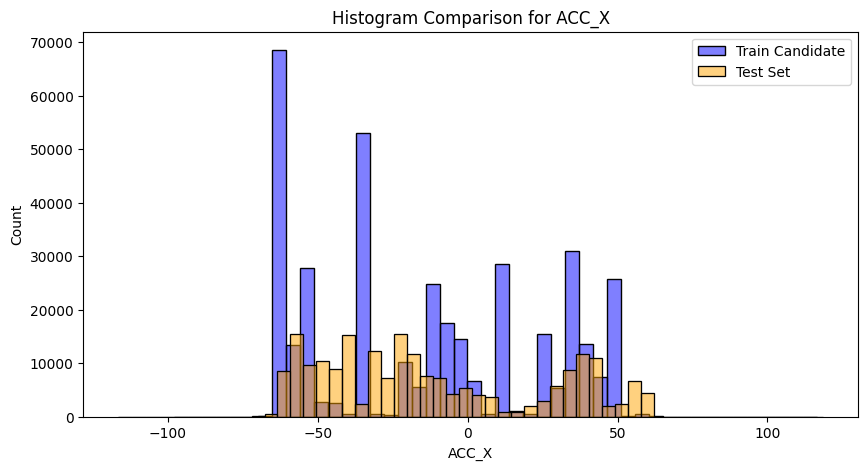

ACC_Y:
  KS Statistic = 0.139 (p-value = 0.000e+00)
  Wasserstein Distance = 5.996



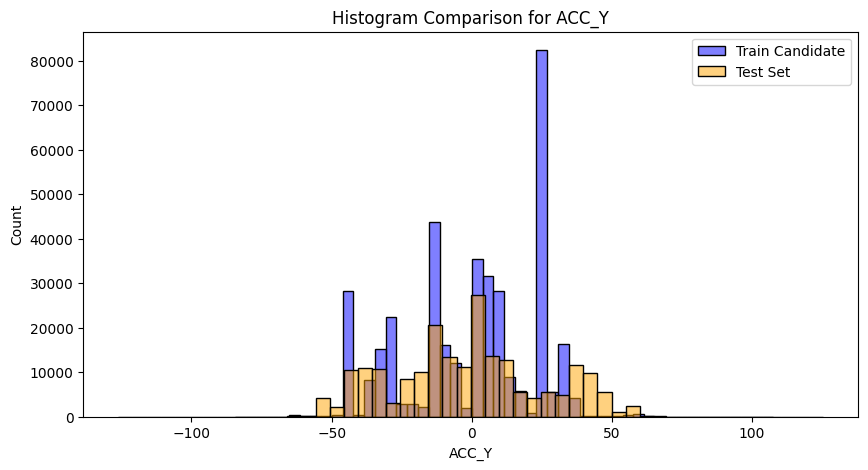

ACC_Z:
  KS Statistic = 0.273 (p-value = 0.000e+00)
  Wasserstein Distance = 17.504



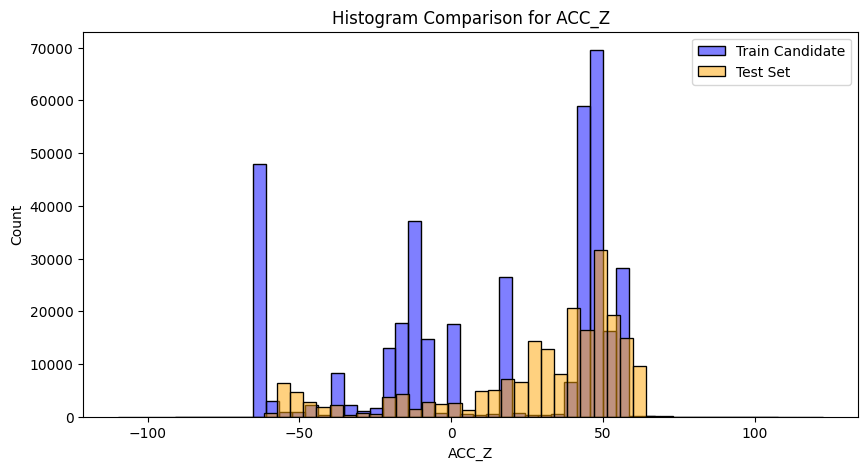

TEMP:
  KS Statistic = 0.218 (p-value = 0.000e+00)
  Wasserstein Distance = 0.376



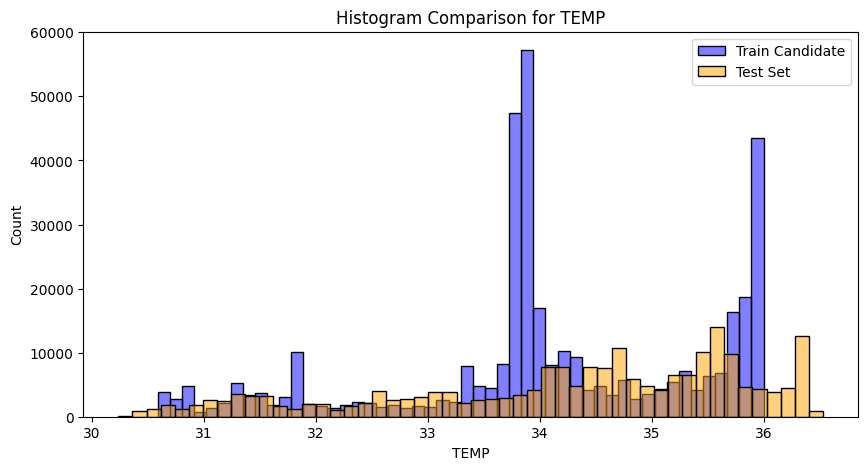

EDA:
  KS Statistic = 0.286 (p-value = 0.000e+00)
  Wasserstein Distance = 0.487



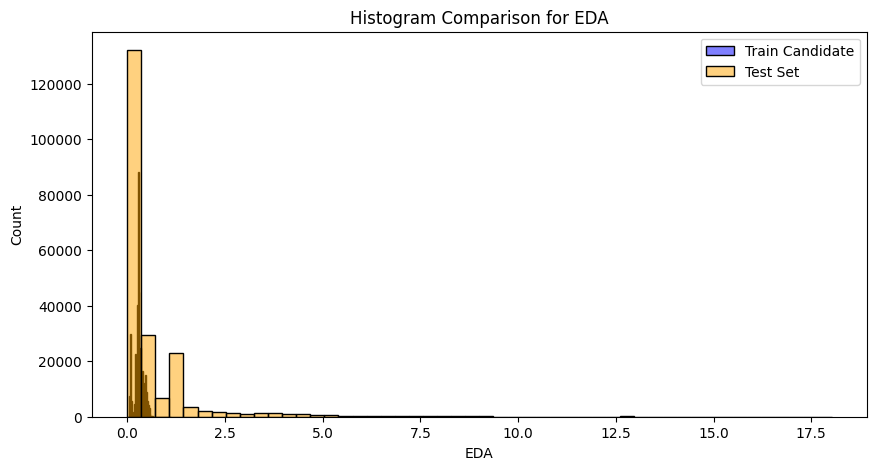

HR:
  KS Statistic = 0.319 (p-value = 0.000e+00)
  Wasserstein Distance = 6.729



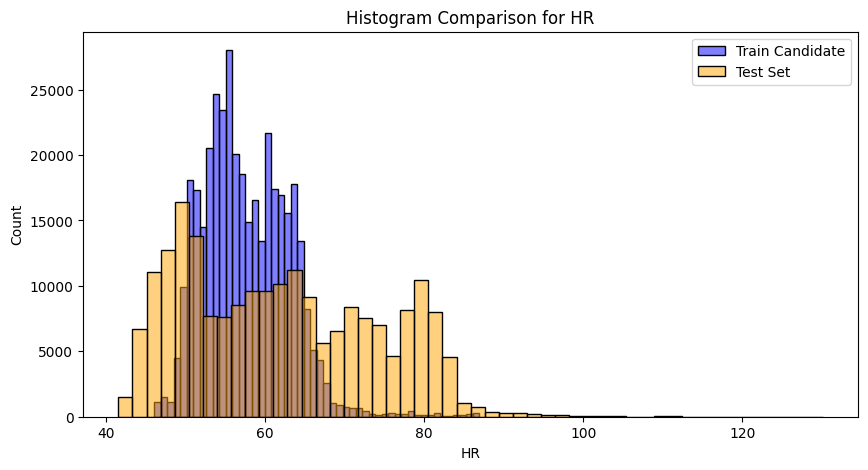

In [ ]:
import pandas as pd
from scipy.stats import ks_2samp, wasserstein_distance
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns to compare
columns_to_compare = ['ACC_X', 'ACC_Y', 'ACC_Z', 'TEMP', 'EDA', 'HR']

# Load your candidate train set and the test set
train_candidate = pd.read_csv('/content/kaggle_competition/train/train/train033.csv')

# Loop over each column and compute metrics
for col in columns_to_compare:
    ks_stat, ks_pvalue = ks_2samp(train_candidate[col], df_test[col])
    wass_distance = wasserstein_distance(train_candidate[col], df_test[col])
    print(f"{col}:")
    print(f"  KS Statistic = {ks_stat:.3f} (p-value = {ks_pvalue:.3e})")
    print(f"  Wasserstein Distance = {wass_distance:.3f}\n")
    plt.figure(figsize=(10, 5))
    sns.histplot(train_candidate[col], bins=50, color='blue', alpha=0.5, label='Train Candidate')
    sns.histplot(df_test[col], bins=50, color='orange', alpha=0.5, label='Test Set')
    plt.title(f"Histogram Comparison for {col}")
    plt.xlabel(col)
    plt.legend()
    plt.show()


In [37]:
df_downsampled

ACC_X      ACC_Y      ACC_Z       TEMP       EDA         HR  \
480      -8.656661  30.733415  54.487877  33.249307  0.278031  87.207334   
481      -8.427384  30.585563  54.324653  33.268529  0.278711  87.125465   
482      -7.939172  30.261292  54.380617  33.263285  0.278434  87.146304   
483      -7.914722  30.505872  54.380165  33.265606  0.278682  87.139392   
484      -7.899031  30.717903  54.351922  33.264834  0.277752  87.138742   
...            ...        ...        ...        ...       ...        ...   
31904635 -9.411955  37.568741  50.421531  35.024445  0.110279  67.514804   
31904636 -9.335618  37.567222  50.398843  35.024407  0.109395  67.522768   
31904637 -9.564142  37.556007  50.434623  35.024456  0.108760  67.515819   
31904638 -9.955810  37.580183  50.403685  35.024441  0.109043  67.518131   
31904639 -9.849783  37.545194  50.410691  35.024415  0.108695  67.527806   

          Sleep_Stage  Group_Label  
480                 2            1  
481                 2            1  
482                 2            1  
483                 2            1  
484                 2            1  
...               ...          ...  
31904635            2        66467  
31904636            2        66467  
31904637            2        66467  
31904638            2        66467  
31904639            2        66467  

[10074240 rows x 8 columns]

In [38]:
df_downsampled_mini = df_downsampled.iloc[::16, :]

In [39]:
import numpy as np
import pandas as pd

# Define the columns to compare
columns_to_use = ['ACC_X', 'ACC_Y', 'ACC_Z', 'TEMP', 'EDA', 'HR']

# Compute the mean and covariance matrix for the test set
mean_test = df_test[columns_to_use].mean().values
cov_test = np.cov(df_test[columns_to_use], rowvar=False)
inv_cov_test = np.linalg.inv(cov_test)

# Function to compute Mahalanobis distance for a row
def mahalanobis_distance(row, mean, inv_cov):
    diff = row - mean
    return np.sqrt(np.dot(np.dot(diff, inv_cov), diff))

# Compute distances for each row in your training (or downsampled) dataframe
distances = df_downsampled_mini[columns_to_use].apply(
    lambda row: mahalanobis_distance(row.values, mean_test, inv_cov_test), axis=1
)

# Convert distances to weights (lower distance = higher weight), e.g., via a Gaussian function:
sigma = distances.std()  # You can adjust this parameter
weights = np.exp(-0.5 * (distances / sigma)**2)

# Normalize weights to create a probability distribution
probabilities = weights / weights.sum()

# Sample indices based on these probabilities
desired_sample_size = 6000  # for example
sample_indices = np.random.choice(
    df_downsampled_mini.index, size=desired_sample_size, replace=False, p=probabilities
)
eval_set = df_downsampled_mini.loc[sample_indices]

# Compare summary statistics to check the match
print("Eval Set Summary:")
print(eval_set[columns_to_use].describe())
print("\nTest Set Summary:")
print(df_test[columns_to_use].describe())


Eval Set Summary:
             ACC_X        ACC_Y        ACC_Z         TEMP          EDA  \
count  6000.000000  6000.000000  6000.000000  6000.000000  6000.000000   
mean    -12.155773    -6.316743    31.735987    33.848032     0.609555   
std      32.812029    32.006495    27.104758     1.577886     0.898542   
min     -78.252407   -63.816110   -63.227922    27.187317    -0.004473   
25%     -37.616881   -34.599798    22.746312    32.869387     0.160838   
50%     -17.538827   -12.903069    41.490243    34.075448     0.280435   
75%       9.755280    22.736721    49.402755    35.087612     0.540875   
max      67.686205    64.255945    75.992864    37.139943     7.781014   

                HR  
count  6000.000000  
mean     64.584679  
std       9.828519  
min      33.462522  
25%      57.254532  
50%      63.674679  
75%      70.904464  
max     123.232037  

Test Set Summary:
               ACC_X          ACC_Y          ACC_Z           TEMP  \
count  210300.000000  210300.000000  2

In [40]:
eval_set = eval_set[~eval_set['Group_Label'].duplicated(keep=False)]
eval_set = eval_set.sort_values(by="Group_Label", ascending=True)

In [41]:
eval_set

ACC_X      ACC_Y      ACC_Z       TEMP       EDA         HR  \
4416      -9.885531  30.645146  54.395146  33.294017  0.281035  88.999444   
23616    -38.493673   5.119495  49.897524  33.826136  0.262392  87.732492   
32176    -63.215534   4.864693 -14.643674  33.818401  0.328711  84.915168   
34320    -23.725202   3.954218  58.936250  33.818433  0.253212  87.290770   
34624    -23.725274   3.954212  58.932499  33.818359  0.252459  85.023440   
...             ...        ...        ...        ...       ...        ...   
31844848  -8.919702   8.896978  62.278570  34.727870  0.102542  69.388929   
31877280 -53.418696  -1.997761  37.565018  34.593346  0.090683  60.686731   
31878608 -41.392779   0.127066  49.398288  34.545668  0.093699  65.724132   
31893216 -17.790042  36.570653  49.427571  34.206084  0.097572  75.062416   
31899152 -14.859979  38.542522  48.808552  34.599388  0.136028  67.567541   

          Sleep_Stage  Group_Label  
4416                2            9  
23616               2           49  
32176               2           67  
34320               2           71  
34624               2           72  
...               ...          ...  
31844848            1        66343  
31877280            2        66411  
31878608            2        66413  
31893216            2        66444  
31899152            2        66456  

[4217 rows x 8 columns]

In [42]:
unique_groups = eval_set['Group_Label'].unique()

eval_set = df_downsampled[df_downsampled['Group_Label'].isin(unique_groups)]

In [43]:
eval_set

ACC_X      ACC_Y      ACC_Z       TEMP       EDA         HR  \
4320     -10.014009  30.671254  54.446664  33.312508  0.281880  88.912870   
4321      -9.805060  30.622955  54.128668  33.326931  0.282456  88.946534   
4322      -9.943765  30.662165  53.583596  33.322927  0.282288  88.937744   
4323      -9.846939  30.634765  53.922042  33.324803  0.282449  88.941074   
4324      -9.905561  30.647947  54.242582  33.324049  0.281575  88.940649   
...             ...        ...        ...        ...       ...        ...   
31899355 -14.828762  37.535576  49.208418  34.628990  0.134313  67.436264   
31899356 -14.828296  37.505421  49.033142  34.629092  0.134222  67.442936   
31899357 -14.827937  37.668186  49.527140  34.628919  0.134257  67.437117   
31899358 -14.828851  37.417469  49.385393  34.629100  0.134248  67.439053   
31899359 -14.827723  37.855252  49.441092  34.628959  0.134227  67.447128   

          Sleep_Stage  Group_Label  
4320                2            9  
4321                2            9  
4322                2            9  
4323                2            9  
4324                2            9  
...               ...          ...  
31899355            2        66456  
31899356            2        66456  
31899357            2        66456  
31899358            2        66456  
31899359            2        66456  

[2024160 rows x 8 columns]

In [44]:
sleep_stage_counts = eval_set['Sleep_Stage'].value_counts()/480
print(sleep_stage_counts)

Sleep_Stage
1    1456.0
0    1383.0
2    1378.0
Name: count, dtype: float64


ACC_X:
  KS Statistic = 0.091 (p-value = 0.000e+00)
  Wasserstein Distance = 4.851



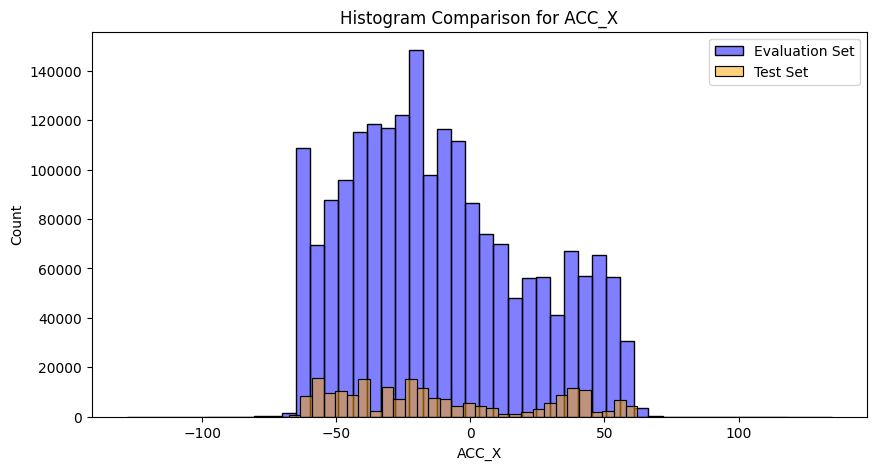

ACC_Y:
  KS Statistic = 0.200 (p-value = 0.000e+00)
  Wasserstein Distance = 7.830



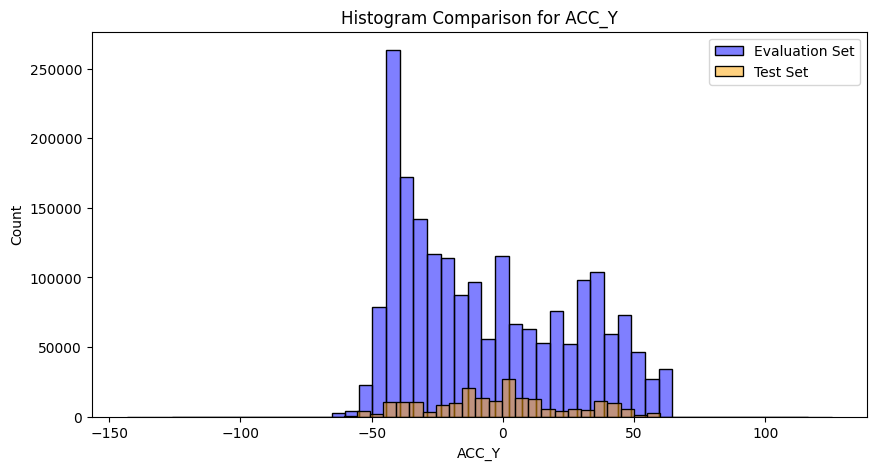

ACC_Z:
  KS Statistic = 0.051 (p-value = 0.000e+00)
  Wasserstein Distance = 2.338



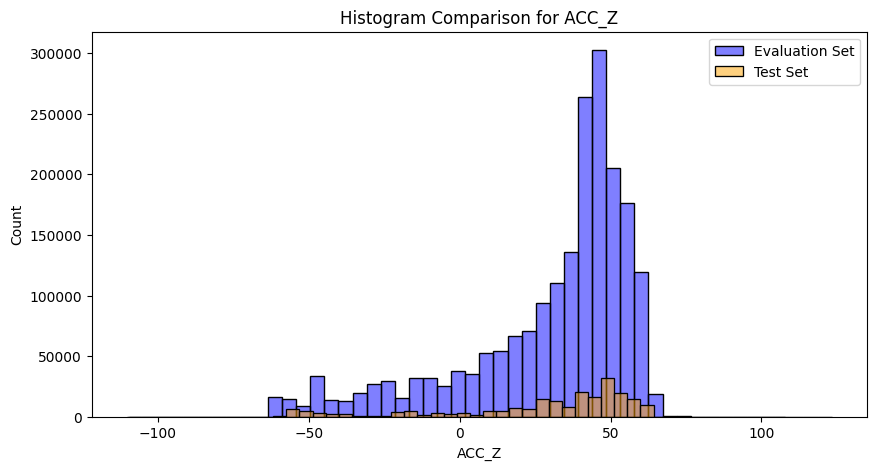

TEMP:
  KS Statistic = 0.155 (p-value = 0.000e+00)
  Wasserstein Distance = 0.480



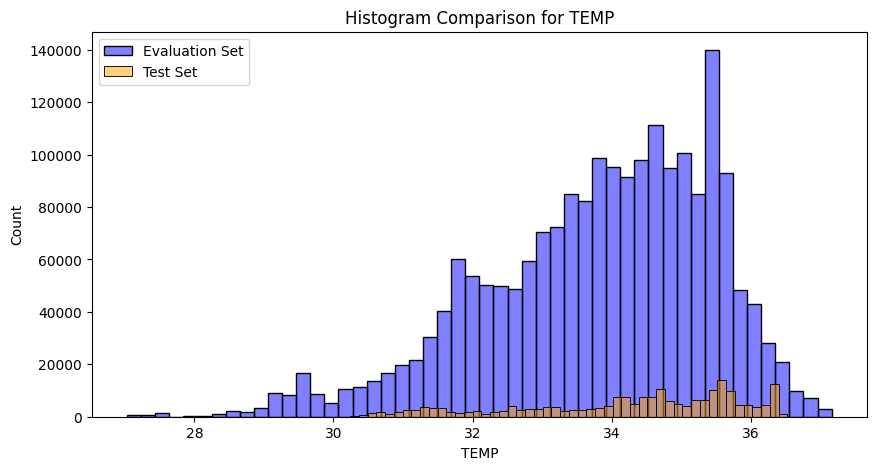

EDA:
  KS Statistic = 0.093 (p-value = 0.000e+00)
  Wasserstein Distance = 0.152



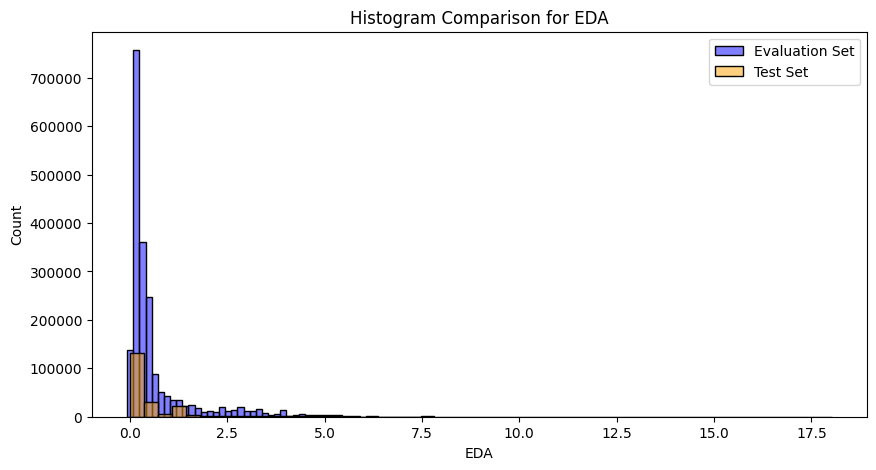

HR:
  KS Statistic = 0.198 (p-value = 0.000e+00)
  Wasserstein Distance = 3.269



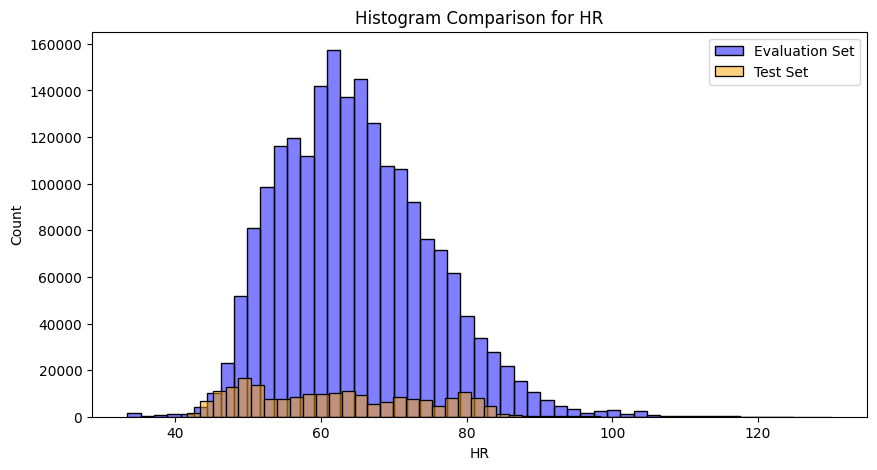

In [45]:
import pandas as pd
from scipy.stats import ks_2samp, wasserstein_distance
import matplotlib.pyplot as plt
import seaborn as sns

def compare_distributions(eval_set, test_set, columns_to_compare=None):
    """
    Compare the distributions of the selected columns between the evaluation set and the test set.

    Parameters:
        eval_set (pd.DataFrame): The evaluation dataset.
        test_set (pd.DataFrame): The test dataset.
        columns_to_compare (list, optional): List of column names to compare.
            If None, defaults to ['ACC_X', 'ACC_Y', 'ACC_Z', 'TEMP', 'EDA', 'HR'].
    """
    if columns_to_compare is None:
        columns_to_compare = ['ACC_X', 'ACC_Y', 'ACC_Z', 'TEMP', 'EDA', 'HR']

    for col in columns_to_compare:
        ks_stat, ks_pvalue = ks_2samp(eval_set[col], test_set[col])
        wass_distance = wasserstein_distance(eval_set[col], test_set[col])

        print(f"{col}:")
        print(f"  KS Statistic = {ks_stat:.3f} (p-value = {ks_pvalue:.3e})")
        print(f"  Wasserstein Distance = {wass_distance:.3f}\n")

        plt.figure(figsize=(10, 5))
        sns.histplot(eval_set[col], bins=50, color='blue', alpha=0.5, label='Evaluation Set')
        sns.histplot(test_set[col], bins=50, color='orange', alpha=0.5, label='Test Set')
        plt.title(f"Histogram Comparison for {col}")
        plt.xlabel(col)
        plt.legend()
        plt.show()

# Example usage:
# Assuming eval_set and df_test are your DataFrames
compare_distributions(eval_set, df_test)
